## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['LN_GS_cub_m'])

In [8]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [9]:
# Columns in "y" data collections
y.head()

,LN_GS_cub_m
0,3.78
1,5.54
2,5.25
3,5.63
4,4.96


# Create first XGBoost model for estimate varibiality of output stats

In [10]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [11]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [12]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9593686317632519, 0.960124426660752, 0.9797132020116908]
    Mean: 0.966
    Std: 0.009

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.1377819  0.1352518  0.15968036]
    Mean: 0.144
    Std: 0.011

 --------------------
Mean absolute error (MAE): 

    Scores: [0.0803871140780149, 0.08412305945283048, 0.08315995005557413]
    Mean: 0.083
    Std: 0.002

 --------------------


# Add optimal hyperparameters for XGBoost model

In [14]:
# Hyperparameters data for the next step/stage
p1 = 0.8821030853351247                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.011864622396297486               # gamma
print('Gamma: ' + str(p2))

p3 = 0.1209976158148326                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 178         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.5339951896800694                 # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8821030853351247
Gamma: 0.011864622396297486
Learning_rate: 0.1209976158148326
Max_depth: 4
N_estimators: 178
Subsample: 0.5339951896800694


# Estimation of predictive quality to basic XGBoost models using Loops

In [15]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [16]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:4.18010	validation_1-rmse:4.15669
[1]	validation_0-rmse:3.68520	validation_1-rmse:3.66703
[2]	validation_0-rmse:3.24753	validation_1-rmse:3.22464
[3]	validation_0-rmse:2.86206	validation_1-rmse:2.83763
[4]	validation_0-rmse:2.52300	validation_1-rmse:2.49969
[5]	validation_0-rmse:2.22430	validation_1-rmse:2.20095


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96026	validation_1-rmse:1.93603
[7]	validation_0-rmse:1.72619	validation_1-rmse:1.70081
[8]	validation_0-rmse:1.52231	validation_1-rmse:1.50081
[9]	validation_0-rmse:1.34241	validation_1-rmse:1.32078
[10]	validation_0-rmse:1.18596	validation_1-rmse:1.16452
[11]	validation_0-rmse:1.04842	validation_1-rmse:1.02863
[12]	validation_0-rmse:0.92701	validation_1-rmse:0.90861
[13]	validation_0-rmse:0.82101	validation_1-rmse:0.80339
[14]	validation_0-rmse:0.72658	validation_1-rmse:0.70978
[15]	validation_0-rmse:0.64373	validation_1-rmse:0.62728
[16]	validation_0-rmse:0.57174	validation_1-rmse:0.55601
[17]	validation_0-rmse:0.50893	validation_1-rmse:0.49405
[18]	validation_0-rmse:0.45422	validation_1-rmse:0.43954
[19]	validation_0-rmse:0.40422	validation_1-rmse:0.39062
[20]	validation_0-rmse:0.36139	validation_1-rmse:0.34930
[21]	validation_0-rmse:0.32349	validation_1-rmse:0.31220
[22]	validation_0-rmse:0.29072	validation_1-rmse:0.28072
[23]	validation_0-rmse:0.26199	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17442	validation_1-rmse:4.18907
[1]	validation_0-rmse:3.67739	validation_1-rmse:3.69157
[2]	validation_0-rmse:3.24078	validation_1-rmse:3.25242
[3]	validation_0-rmse:2.85850	validation_1-rmse:2.86813
[4]	validation_0-rmse:2.51719	validation_1-rmse:2.52562
[5]	validation_0-rmse:2.21802	validation_1-rmse:2.22331
[6]	validation_0-rmse:1.95673	validation_1-rmse:1.96027


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72608	validation_1-rmse:1.72895
[8]	validation_0-rmse:1.52375	validation_1-rmse:1.52648
[9]	validation_0-rmse:1.34384	validation_1-rmse:1.34666
[10]	validation_0-rmse:1.18574	validation_1-rmse:1.18598
[11]	validation_0-rmse:1.04738	validation_1-rmse:1.04650
[12]	validation_0-rmse:0.92609	validation_1-rmse:0.92490
[13]	validation_0-rmse:0.81854	validation_1-rmse:0.81833
[14]	validation_0-rmse:0.72418	validation_1-rmse:0.72553
[15]	validation_0-rmse:0.64210	validation_1-rmse:0.64267
[16]	validation_0-rmse:0.56902	validation_1-rmse:0.56945
[17]	validation_0-rmse:0.50617	validation_1-rmse:0.50604
[18]	validation_0-rmse:0.45048	validation_1-rmse:0.45113
[19]	validation_0-rmse:0.40162	validation_1-rmse:0.40194
[20]	validation_0-rmse:0.35939	validation_1-rmse:0.36003
[21]	validation_0-rmse:0.32221	validation_1-rmse:0.32398
[22]	validation_0-rmse:0.28974	validation_1-rmse:0.29191
[23]	validation_0-rmse:0.26191	validation_1-rmse:0.26552
[24]	validation_0-rmse:0.23781	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18134	validation_1-rmse:4.13422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68306	validation_1-rmse:3.64540
[2]	validation_0-rmse:3.24580	validation_1-rmse:3.21851
[3]	validation_0-rmse:2.86166	validation_1-rmse:2.83917
[4]	validation_0-rmse:2.52215	validation_1-rmse:2.50659
[5]	validation_0-rmse:2.22222	validation_1-rmse:2.21290
[6]	validation_0-rmse:1.95775	validation_1-rmse:1.95202
[7]	validation_0-rmse:1.72842	validation_1-rmse:1.72636
[8]	validation_0-rmse:1.52297	validation_1-rmse:1.52312
[9]	validation_0-rmse:1.34218	validation_1-rmse:1.34553
[10]	validation_0-rmse:1.18520	validation_1-rmse:1.19155
[11]	validation_0-rmse:1.04554	validation_1-rmse:1.05413
[12]	validation_0-rmse:0.92445	validation_1-rmse:0.93638
[13]	validation_0-rmse:0.81673	validation_1-rmse:0.83253
[14]	validation_0-rmse:0.72306	validation_1-rmse:0.74190
[15]	validation_0-rmse:0.63902	validation_1-rmse:0.66035
[16]	validation_0-rmse:0.56705	validation_1-rmse:0.59067
[17]	validation_0-rmse:0.50365	validation_1-rmse:0.52978
[18]	validation_0-rmse:0.44733	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18321	validation_1-rmse:4.15450


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68501	validation_1-rmse:3.65641
[2]	validation_0-rmse:3.24700	validation_1-rmse:3.22528
[3]	validation_0-rmse:2.86416	validation_1-rmse:2.84949
[4]	validation_0-rmse:2.52646	validation_1-rmse:2.51498
[5]	validation_0-rmse:2.22743	validation_1-rmse:2.22187
[6]	validation_0-rmse:1.96454	validation_1-rmse:1.96157
[7]	validation_0-rmse:1.73186	validation_1-rmse:1.73119
[8]	validation_0-rmse:1.52670	validation_1-rmse:1.52717
[9]	validation_0-rmse:1.34784	validation_1-rmse:1.34684
[10]	validation_0-rmse:1.18901	validation_1-rmse:1.19101
[11]	validation_0-rmse:1.05099	validation_1-rmse:1.05356
[12]	validation_0-rmse:0.92947	validation_1-rmse:0.93182
[13]	validation_0-rmse:0.82216	validation_1-rmse:0.82634
[14]	validation_0-rmse:0.72621	validation_1-rmse:0.73286
[15]	validation_0-rmse:0.64126	validation_1-rmse:0.65005
[16]	validation_0-rmse:0.56912	validation_1-rmse:0.57940
[17]	validation_0-rmse:0.50467	validation_1-rmse:0.51694
[18]	validation_0-rmse:0.44875	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16796	validation_1-rmse:4.20626


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67109	validation_1-rmse:3.70637
[2]	validation_0-rmse:3.23358	validation_1-rmse:3.26602
[3]	validation_0-rmse:2.84982	validation_1-rmse:2.87658
[4]	validation_0-rmse:2.51094	validation_1-rmse:2.53771
[5]	validation_0-rmse:2.21398	validation_1-rmse:2.23743
[6]	validation_0-rmse:1.95217	validation_1-rmse:1.97434
[7]	validation_0-rmse:1.72136	validation_1-rmse:1.74411
[8]	validation_0-rmse:1.51923	validation_1-rmse:1.53990
[9]	validation_0-rmse:1.34147	validation_1-rmse:1.36243
[10]	validation_0-rmse:1.18446	validation_1-rmse:1.20540
[11]	validation_0-rmse:1.04646	validation_1-rmse:1.06870
[12]	validation_0-rmse:0.92538	validation_1-rmse:0.94897
[13]	validation_0-rmse:0.81801	validation_1-rmse:0.84374
[14]	validation_0-rmse:0.72272	validation_1-rmse:0.74882
[15]	validation_0-rmse:0.63959	validation_1-rmse:0.66742
[16]	validation_0-rmse:0.56626	validation_1-rmse:0.59689
[17]	validation_0-rmse:0.50253	validation_1-rmse:0.53566
[18]	validation_0-rmse:0.44586	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17678	validation_1-rmse:4.17429
[1]	validation_0-rmse:3.68524	validation_1-rmse:3.68567
[2]	validation_0-rmse:3.24639	validation_1-rmse:3.25074
[3]	validation_0-rmse:2.86095	validation_1-rmse:2.86804
[4]	validation_0-rmse:2.52170	validation_1-rmse:2.53211
[5]	validation_0-rmse:2.22255	validation_1-rmse:2.23435
[6]	validation_0-rmse:1.95666	validation_1-rmse:1.96615
[7]	validation_0-rmse:1.72709	validation_1-rmse:1.73564
[8]	validation_0-rmse:1.52274	validation_1-rmse:1.53092
[9]	validation_0-rmse:1.34461	validation_1-rmse:1.35271
[10]	validation_0-rmse:1.18607	validation_1-rmse:1.19377
[11]	validation_0-rmse:1.04734	validation_1-rmse:1.05628
[12]	validation_0-rmse:0.92627	validation_1-rmse:0.93577
[13]	validation_0-rmse:0.81892	validation_1-rmse:0.82682
[14]	validation_0-rmse:0.72452	validation_1-rmse:0.73287
[15]	validation_0-rmse:0.64123	validation_1-rmse:0.64955
[16]	validation_0-rmse:0.56966	validation_1-rmse:0.57771
[17]	validation_0-rmse:0.50593	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17999	validation_1-rmse:4.14292
[1]	validation_0-rmse:3.68589	validation_1-rmse:3.64880
[2]	validation_0-rmse:3.24753	validation_1-rmse:3.20979
[3]	validation_0-rmse:2.86291	validation_1-rmse:2.82684


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52185	validation_1-rmse:2.48602
[5]	validation_0-rmse:2.22216	validation_1-rmse:2.18358
[6]	validation_0-rmse:1.95906	validation_1-rmse:1.92186
[7]	validation_0-rmse:1.72775	validation_1-rmse:1.68911
[8]	validation_0-rmse:1.52509	validation_1-rmse:1.48794
[9]	validation_0-rmse:1.34509	validation_1-rmse:1.31035
[10]	validation_0-rmse:1.18767	validation_1-rmse:1.15536
[11]	validation_0-rmse:1.04818	validation_1-rmse:1.01768
[12]	validation_0-rmse:0.92498	validation_1-rmse:0.89550
[13]	validation_0-rmse:0.81762	validation_1-rmse:0.78941
[14]	validation_0-rmse:0.72413	validation_1-rmse:0.69878
[15]	validation_0-rmse:0.64225	validation_1-rmse:0.61821
[16]	validation_0-rmse:0.56920	validation_1-rmse:0.54626
[17]	validation_0-rmse:0.50593	validation_1-rmse:0.48335
[18]	validation_0-rmse:0.45034	validation_1-rmse:0.43000
[19]	validation_0-rmse:0.40145	validation_1-rmse:0.38355
[20]	validation_0-rmse:0.35841	validation_1-rmse:0.34090
[21]	validation_0-rmse:0.32160	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16565	validation_1-rmse:4.20589
[1]	validation_0-rmse:3.67177	validation_1-rmse:3.70794
[2]	validation_0-rmse:3.23466	validation_1-rmse:3.26549
[3]	validation_0-rmse:2.84756	validation_1-rmse:2.87490
[4]	validation_0-rmse:2.51132	validation_1-rmse:2.53491
[5]	validation_0-rmse:2.21352	validation_1-rmse:2.23554
[6]	validation_0-rmse:1.95294	validation_1-rmse:1.97108
[7]	validation_0-rmse:1.72209	validation_1-rmse:1.73779
[8]	validation_0-rmse:1.52025	validation_1-rmse:1.53437
[9]	validation_0-rmse:1.34211	validation_1-rmse:1.35171
[10]	validation_0-rmse:1.18458	validation_1-rmse:1.19378
[11]	validation_0-rmse:1.04561	validation_1-rmse:1.05183
[12]	validation_0-rmse:0.92486	validation_1-rmse:0.93149
[13]	validation_0-rmse:0.81791	validation_1-rmse:0.82126
[14]	validation_0-rmse:0.72359	validation_1-rmse:0.72313
[15]	validation_0-rmse:0.64146	validation_1-rmse:0.63965
[16]	validation_0-rmse:0.56935	validation_1-rmse:0.56564
[17]	validation_0-rmse:0.50607	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16519	validation_1-rmse:4.20230
[1]	validation_0-rmse:3.67143	validation_1-rmse:3.70267
[2]	validation_0-rmse:3.23582	validation_1-rmse:3.26044


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84971	validation_1-rmse:2.86690
[4]	validation_0-rmse:2.51123	validation_1-rmse:2.52520
[5]	validation_0-rmse:2.21299	validation_1-rmse:2.22311
[6]	validation_0-rmse:1.95032	validation_1-rmse:1.95914
[7]	validation_0-rmse:1.71972	validation_1-rmse:1.72712
[8]	validation_0-rmse:1.51859	validation_1-rmse:1.52437
[9]	validation_0-rmse:1.34090	validation_1-rmse:1.34608
[10]	validation_0-rmse:1.18381	validation_1-rmse:1.18721
[11]	validation_0-rmse:1.04566	validation_1-rmse:1.04728
[12]	validation_0-rmse:0.92379	validation_1-rmse:0.92455
[13]	validation_0-rmse:0.81643	validation_1-rmse:0.81757
[14]	validation_0-rmse:0.72217	validation_1-rmse:0.72312
[15]	validation_0-rmse:0.63982	validation_1-rmse:0.64252
[16]	validation_0-rmse:0.56792	validation_1-rmse:0.57199
[17]	validation_0-rmse:0.50455	validation_1-rmse:0.50990
[18]	validation_0-rmse:0.44899	validation_1-rmse:0.45534
[19]	validation_0-rmse:0.39951	validation_1-rmse:0.40777
[20]	validation_0-rmse:0.35619	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17507	validation_1-rmse:4.16947
[1]	validation_0-rmse:3.67960	validation_1-rmse:3.67822
[2]	validation_0-rmse:3.24096	validation_1-rmse:3.24368
[3]	validation_0-rmse:2.85583	validation_1-rmse:2.85771


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51532	validation_1-rmse:2.52021
[5]	validation_0-rmse:2.21806	validation_1-rmse:2.22282
[6]	validation_0-rmse:1.95382	validation_1-rmse:1.96057
[7]	validation_0-rmse:1.72235	validation_1-rmse:1.72983
[8]	validation_0-rmse:1.51964	validation_1-rmse:1.52787
[9]	validation_0-rmse:1.34071	validation_1-rmse:1.35038
[10]	validation_0-rmse:1.18276	validation_1-rmse:1.19287
[11]	validation_0-rmse:1.04344	validation_1-rmse:1.05466
[12]	validation_0-rmse:0.92337	validation_1-rmse:0.93611
[13]	validation_0-rmse:0.81559	validation_1-rmse:0.83063
[14]	validation_0-rmse:0.72252	validation_1-rmse:0.73976
[15]	validation_0-rmse:0.63928	validation_1-rmse:0.65877
[16]	validation_0-rmse:0.56692	validation_1-rmse:0.58890
[17]	validation_0-rmse:0.50226	validation_1-rmse:0.52641
[18]	validation_0-rmse:0.44610	validation_1-rmse:0.47312
[19]	validation_0-rmse:0.39738	validation_1-rmse:0.42764
[20]	validation_0-rmse:0.35462	validation_1-rmse:0.38943
[21]	validation_0-rmse:0.31739	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19012	validation_1-rmse:4.11234
[1]	validation_0-rmse:3.69372	validation_1-rmse:3.62209
[2]	validation_0-rmse:3.25504	validation_1-rmse:3.19055


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86739	validation_1-rmse:2.80439
[4]	validation_0-rmse:2.52729	validation_1-rmse:2.47164
[5]	validation_0-rmse:2.22836	validation_1-rmse:2.17880
[6]	validation_0-rmse:1.96537	validation_1-rmse:1.91873
[7]	validation_0-rmse:1.73395	validation_1-rmse:1.69265
[8]	validation_0-rmse:1.52908	validation_1-rmse:1.49211
[9]	validation_0-rmse:1.34939	validation_1-rmse:1.31617
[10]	validation_0-rmse:1.19133	validation_1-rmse:1.16053
[11]	validation_0-rmse:1.05143	validation_1-rmse:1.02450
[12]	validation_0-rmse:0.92878	validation_1-rmse:0.90569
[13]	validation_0-rmse:0.82100	validation_1-rmse:0.79965
[14]	validation_0-rmse:0.72571	validation_1-rmse:0.70648
[15]	validation_0-rmse:0.64404	validation_1-rmse:0.62698
[16]	validation_0-rmse:0.57087	validation_1-rmse:0.55736
[17]	validation_0-rmse:0.50680	validation_1-rmse:0.49646
[18]	validation_0-rmse:0.45133	validation_1-rmse:0.44203
[19]	validation_0-rmse:0.40314	validation_1-rmse:0.39593
[20]	validation_0-rmse:0.36007	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19094	validation_1-rmse:4.11661
[1]	validation_0-rmse:3.69136	validation_1-rmse:3.62442
[2]	validation_0-rmse:3.25130	validation_1-rmse:3.19186


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86611	validation_1-rmse:2.81166
[4]	validation_0-rmse:2.52640	validation_1-rmse:2.47714
[5]	validation_0-rmse:2.22606	validation_1-rmse:2.18312
[6]	validation_0-rmse:1.96082	validation_1-rmse:1.91981
[7]	validation_0-rmse:1.72977	validation_1-rmse:1.69395
[8]	validation_0-rmse:1.52516	validation_1-rmse:1.49267
[9]	validation_0-rmse:1.34525	validation_1-rmse:1.31754
[10]	validation_0-rmse:1.18804	validation_1-rmse:1.16227
[11]	validation_0-rmse:1.04979	validation_1-rmse:1.02809
[12]	validation_0-rmse:0.92846	validation_1-rmse:0.90890
[13]	validation_0-rmse:0.81876	validation_1-rmse:0.80174
[14]	validation_0-rmse:0.72497	validation_1-rmse:0.70922
[15]	validation_0-rmse:0.64203	validation_1-rmse:0.62732
[16]	validation_0-rmse:0.56912	validation_1-rmse:0.55643
[17]	validation_0-rmse:0.50537	validation_1-rmse:0.49403
[18]	validation_0-rmse:0.44981	validation_1-rmse:0.44015
[19]	validation_0-rmse:0.40091	validation_1-rmse:0.39302
[20]	validation_0-rmse:0.35868	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16848	validation_1-rmse:4.20821
[1]	validation_0-rmse:3.67174	validation_1-rmse:3.70798


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23501	validation_1-rmse:3.26750
[3]	validation_0-rmse:2.85031	validation_1-rmse:2.87835
[4]	validation_0-rmse:2.51167	validation_1-rmse:2.53640
[5]	validation_0-rmse:2.21454	validation_1-rmse:2.24167
[6]	validation_0-rmse:1.95248	validation_1-rmse:1.97767
[7]	validation_0-rmse:1.72016	validation_1-rmse:1.74376
[8]	validation_0-rmse:1.51763	validation_1-rmse:1.54078
[9]	validation_0-rmse:1.33878	validation_1-rmse:1.36030
[10]	validation_0-rmse:1.18154	validation_1-rmse:1.20145
[11]	validation_0-rmse:1.04271	validation_1-rmse:1.06029
[12]	validation_0-rmse:0.92249	validation_1-rmse:0.93970
[13]	validation_0-rmse:0.81493	validation_1-rmse:0.83150
[14]	validation_0-rmse:0.71995	validation_1-rmse:0.73631
[15]	validation_0-rmse:0.63895	validation_1-rmse:0.65387
[16]	validation_0-rmse:0.56629	validation_1-rmse:0.58066
[17]	validation_0-rmse:0.50424	validation_1-rmse:0.51738
[18]	validation_0-rmse:0.44912	validation_1-rmse:0.46175
[19]	validation_0-rmse:0.40071	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19394	validation_1-rmse:4.11374
[1]	validation_0-rmse:3.69320	validation_1-rmse:3.61736


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25133	validation_1-rmse:3.18436
[3]	validation_0-rmse:2.86492	validation_1-rmse:2.80501
[4]	validation_0-rmse:2.52580	validation_1-rmse:2.47702
[5]	validation_0-rmse:2.22713	validation_1-rmse:2.18703
[6]	validation_0-rmse:1.96249	validation_1-rmse:1.92930
[7]	validation_0-rmse:1.73014	validation_1-rmse:1.69962
[8]	validation_0-rmse:1.52630	validation_1-rmse:1.49962
[9]	validation_0-rmse:1.34456	validation_1-rmse:1.32079
[10]	validation_0-rmse:1.18771	validation_1-rmse:1.16892
[11]	validation_0-rmse:1.04791	validation_1-rmse:1.03444
[12]	validation_0-rmse:0.92506	validation_1-rmse:0.91384
[13]	validation_0-rmse:0.81835	validation_1-rmse:0.81139
[14]	validation_0-rmse:0.72498	validation_1-rmse:0.72215
[15]	validation_0-rmse:0.64120	validation_1-rmse:0.64349
[16]	validation_0-rmse:0.56742	validation_1-rmse:0.57451
[17]	validation_0-rmse:0.50382	validation_1-rmse:0.51454
[18]	validation_0-rmse:0.44819	validation_1-rmse:0.46383
[19]	validation_0-rmse:0.39909	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18056	validation_1-rmse:4.16064
[1]	validation_0-rmse:3.68081	validation_1-rmse:3.66594
[2]	validation_0-rmse:3.24492	validation_1-rmse:3.23619


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86031	validation_1-rmse:2.85716
[4]	validation_0-rmse:2.52216	validation_1-rmse:2.52455
[5]	validation_0-rmse:2.22328	validation_1-rmse:2.22832
[6]	validation_0-rmse:1.95981	validation_1-rmse:1.96838
[7]	validation_0-rmse:1.72877	validation_1-rmse:1.74162
[8]	validation_0-rmse:1.52539	validation_1-rmse:1.54031
[9]	validation_0-rmse:1.34600	validation_1-rmse:1.36533
[10]	validation_0-rmse:1.18941	validation_1-rmse:1.20941
[11]	validation_0-rmse:1.05042	validation_1-rmse:1.07182
[12]	validation_0-rmse:0.92732	validation_1-rmse:0.95010
[13]	validation_0-rmse:0.82038	validation_1-rmse:0.84530
[14]	validation_0-rmse:0.72574	validation_1-rmse:0.75510
[15]	validation_0-rmse:0.64298	validation_1-rmse:0.67410
[16]	validation_0-rmse:0.57007	validation_1-rmse:0.60373
[17]	validation_0-rmse:0.50585	validation_1-rmse:0.54346
[18]	validation_0-rmse:0.44961	validation_1-rmse:0.49112
[19]	validation_0-rmse:0.40037	validation_1-rmse:0.44315
[20]	validation_0-rmse:0.35713	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17105	validation_1-rmse:4.20608
[1]	validation_0-rmse:3.67338	validation_1-rmse:3.70286
[2]	validation_0-rmse:3.23758	validation_1-rmse:3.26210


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85248	validation_1-rmse:2.87471
[4]	validation_0-rmse:2.51596	validation_1-rmse:2.53710
[5]	validation_0-rmse:2.21822	validation_1-rmse:2.23466
[6]	validation_0-rmse:1.95453	validation_1-rmse:1.96695
[7]	validation_0-rmse:1.72233	validation_1-rmse:1.73359
[8]	validation_0-rmse:1.52165	validation_1-rmse:1.53051
[9]	validation_0-rmse:1.34336	validation_1-rmse:1.35207
[10]	validation_0-rmse:1.18545	validation_1-rmse:1.19780
[11]	validation_0-rmse:1.04789	validation_1-rmse:1.05825
[12]	validation_0-rmse:0.92520	validation_1-rmse:0.93572
[13]	validation_0-rmse:0.81710	validation_1-rmse:0.82735
[14]	validation_0-rmse:0.72295	validation_1-rmse:0.73238
[15]	validation_0-rmse:0.64096	validation_1-rmse:0.65014
[16]	validation_0-rmse:0.56774	validation_1-rmse:0.57746
[17]	validation_0-rmse:0.50418	validation_1-rmse:0.51348
[18]	validation_0-rmse:0.44909	validation_1-rmse:0.45827
[19]	validation_0-rmse:0.40037	validation_1-rmse:0.40957
[20]	validation_0-rmse:0.35754	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18316	validation_1-rmse:4.15496
[1]	validation_0-rmse:3.68422	validation_1-rmse:3.66297
[2]	validation_0-rmse:3.24680	validation_1-rmse:3.23218
[3]	validation_0-rmse:2.85986	validation_1-rmse:2.84993
[4]	validation_0-rmse:2.51780	validation_1-rmse:2.51328


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21924	validation_1-rmse:2.21681
[6]	validation_0-rmse:1.95544	validation_1-rmse:1.95439
[7]	validation_0-rmse:1.72462	validation_1-rmse:1.72403
[8]	validation_0-rmse:1.52033	validation_1-rmse:1.52026
[9]	validation_0-rmse:1.34041	validation_1-rmse:1.33928
[10]	validation_0-rmse:1.18145	validation_1-rmse:1.18164
[11]	validation_0-rmse:1.04398	validation_1-rmse:1.04323
[12]	validation_0-rmse:0.92256	validation_1-rmse:0.92234
[13]	validation_0-rmse:0.81502	validation_1-rmse:0.81457
[14]	validation_0-rmse:0.72101	validation_1-rmse:0.72240
[15]	validation_0-rmse:0.63859	validation_1-rmse:0.64254
[16]	validation_0-rmse:0.56619	validation_1-rmse:0.57068
[17]	validation_0-rmse:0.50326	validation_1-rmse:0.50832
[18]	validation_0-rmse:0.44823	validation_1-rmse:0.45313
[19]	validation_0-rmse:0.39865	validation_1-rmse:0.40419
[20]	validation_0-rmse:0.35577	validation_1-rmse:0.36272
[21]	validation_0-rmse:0.31949	validation_1-rmse:0.32641
[22]	validation_0-rmse:0.28704	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16111	validation_1-rmse:4.23177
[1]	validation_0-rmse:3.66587	validation_1-rmse:3.72752
[2]	validation_0-rmse:3.23192	validation_1-rmse:3.28724


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84918	validation_1-rmse:2.90132
[4]	validation_0-rmse:2.51031	validation_1-rmse:2.55895
[5]	validation_0-rmse:2.21185	validation_1-rmse:2.25654
[6]	validation_0-rmse:1.95005	validation_1-rmse:1.98854
[7]	validation_0-rmse:1.71897	validation_1-rmse:1.75629
[8]	validation_0-rmse:1.51494	validation_1-rmse:1.54958
[9]	validation_0-rmse:1.33634	validation_1-rmse:1.37106
[10]	validation_0-rmse:1.18122	validation_1-rmse:1.21760
[11]	validation_0-rmse:1.04291	validation_1-rmse:1.07736
[12]	validation_0-rmse:0.92150	validation_1-rmse:0.95423
[13]	validation_0-rmse:0.81519	validation_1-rmse:0.84806
[14]	validation_0-rmse:0.72127	validation_1-rmse:0.75306
[15]	validation_0-rmse:0.63832	validation_1-rmse:0.66905
[16]	validation_0-rmse:0.56632	validation_1-rmse:0.59730
[17]	validation_0-rmse:0.50157	validation_1-rmse:0.53264
[18]	validation_0-rmse:0.44662	validation_1-rmse:0.47635
[19]	validation_0-rmse:0.39818	validation_1-rmse:0.42811
[20]	validation_0-rmse:0.35616	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18583	validation_1-rmse:4.14074
[1]	validation_0-rmse:3.68983	validation_1-rmse:3.64788
[2]	validation_0-rmse:3.25158	validation_1-rmse:3.22002


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86577	validation_1-rmse:2.84155
[4]	validation_0-rmse:2.52652	validation_1-rmse:2.51033
[5]	validation_0-rmse:2.22714	validation_1-rmse:2.21975
[6]	validation_0-rmse:1.96335	validation_1-rmse:1.96094
[7]	validation_0-rmse:1.73169	validation_1-rmse:1.73363
[8]	validation_0-rmse:1.52601	validation_1-rmse:1.52973
[9]	validation_0-rmse:1.34563	validation_1-rmse:1.35360
[10]	validation_0-rmse:1.18863	validation_1-rmse:1.19941
[11]	validation_0-rmse:1.04801	validation_1-rmse:1.06097
[12]	validation_0-rmse:0.92510	validation_1-rmse:0.93969
[13]	validation_0-rmse:0.81799	validation_1-rmse:0.83670
[14]	validation_0-rmse:0.72279	validation_1-rmse:0.74374
[15]	validation_0-rmse:0.64044	validation_1-rmse:0.66348
[16]	validation_0-rmse:0.56887	validation_1-rmse:0.59279
[17]	validation_0-rmse:0.50473	validation_1-rmse:0.52935
[18]	validation_0-rmse:0.44827	validation_1-rmse:0.47449
[19]	validation_0-rmse:0.39931	validation_1-rmse:0.42669
[20]	validation_0-rmse:0.35674	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18619	validation_1-rmse:4.12650
[1]	validation_0-rmse:3.68715	validation_1-rmse:3.62718
[2]	validation_0-rmse:3.25386	validation_1-rmse:3.19464
[3]	validation_0-rmse:2.86833	validation_1-rmse:2.80947
[4]	validation_0-rmse:2.52782	validation_1-rmse:2.46786
[5]	validation_0-rmse:2.22911	validation_1-rmse:2.17289
[6]	validation_0-rmse:1.96447	validation_1-rmse:1.91364
[7]	validation_0-rmse:1.73061	validation_1-rmse:1.68232
[8]	validation_0-rmse:1.52947	validation_1-rmse:1.48507
[9]	validation_0-rmse:1.34917	validation_1-rmse:1.30922
[10]	validation_0-rmse:1.18999	validation_1-rmse:1.15338
[11]	validation_0-rmse:1.05089	validation_1-rmse:1.01803
[12]	validation_0-rmse:0.92802	validation_1-rmse:0.89912
[13]	validation_0-rmse:0.82120	validation_1-rmse:0.79394
[14]	validation_0-rmse:0.72630	validation_1-rmse:0.70074
[15]	validation_0-rmse:0.64260	validation_1-rmse:0.61827
[16]	validation_0-rmse:0.56772	validation_1-rmse:0.54573
[17]	validation_0-rmse:0.50242	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16753	validation_1-rmse:4.21273
[1]	validation_0-rmse:3.67130	validation_1-rmse:3.70683
[2]	validation_0-rmse:3.23433	validation_1-rmse:3.26339
[3]	validation_0-rmse:2.84841	validation_1-rmse:2.87512
[4]	validation_0-rmse:2.50954	validation_1-rmse:2.53669
[5]	validation_0-rmse:2.21140	validation_1-rmse:2.23931
[6]	validation_0-rmse:1.95034	validation_1-rmse:1.97489
[7]	validation_0-rmse:1.72094	validation_1-rmse:1.74211
[8]	validation_0-rmse:1.51891	validation_1-rmse:1.53653
[9]	validation_0-rmse:1.34020	validation_1-rmse:1.35530
[10]	validation_0-rmse:1.18299	validation_1-rmse:1.19714
[11]	validation_0-rmse:1.04551	validation_1-rmse:1.05808
[12]	validation_0-rmse:0.92405	validation_1-rmse:0.93506
[13]	validation_0-rmse:0.81720	validation_1-rmse:0.82795
[14]	validation_0-rmse:0.72202	validation_1-rmse:0.73177
[15]	validation_0-rmse:0.63879	validation_1-rmse:0.64866
[16]	validation_0-rmse:0.56750	validation_1-rmse:0.57636
[17]	validation_0-rmse:0.50392	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18542	validation_1-rmse:4.14461
[1]	validation_0-rmse:3.69001	validation_1-rmse:3.65511
[2]	validation_0-rmse:3.25169	validation_1-rmse:3.22006
[3]	validation_0-rmse:2.86618	validation_1-rmse:2.83892
[4]	validation_0-rmse:2.52230	validation_1-rmse:2.49790
[5]	validation_0-rmse:2.22326	validation_1-rmse:2.20329
[6]	validation_0-rmse:1.96162	validation_1-rmse:1.94297
[7]	validation_0-rmse:1.72858	validation_1-rmse:1.71193
[8]	validation_0-rmse:1.52490	validation_1-rmse:1.50984
[9]	validation_0-rmse:1.34568	validation_1-rmse:1.33251
[10]	validation_0-rmse:1.18818	validation_1-rmse:1.17771
[11]	validation_0-rmse:1.04862	validation_1-rmse:1.03929
[12]	validation_0-rmse:0.92645	validation_1-rmse:0.91875
[13]	validation_0-rmse:0.82029	validation_1-rmse:0.81542
[14]	validation_0-rmse:0.72537	validation_1-rmse:0.72169
[15]	validation_0-rmse:0.64369	validation_1-rmse:0.64159
[16]	validation_0-rmse:0.57091	validation_1-rmse:0.57081
[17]	validation_0-rmse:0.50773	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17927	validation_1-rmse:4.16159
[1]	validation_0-rmse:3.68167	validation_1-rmse:3.65990


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24144	validation_1-rmse:3.22448
[3]	validation_0-rmse:2.85711	validation_1-rmse:2.84184
[4]	validation_0-rmse:2.51826	validation_1-rmse:2.50554
[5]	validation_0-rmse:2.22042	validation_1-rmse:2.21135
[6]	validation_0-rmse:1.95558	validation_1-rmse:1.94889
[7]	validation_0-rmse:1.72400	validation_1-rmse:1.71960
[8]	validation_0-rmse:1.51907	validation_1-rmse:1.51677
[9]	validation_0-rmse:1.33909	validation_1-rmse:1.33817
[10]	validation_0-rmse:1.18242	validation_1-rmse:1.18426
[11]	validation_0-rmse:1.04400	validation_1-rmse:1.04865
[12]	validation_0-rmse:0.92232	validation_1-rmse:0.92972
[13]	validation_0-rmse:0.81641	validation_1-rmse:0.82491
[14]	validation_0-rmse:0.72223	validation_1-rmse:0.73331
[15]	validation_0-rmse:0.63838	validation_1-rmse:0.65317
[16]	validation_0-rmse:0.56742	validation_1-rmse:0.58545
[17]	validation_0-rmse:0.50387	validation_1-rmse:0.52503
[18]	validation_0-rmse:0.44854	validation_1-rmse:0.47273
[19]	validation_0-rmse:0.39999	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18611	validation_1-rmse:4.14321
[1]	validation_0-rmse:3.68616	validation_1-rmse:3.64858
[2]	validation_0-rmse:3.24812	validation_1-rmse:3.22036
[3]	validation_0-rmse:2.86219	validation_1-rmse:2.84124


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52229	validation_1-rmse:2.50892
[5]	validation_0-rmse:2.22204	validation_1-rmse:2.20985
[6]	validation_0-rmse:1.95828	validation_1-rmse:1.95250
[7]	validation_0-rmse:1.72887	validation_1-rmse:1.72664
[8]	validation_0-rmse:1.52701	validation_1-rmse:1.52720
[9]	validation_0-rmse:1.34740	validation_1-rmse:1.35121
[10]	validation_0-rmse:1.18966	validation_1-rmse:1.19554
[11]	validation_0-rmse:1.05061	validation_1-rmse:1.06053
[12]	validation_0-rmse:0.92853	validation_1-rmse:0.93917
[13]	validation_0-rmse:0.82149	validation_1-rmse:0.83441
[14]	validation_0-rmse:0.72693	validation_1-rmse:0.74127
[15]	validation_0-rmse:0.64376	validation_1-rmse:0.66053
[16]	validation_0-rmse:0.57149	validation_1-rmse:0.59143
[17]	validation_0-rmse:0.50751	validation_1-rmse:0.52973
[18]	validation_0-rmse:0.45028	validation_1-rmse:0.47621
[19]	validation_0-rmse:0.40115	validation_1-rmse:0.42983
[20]	validation_0-rmse:0.35800	validation_1-rmse:0.39031
[21]	validation_0-rmse:0.32050	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.15792	validation_1-rmse:4.25705
[1]	validation_0-rmse:3.66560	validation_1-rmse:3.75795
[2]	validation_0-rmse:3.23078	validation_1-rmse:3.31619
[3]	validation_0-rmse:2.84791	validation_1-rmse:2.92964
[4]	validation_0-rmse:2.50865	validation_1-rmse:2.58077


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21300	validation_1-rmse:2.28207
[6]	validation_0-rmse:1.95061	validation_1-rmse:2.01116
[7]	validation_0-rmse:1.71943	validation_1-rmse:1.77499
[8]	validation_0-rmse:1.51767	validation_1-rmse:1.56792
[9]	validation_0-rmse:1.33808	validation_1-rmse:1.38352
[10]	validation_0-rmse:1.18031	validation_1-rmse:1.22053
[11]	validation_0-rmse:1.04394	validation_1-rmse:1.07927
[12]	validation_0-rmse:0.92410	validation_1-rmse:0.95640
[13]	validation_0-rmse:0.81645	validation_1-rmse:0.84560
[14]	validation_0-rmse:0.72282	validation_1-rmse:0.74812
[15]	validation_0-rmse:0.64047	validation_1-rmse:0.66380
[16]	validation_0-rmse:0.56769	validation_1-rmse:0.58867
[17]	validation_0-rmse:0.50328	validation_1-rmse:0.52199
[18]	validation_0-rmse:0.44739	validation_1-rmse:0.46387
[19]	validation_0-rmse:0.39820	validation_1-rmse:0.41145
[20]	validation_0-rmse:0.35561	validation_1-rmse:0.36663
[21]	validation_0-rmse:0.31895	validation_1-rmse:0.32893
[22]	validation_0-rmse:0.28782	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19353	validation_1-rmse:4.12689


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69619	validation_1-rmse:3.63943
[2]	validation_0-rmse:3.25661	validation_1-rmse:3.20196
[3]	validation_0-rmse:2.87150	validation_1-rmse:2.82483
[4]	validation_0-rmse:2.53119	validation_1-rmse:2.48672
[5]	validation_0-rmse:2.22949	validation_1-rmse:2.19131
[6]	validation_0-rmse:1.96609	validation_1-rmse:1.93178
[7]	validation_0-rmse:1.73359	validation_1-rmse:1.70031
[8]	validation_0-rmse:1.52952	validation_1-rmse:1.50059
[9]	validation_0-rmse:1.35029	validation_1-rmse:1.32343
[10]	validation_0-rmse:1.19298	validation_1-rmse:1.16939
[11]	validation_0-rmse:1.05409	validation_1-rmse:1.03270
[12]	validation_0-rmse:0.93250	validation_1-rmse:0.91212
[13]	validation_0-rmse:0.82402	validation_1-rmse:0.80416
[14]	validation_0-rmse:0.72983	validation_1-rmse:0.71077
[15]	validation_0-rmse:0.64792	validation_1-rmse:0.63041
[16]	validation_0-rmse:0.57481	validation_1-rmse:0.55949
[17]	validation_0-rmse:0.50990	validation_1-rmse:0.49642
[18]	validation_0-rmse:0.45354	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16953	validation_1-rmse:4.18252
[1]	validation_0-rmse:3.67633	validation_1-rmse:3.68846
[2]	validation_0-rmse:3.23777	validation_1-rmse:3.24922


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85380	validation_1-rmse:2.85988
[4]	validation_0-rmse:2.51458	validation_1-rmse:2.51838
[5]	validation_0-rmse:2.21513	validation_1-rmse:2.21957
[6]	validation_0-rmse:1.95237	validation_1-rmse:1.95278
[7]	validation_0-rmse:1.72179	validation_1-rmse:1.72233
[8]	validation_0-rmse:1.51914	validation_1-rmse:1.52050
[9]	validation_0-rmse:1.34121	validation_1-rmse:1.34207
[10]	validation_0-rmse:1.18427	validation_1-rmse:1.18562
[11]	validation_0-rmse:1.04702	validation_1-rmse:1.05057
[12]	validation_0-rmse:0.92547	validation_1-rmse:0.93110
[13]	validation_0-rmse:0.81844	validation_1-rmse:0.82504
[14]	validation_0-rmse:0.72342	validation_1-rmse:0.72988
[15]	validation_0-rmse:0.64128	validation_1-rmse:0.64825
[16]	validation_0-rmse:0.56837	validation_1-rmse:0.57801
[17]	validation_0-rmse:0.50420	validation_1-rmse:0.51597
[18]	validation_0-rmse:0.44840	validation_1-rmse:0.46196
[19]	validation_0-rmse:0.39932	validation_1-rmse:0.41597
[20]	validation_0-rmse:0.35626	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17424	validation_1-rmse:4.18598
[1]	validation_0-rmse:3.67784	validation_1-rmse:3.69333


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23871	validation_1-rmse:3.25987
[3]	validation_0-rmse:2.85230	validation_1-rmse:2.87467
[4]	validation_0-rmse:2.51476	validation_1-rmse:2.53398
[5]	validation_0-rmse:2.21690	validation_1-rmse:2.23896
[6]	validation_0-rmse:1.95253	validation_1-rmse:1.97619
[7]	validation_0-rmse:1.72347	validation_1-rmse:1.74454
[8]	validation_0-rmse:1.52180	validation_1-rmse:1.54611
[9]	validation_0-rmse:1.34287	validation_1-rmse:1.36815
[10]	validation_0-rmse:1.18552	validation_1-rmse:1.20976
[11]	validation_0-rmse:1.04547	validation_1-rmse:1.06943
[12]	validation_0-rmse:0.92375	validation_1-rmse:0.95009
[13]	validation_0-rmse:0.81647	validation_1-rmse:0.84306
[14]	validation_0-rmse:0.72275	validation_1-rmse:0.74912
[15]	validation_0-rmse:0.63947	validation_1-rmse:0.66893
[16]	validation_0-rmse:0.56680	validation_1-rmse:0.59861
[17]	validation_0-rmse:0.50225	validation_1-rmse:0.53585
[18]	validation_0-rmse:0.44579	validation_1-rmse:0.48142
[19]	validation_0-rmse:0.39638	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17491	validation_1-rmse:4.17243


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67705	validation_1-rmse:3.67548
[2]	validation_0-rmse:3.24039	validation_1-rmse:3.23762
[3]	validation_0-rmse:2.85264	validation_1-rmse:2.84786
[4]	validation_0-rmse:2.51459	validation_1-rmse:2.50791
[5]	validation_0-rmse:2.21541	validation_1-rmse:2.20670
[6]	validation_0-rmse:1.95324	validation_1-rmse:1.94531
[7]	validation_0-rmse:1.72211	validation_1-rmse:1.71440
[8]	validation_0-rmse:1.52202	validation_1-rmse:1.51502
[9]	validation_0-rmse:1.34330	validation_1-rmse:1.33680
[10]	validation_0-rmse:1.18394	validation_1-rmse:1.17734
[11]	validation_0-rmse:1.04656	validation_1-rmse:1.04039
[12]	validation_0-rmse:0.92532	validation_1-rmse:0.91994
[13]	validation_0-rmse:0.81823	validation_1-rmse:0.81343
[14]	validation_0-rmse:0.72537	validation_1-rmse:0.72024
[15]	validation_0-rmse:0.64253	validation_1-rmse:0.63787
[16]	validation_0-rmse:0.57019	validation_1-rmse:0.56675
[17]	validation_0-rmse:0.50650	validation_1-rmse:0.50358
[18]	validation_0-rmse:0.45004	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16831	validation_1-rmse:4.20988
[1]	validation_0-rmse:3.67486	validation_1-rmse:3.71440
[2]	validation_0-rmse:3.23772	validation_1-rmse:3.27422


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85409	validation_1-rmse:2.88369
[4]	validation_0-rmse:2.51687	validation_1-rmse:2.54072
[5]	validation_0-rmse:2.22001	validation_1-rmse:2.24378
[6]	validation_0-rmse:1.95785	validation_1-rmse:1.97929
[7]	validation_0-rmse:1.72734	validation_1-rmse:1.74492
[8]	validation_0-rmse:1.52319	validation_1-rmse:1.54028
[9]	validation_0-rmse:1.34325	validation_1-rmse:1.35861
[10]	validation_0-rmse:1.18605	validation_1-rmse:1.19844
[11]	validation_0-rmse:1.04598	validation_1-rmse:1.05666
[12]	validation_0-rmse:0.92421	validation_1-rmse:0.93615
[13]	validation_0-rmse:0.81630	validation_1-rmse:0.82732
[14]	validation_0-rmse:0.72282	validation_1-rmse:0.73243
[15]	validation_0-rmse:0.63955	validation_1-rmse:0.64744
[16]	validation_0-rmse:0.56808	validation_1-rmse:0.57507
[17]	validation_0-rmse:0.50573	validation_1-rmse:0.51153
[18]	validation_0-rmse:0.44965	validation_1-rmse:0.45554
[19]	validation_0-rmse:0.40077	validation_1-rmse:0.40792
[20]	validation_0-rmse:0.35820	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16442	validation_1-rmse:4.22277
[1]	validation_0-rmse:3.67156	validation_1-rmse:3.72544
[2]	validation_0-rmse:3.23510	validation_1-rmse:3.28400


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85210	validation_1-rmse:2.89571
[4]	validation_0-rmse:2.51182	validation_1-rmse:2.54965
[5]	validation_0-rmse:2.21221	validation_1-rmse:2.24450
[6]	validation_0-rmse:1.95001	validation_1-rmse:1.97825
[7]	validation_0-rmse:1.71962	validation_1-rmse:1.74600
[8]	validation_0-rmse:1.51631	validation_1-rmse:1.54272
[9]	validation_0-rmse:1.33748	validation_1-rmse:1.36001
[10]	validation_0-rmse:1.18003	validation_1-rmse:1.19997
[11]	validation_0-rmse:1.04268	validation_1-rmse:1.06219
[12]	validation_0-rmse:0.92078	validation_1-rmse:0.94059
[13]	validation_0-rmse:0.81431	validation_1-rmse:0.83264
[14]	validation_0-rmse:0.72061	validation_1-rmse:0.73700
[15]	validation_0-rmse:0.63742	validation_1-rmse:0.65316
[16]	validation_0-rmse:0.56555	validation_1-rmse:0.58117
[17]	validation_0-rmse:0.50148	validation_1-rmse:0.51800
[18]	validation_0-rmse:0.44737	validation_1-rmse:0.46290
[19]	validation_0-rmse:0.39770	validation_1-rmse:0.41471
[20]	validation_0-rmse:0.35523	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17536	validation_1-rmse:4.18290


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67895	validation_1-rmse:3.68221
[2]	validation_0-rmse:3.24180	validation_1-rmse:3.24391
[3]	validation_0-rmse:2.85742	validation_1-rmse:2.85725
[4]	validation_0-rmse:2.51571	validation_1-rmse:2.51159
[5]	validation_0-rmse:2.21532	validation_1-rmse:2.20663
[6]	validation_0-rmse:1.95383	validation_1-rmse:1.94595
[7]	validation_0-rmse:1.72451	validation_1-rmse:1.71682
[8]	validation_0-rmse:1.52060	validation_1-rmse:1.51392
[9]	validation_0-rmse:1.34043	validation_1-rmse:1.33468
[10]	validation_0-rmse:1.18290	validation_1-rmse:1.17567
[11]	validation_0-rmse:1.04412	validation_1-rmse:1.03821
[12]	validation_0-rmse:0.92246	validation_1-rmse:0.91834
[13]	validation_0-rmse:0.81525	validation_1-rmse:0.81161
[14]	validation_0-rmse:0.72076	validation_1-rmse:0.71948
[15]	validation_0-rmse:0.63860	validation_1-rmse:0.64079
[16]	validation_0-rmse:0.56631	validation_1-rmse:0.57135
[17]	validation_0-rmse:0.50294	validation_1-rmse:0.51090
[18]	validation_0-rmse:0.44850	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16950	validation_1-rmse:4.20061
[1]	validation_0-rmse:3.67579	validation_1-rmse:3.70572
[2]	validation_0-rmse:3.23877	validation_1-rmse:3.26955
[3]	validation_0-rmse:2.85485	validation_1-rmse:2.88507
[4]	validation_0-rmse:2.51540	validation_1-rmse:2.54734
[5]	validation_0-rmse:2.21907	validation_1-rmse:2.24906
[6]	validation_0-rmse:1.95584	validation_1-rmse:1.98599
[7]	validation_0-rmse:1.72447	validation_1-rmse:1.75428
[8]	validation_0-rmse:1.52041	validation_1-rmse:1.54794
[9]	validation_0-rmse:1.34124	validation_1-rmse:1.36959
[10]	validation_0-rmse:1.18481	validation_1-rmse:1.21233
[11]	validation_0-rmse:1.04629	validation_1-rmse:1.07298
[12]	validation_0-rmse:0.92400	validation_1-rmse:0.95050
[13]	validation_0-rmse:0.81657	validation_1-rmse:0.84216
[14]	validation_0-rmse:0.72202	validation_1-rmse:0.74671
[15]	validation_0-rmse:0.63930	validation_1-rmse:0.66317
[16]	validation_0-rmse:0.56709	validation_1-rmse:0.59023
[17]	validation_0-rmse:0.50278	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17499	validation_1-rmse:4.16064


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67747	validation_1-rmse:3.66033
[2]	validation_0-rmse:3.23991	validation_1-rmse:3.21981
[3]	validation_0-rmse:2.85494	validation_1-rmse:2.83337
[4]	validation_0-rmse:2.51503	validation_1-rmse:2.49199
[5]	validation_0-rmse:2.21826	validation_1-rmse:2.19737
[6]	validation_0-rmse:1.95433	validation_1-rmse:1.93474
[7]	validation_0-rmse:1.72290	validation_1-rmse:1.70496
[8]	validation_0-rmse:1.52084	validation_1-rmse:1.50206
[9]	validation_0-rmse:1.34129	validation_1-rmse:1.32318
[10]	validation_0-rmse:1.18410	validation_1-rmse:1.16879
[11]	validation_0-rmse:1.04565	validation_1-rmse:1.03331
[12]	validation_0-rmse:0.92418	validation_1-rmse:0.91452
[13]	validation_0-rmse:0.81727	validation_1-rmse:0.80856
[14]	validation_0-rmse:0.72302	validation_1-rmse:0.71555
[15]	validation_0-rmse:0.63902	validation_1-rmse:0.63218
[16]	validation_0-rmse:0.56616	validation_1-rmse:0.55972
[17]	validation_0-rmse:0.50212	validation_1-rmse:0.49725
[18]	validation_0-rmse:0.44731	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17148	validation_1-rmse:4.19894
[1]	validation_0-rmse:3.67133	validation_1-rmse:3.69411
[2]	validation_0-rmse:3.23485	validation_1-rmse:3.25956
[3]	validation_0-rmse:2.84904	validation_1-rmse:2.87255
[4]	validation_0-rmse:2.50967	validation_1-rmse:2.53489
[5]	validation_0-rmse:2.21028	validation_1-rmse:2.23473
[6]	validation_0-rmse:1.94817	validation_1-rmse:1.97178
[7]	validation_0-rmse:1.71655	validation_1-rmse:1.73769
[8]	validation_0-rmse:1.51375	validation_1-rmse:1.53229
[9]	validation_0-rmse:1.33556	validation_1-rmse:1.35428
[10]	validation_0-rmse:1.17881	validation_1-rmse:1.19593
[11]	validation_0-rmse:1.04182	validation_1-rmse:1.06122
[12]	validation_0-rmse:0.91937	validation_1-rmse:0.93802
[13]	validation_0-rmse:0.81264	validation_1-rmse:0.83217
[14]	validation_0-rmse:0.71912	validation_1-rmse:0.73959
[15]	validation_0-rmse:0.63669	validation_1-rmse:0.65931
[16]	validation_0-rmse:0.56413	validation_1-rmse:0.59025
[17]	validation_0-rmse:0.50072	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19653	validation_1-rmse:4.09136
[1]	validation_0-rmse:3.69735	validation_1-rmse:3.60360
[2]	validation_0-rmse:3.25476	validation_1-rmse:3.17050
[3]	validation_0-rmse:2.86792	validation_1-rmse:2.79513
[4]	validation_0-rmse:2.52800	validation_1-rmse:2.46249
[5]	validation_0-rmse:2.23030	validation_1-rmse:2.17242
[6]	validation_0-rmse:1.96590	validation_1-rmse:1.91437
[7]	validation_0-rmse:1.73243	validation_1-rmse:1.69048
[8]	validation_0-rmse:1.52772	validation_1-rmse:1.49145
[9]	validation_0-rmse:1.34775	validation_1-rmse:1.31622
[10]	validation_0-rmse:1.18821	validation_1-rmse:1.16381
[11]	validation_0-rmse:1.04876	validation_1-rmse:1.02959
[12]	validation_0-rmse:0.92655	validation_1-rmse:0.91253
[13]	validation_0-rmse:0.82008	validation_1-rmse:0.80971
[14]	validation_0-rmse:0.72578	validation_1-rmse:0.72100
[15]	validation_0-rmse:0.64328	validation_1-rmse:0.64330
[16]	validation_0-rmse:0.57043	validation_1-rmse:0.57579
[17]	validation_0-rmse:0.50580	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17226	validation_1-rmse:4.19561
[1]	validation_0-rmse:3.67545	validation_1-rmse:3.69483
[2]	validation_0-rmse:3.23876	validation_1-rmse:3.25143
[3]	validation_0-rmse:2.85301	validation_1-rmse:2.86170
[4]	validation_0-rmse:2.51318	validation_1-rmse:2.52153
[5]	validation_0-rmse:2.21429	validation_1-rmse:2.22135
[6]	validation_0-rmse:1.95224	validation_1-rmse:1.95716
[7]	validation_0-rmse:1.71896	validation_1-rmse:1.72490
[8]	validation_0-rmse:1.51449	validation_1-rmse:1.52102
[9]	validation_0-rmse:1.33643	validation_1-rmse:1.34310
[10]	validation_0-rmse:1.17794	validation_1-rmse:1.18345
[11]	validation_0-rmse:1.03849	validation_1-rmse:1.04321
[12]	validation_0-rmse:0.91914	validation_1-rmse:0.92497
[13]	validation_0-rmse:0.81248	validation_1-rmse:0.81969
[14]	validation_0-rmse:0.71835	validation_1-rmse:0.72591
[15]	validation_0-rmse:0.63588	validation_1-rmse:0.64469
[16]	validation_0-rmse:0.56364	validation_1-rmse:0.57352
[17]	validation_0-rmse:0.49955	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15471	validation_1-rmse:4.27612
[1]	validation_0-rmse:3.66117	validation_1-rmse:3.77367
[2]	validation_0-rmse:3.22524	validation_1-rmse:3.33152
[3]	validation_0-rmse:2.84302	validation_1-rmse:2.94289
[4]	validation_0-rmse:2.50486	validation_1-rmse:2.59608
[5]	validation_0-rmse:2.20767	validation_1-rmse:2.29389
[6]	validation_0-rmse:1.94695	validation_1-rmse:2.02475
[7]	validation_0-rmse:1.71771	validation_1-rmse:1.78774
[8]	validation_0-rmse:1.51713	validation_1-rmse:1.58231
[9]	validation_0-rmse:1.33827	validation_1-rmse:1.39720
[10]	validation_0-rmse:1.17962	validation_1-rmse:1.23367
[11]	validation_0-rmse:1.04205	validation_1-rmse:1.09232
[12]	validation_0-rmse:0.92085	validation_1-rmse:0.96765
[13]	validation_0-rmse:0.81307	validation_1-rmse:0.85766
[14]	validation_0-rmse:0.71961	validation_1-rmse:0.76267
[15]	validation_0-rmse:0.63776	validation_1-rmse:0.67810
[16]	validation_0-rmse:0.56503	validation_1-rmse:0.60345
[17]	validation_0-rmse:0.50124	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18093	validation_1-rmse:4.15625
[1]	validation_0-rmse:3.68431	validation_1-rmse:3.66263
[2]	validation_0-rmse:3.24540	validation_1-rmse:3.22554
[3]	validation_0-rmse:2.85880	validation_1-rmse:2.84218
[4]	validation_0-rmse:2.51946	validation_1-rmse:2.50524
[5]	validation_0-rmse:2.22131	validation_1-rmse:2.20741
[6]	validation_0-rmse:1.95716	validation_1-rmse:1.94470
[7]	validation_0-rmse:1.72671	validation_1-rmse:1.71544
[8]	validation_0-rmse:1.52391	validation_1-rmse:1.51341
[9]	validation_0-rmse:1.34409	validation_1-rmse:1.33439
[10]	validation_0-rmse:1.18696	validation_1-rmse:1.17760
[11]	validation_0-rmse:1.04809	validation_1-rmse:1.04077
[12]	validation_0-rmse:0.92503	validation_1-rmse:0.92059
[13]	validation_0-rmse:0.81831	validation_1-rmse:0.81445
[14]	validation_0-rmse:0.72492	validation_1-rmse:0.72238
[15]	validation_0-rmse:0.64108	validation_1-rmse:0.64049
[16]	validation_0-rmse:0.56862	validation_1-rmse:0.56992
[17]	validation_0-rmse:0.50574	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15183	validation_1-rmse:4.27160
[1]	validation_0-rmse:3.65888	validation_1-rmse:3.77123
[2]	validation_0-rmse:3.22453	validation_1-rmse:3.32523
[3]	validation_0-rmse:2.84236	validation_1-rmse:2.93280
[4]	validation_0-rmse:2.50579	validation_1-rmse:2.58944
[5]	validation_0-rmse:2.20881	validation_1-rmse:2.28348
[6]	validation_0-rmse:1.94763	validation_1-rmse:2.01713
[7]	validation_0-rmse:1.71836	validation_1-rmse:1.77966
[8]	validation_0-rmse:1.51634	validation_1-rmse:1.57201
[9]	validation_0-rmse:1.33801	validation_1-rmse:1.38829
[10]	validation_0-rmse:1.18140	validation_1-rmse:1.22772
[11]	validation_0-rmse:1.04362	validation_1-rmse:1.08515
[12]	validation_0-rmse:0.92412	validation_1-rmse:0.96295
[13]	validation_0-rmse:0.81689	validation_1-rmse:0.85217
[14]	validation_0-rmse:0.72098	validation_1-rmse:0.75279
[15]	validation_0-rmse:0.63924	validation_1-rmse:0.66822
[16]	validation_0-rmse:0.56672	validation_1-rmse:0.59323
[17]	validation_0-rmse:0.50261	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16202	validation_1-rmse:4.21691
[1]	validation_0-rmse:3.66677	validation_1-rmse:3.71863
[2]	validation_0-rmse:3.22989	validation_1-rmse:3.27576
[3]	validation_0-rmse:2.84450	validation_1-rmse:2.88746
[4]	validation_0-rmse:2.50566	validation_1-rmse:2.53990
[5]	validation_0-rmse:2.20820	validation_1-rmse:2.24235
[6]	validation_0-rmse:1.94615	validation_1-rmse:1.97877
[7]	validation_0-rmse:1.71689	validation_1-rmse:1.75032
[8]	validation_0-rmse:1.51413	validation_1-rmse:1.54526
[9]	validation_0-rmse:1.33632	validation_1-rmse:1.36236
[10]	validation_0-rmse:1.17945	validation_1-rmse:1.20175
[11]	validation_0-rmse:1.04241	validation_1-rmse:1.06097
[12]	validation_0-rmse:0.92251	validation_1-rmse:0.93939
[13]	validation_0-rmse:0.81578	validation_1-rmse:0.83035
[14]	validation_0-rmse:0.72084	validation_1-rmse:0.73287
[15]	validation_0-rmse:0.63871	validation_1-rmse:0.64860
[16]	validation_0-rmse:0.56637	validation_1-rmse:0.57563
[17]	validation_0-rmse:0.50356	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17356	validation_1-rmse:4.18473
[1]	validation_0-rmse:3.67567	validation_1-rmse:3.68323
[2]	validation_0-rmse:3.23875	validation_1-rmse:3.24428
[3]	validation_0-rmse:2.85297	validation_1-rmse:2.85392
[4]	validation_0-rmse:2.51567	validation_1-rmse:2.51344
[5]	validation_0-rmse:2.21769	validation_1-rmse:2.21765
[6]	validation_0-rmse:1.95426	validation_1-rmse:1.95282
[7]	validation_0-rmse:1.72440	validation_1-rmse:1.72599
[8]	validation_0-rmse:1.52113	validation_1-rmse:1.52228
[9]	validation_0-rmse:1.34060	validation_1-rmse:1.34289
[10]	validation_0-rmse:1.18369	validation_1-rmse:1.18670
[11]	validation_0-rmse:1.04620	validation_1-rmse:1.05014
[12]	validation_0-rmse:0.92418	validation_1-rmse:0.92688
[13]	validation_0-rmse:0.81636	validation_1-rmse:0.81968
[14]	validation_0-rmse:0.72253	validation_1-rmse:0.72565
[15]	validation_0-rmse:0.64018	validation_1-rmse:0.64415
[16]	validation_0-rmse:0.56734	validation_1-rmse:0.57128
[17]	validation_0-rmse:0.50365	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18359	validation_1-rmse:4.13088


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68613	validation_1-rmse:3.63953
[2]	validation_0-rmse:3.24671	validation_1-rmse:3.20339
[3]	validation_0-rmse:2.85984	validation_1-rmse:2.81748
[4]	validation_0-rmse:2.52105	validation_1-rmse:2.48084
[5]	validation_0-rmse:2.22225	validation_1-rmse:2.18562
[6]	validation_0-rmse:1.95970	validation_1-rmse:1.92594
[7]	validation_0-rmse:1.72946	validation_1-rmse:1.69660
[8]	validation_0-rmse:1.52620	validation_1-rmse:1.49622
[9]	validation_0-rmse:1.34626	validation_1-rmse:1.32082
[10]	validation_0-rmse:1.18780	validation_1-rmse:1.16476
[11]	validation_0-rmse:1.04868	validation_1-rmse:1.02878
[12]	validation_0-rmse:0.92638	validation_1-rmse:0.90861
[13]	validation_0-rmse:0.82072	validation_1-rmse:0.80623
[14]	validation_0-rmse:0.72593	validation_1-rmse:0.71519
[15]	validation_0-rmse:0.64343	validation_1-rmse:0.63481
[16]	validation_0-rmse:0.57006	validation_1-rmse:0.56453
[17]	validation_0-rmse:0.50701	validation_1-rmse:0.50296
[18]	validation_0-rmse:0.45118	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16892	validation_1-rmse:4.19782
[1]	validation_0-rmse:3.67497	validation_1-rmse:3.69970
[2]	validation_0-rmse:3.23713	validation_1-rmse:3.26103
[3]	validation_0-rmse:2.85085	validation_1-rmse:2.87266
[4]	validation_0-rmse:2.51222	validation_1-rmse:2.53128
[5]	validation_0-rmse:2.21475	validation_1-rmse:2.23285
[6]	validation_0-rmse:1.95458	validation_1-rmse:1.97171
[7]	validation_0-rmse:1.72163	validation_1-rmse:1.73913
[8]	validation_0-rmse:1.52012	validation_1-rmse:1.53604
[9]	validation_0-rmse:1.33967	validation_1-rmse:1.35702
[10]	validation_0-rmse:1.18209	validation_1-rmse:1.19842
[11]	validation_0-rmse:1.04372	validation_1-rmse:1.06130
[12]	validation_0-rmse:0.92113	validation_1-rmse:0.93870
[13]	validation_0-rmse:0.81443	validation_1-rmse:0.83307
[14]	validation_0-rmse:0.72027	validation_1-rmse:0.73740
[15]	validation_0-rmse:0.63900	validation_1-rmse:0.65650
[16]	validation_0-rmse:0.56619	validation_1-rmse:0.58411
[17]	validation_0-rmse:0.50495	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18784	validation_1-rmse:4.12249
[1]	validation_0-rmse:3.69017	validation_1-rmse:3.63081
[2]	validation_0-rmse:3.25081	validation_1-rmse:3.19587


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86440	validation_1-rmse:2.81817
[4]	validation_0-rmse:2.52508	validation_1-rmse:2.48644
[5]	validation_0-rmse:2.22664	validation_1-rmse:2.19331
[6]	validation_0-rmse:1.96216	validation_1-rmse:1.93465
[7]	validation_0-rmse:1.72913	validation_1-rmse:1.70505
[8]	validation_0-rmse:1.52768	validation_1-rmse:1.50326
[9]	validation_0-rmse:1.34842	validation_1-rmse:1.32659
[10]	validation_0-rmse:1.19080	validation_1-rmse:1.17231
[11]	validation_0-rmse:1.05128	validation_1-rmse:1.03588
[12]	validation_0-rmse:0.92973	validation_1-rmse:0.91326
[13]	validation_0-rmse:0.82115	validation_1-rmse:0.80893
[14]	validation_0-rmse:0.72706	validation_1-rmse:0.71723
[15]	validation_0-rmse:0.64303	validation_1-rmse:0.63662
[16]	validation_0-rmse:0.56961	validation_1-rmse:0.56528
[17]	validation_0-rmse:0.50574	validation_1-rmse:0.50436
[18]	validation_0-rmse:0.44940	validation_1-rmse:0.45222
[19]	validation_0-rmse:0.40016	validation_1-rmse:0.40355
[20]	validation_0-rmse:0.35786	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17575	validation_1-rmse:4.17191


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67514	validation_1-rmse:3.66801
[2]	validation_0-rmse:3.23905	validation_1-rmse:3.23296
[3]	validation_0-rmse:2.85586	validation_1-rmse:2.84656
[4]	validation_0-rmse:2.51752	validation_1-rmse:2.50703
[5]	validation_0-rmse:2.21885	validation_1-rmse:2.20547
[6]	validation_0-rmse:1.95683	validation_1-rmse:1.94210
[7]	validation_0-rmse:1.72643	validation_1-rmse:1.71097
[8]	validation_0-rmse:1.52252	validation_1-rmse:1.50630
[9]	validation_0-rmse:1.34377	validation_1-rmse:1.32758
[10]	validation_0-rmse:1.18727	validation_1-rmse:1.16989
[11]	validation_0-rmse:1.04817	validation_1-rmse:1.03110
[12]	validation_0-rmse:0.92556	validation_1-rmse:0.90934
[13]	validation_0-rmse:0.81852	validation_1-rmse:0.80212
[14]	validation_0-rmse:0.72433	validation_1-rmse:0.70853
[15]	validation_0-rmse:0.64257	validation_1-rmse:0.62684
[16]	validation_0-rmse:0.56968	validation_1-rmse:0.55462
[17]	validation_0-rmse:0.50721	validation_1-rmse:0.49349
[18]	validation_0-rmse:0.45161	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17522	validation_1-rmse:4.18877
[1]	validation_0-rmse:3.67676	validation_1-rmse:3.68990
[2]	validation_0-rmse:3.24132	validation_1-rmse:3.25588
[3]	validation_0-rmse:2.85701	validation_1-rmse:2.86987
[4]	validation_0-rmse:2.51688	validation_1-rmse:2.52998
[5]	validation_0-rmse:2.21853	validation_1-rmse:2.23394
[6]	validation_0-rmse:1.95499	validation_1-rmse:1.96821
[7]	validation_0-rmse:1.72652	validation_1-rmse:1.74056
[8]	validation_0-rmse:1.52235	validation_1-rmse:1.53388
[9]	validation_0-rmse:1.34328	validation_1-rmse:1.35392
[10]	validation_0-rmse:1.18598	validation_1-rmse:1.19693
[11]	validation_0-rmse:1.04721	validation_1-rmse:1.05916
[12]	validation_0-rmse:0.92558	validation_1-rmse:0.93591
[13]	validation_0-rmse:0.81802	validation_1-rmse:0.82752
[14]	validation_0-rmse:0.72401	validation_1-rmse:0.73466
[15]	validation_0-rmse:0.64244	validation_1-rmse:0.65308
[16]	validation_0-rmse:0.57038	validation_1-rmse:0.57995
[17]	validation_0-rmse:0.50655	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18977	validation_1-rmse:4.10365
[1]	validation_0-rmse:3.68797	validation_1-rmse:3.60611
[2]	validation_0-rmse:3.24960	validation_1-rmse:3.17558
[3]	validation_0-rmse:2.86643	validation_1-rmse:2.79634


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52829	validation_1-rmse:2.46312
[5]	validation_0-rmse:2.22856	validation_1-rmse:2.16864
[6]	validation_0-rmse:1.96423	validation_1-rmse:1.90947
[7]	validation_0-rmse:1.73211	validation_1-rmse:1.68190
[8]	validation_0-rmse:1.52733	validation_1-rmse:1.48095
[9]	validation_0-rmse:1.34702	validation_1-rmse:1.30262
[10]	validation_0-rmse:1.18970	validation_1-rmse:1.14964
[11]	validation_0-rmse:1.05053	validation_1-rmse:1.01267
[12]	validation_0-rmse:0.92939	validation_1-rmse:0.89547
[13]	validation_0-rmse:0.82301	validation_1-rmse:0.79283
[14]	validation_0-rmse:0.72941	validation_1-rmse:0.70169
[15]	validation_0-rmse:0.64557	validation_1-rmse:0.62132
[16]	validation_0-rmse:0.57178	validation_1-rmse:0.55125
[17]	validation_0-rmse:0.50765	validation_1-rmse:0.49071
[18]	validation_0-rmse:0.45065	validation_1-rmse:0.43656
[19]	validation_0-rmse:0.40082	validation_1-rmse:0.39054
[20]	validation_0-rmse:0.35792	validation_1-rmse:0.35030
[21]	validation_0-rmse:0.31985	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15749	validation_1-rmse:4.22753
[1]	validation_0-rmse:3.66243	validation_1-rmse:3.72271
[2]	validation_0-rmse:3.22723	validation_1-rmse:3.28341
[3]	validation_0-rmse:2.84444	validation_1-rmse:2.88862


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.50684	validation_1-rmse:2.54108
[5]	validation_0-rmse:2.20819	validation_1-rmse:2.24052
[6]	validation_0-rmse:1.94727	validation_1-rmse:1.97716
[7]	validation_0-rmse:1.71802	validation_1-rmse:1.74044
[8]	validation_0-rmse:1.51633	validation_1-rmse:1.53570
[9]	validation_0-rmse:1.33829	validation_1-rmse:1.35283
[10]	validation_0-rmse:1.17957	validation_1-rmse:1.18881
[11]	validation_0-rmse:1.04066	validation_1-rmse:1.04553
[12]	validation_0-rmse:0.91747	validation_1-rmse:0.91963
[13]	validation_0-rmse:0.81007	validation_1-rmse:0.80834
[14]	validation_0-rmse:0.71780	validation_1-rmse:0.71619
[15]	validation_0-rmse:0.63466	validation_1-rmse:0.63231
[16]	validation_0-rmse:0.56209	validation_1-rmse:0.55764
[17]	validation_0-rmse:0.49920	validation_1-rmse:0.49411
[18]	validation_0-rmse:0.44415	validation_1-rmse:0.43754
[19]	validation_0-rmse:0.39584	validation_1-rmse:0.38990
[20]	validation_0-rmse:0.35290	validation_1-rmse:0.34745
[21]	validation_0-rmse:0.31652	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15574	validation_1-rmse:4.26150
[1]	validation_0-rmse:3.66401	validation_1-rmse:3.76695


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22917	validation_1-rmse:3.32609
[3]	validation_0-rmse:2.84540	validation_1-rmse:2.93451
[4]	validation_0-rmse:2.50854	validation_1-rmse:2.58913
[5]	validation_0-rmse:2.21108	validation_1-rmse:2.28207
[6]	validation_0-rmse:1.94918	validation_1-rmse:2.01084
[7]	validation_0-rmse:1.72049	validation_1-rmse:1.77704
[8]	validation_0-rmse:1.51934	validation_1-rmse:1.57068
[9]	validation_0-rmse:1.34053	validation_1-rmse:1.38873
[10]	validation_0-rmse:1.18275	validation_1-rmse:1.22567
[11]	validation_0-rmse:1.04484	validation_1-rmse:1.08420
[12]	validation_0-rmse:0.92300	validation_1-rmse:0.95996
[13]	validation_0-rmse:0.81485	validation_1-rmse:0.84826
[14]	validation_0-rmse:0.72087	validation_1-rmse:0.75123
[15]	validation_0-rmse:0.63947	validation_1-rmse:0.66821
[16]	validation_0-rmse:0.56723	validation_1-rmse:0.59555
[17]	validation_0-rmse:0.50292	validation_1-rmse:0.52879
[18]	validation_0-rmse:0.44827	validation_1-rmse:0.47266
[19]	validation_0-rmse:0.39962	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17853	validation_1-rmse:4.16689
[1]	validation_0-rmse:3.67767	validation_1-rmse:3.66717
[2]	validation_0-rmse:3.24032	validation_1-rmse:3.22560


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85248	validation_1-rmse:2.83367
[4]	validation_0-rmse:2.51496	validation_1-rmse:2.49791
[5]	validation_0-rmse:2.21692	validation_1-rmse:2.20040
[6]	validation_0-rmse:1.95412	validation_1-rmse:1.93916
[7]	validation_0-rmse:1.72214	validation_1-rmse:1.70533
[8]	validation_0-rmse:1.52008	validation_1-rmse:1.50585
[9]	validation_0-rmse:1.34013	validation_1-rmse:1.32675
[10]	validation_0-rmse:1.18341	validation_1-rmse:1.16932
[11]	validation_0-rmse:1.04465	validation_1-rmse:1.02998
[12]	validation_0-rmse:0.92105	validation_1-rmse:0.90713
[13]	validation_0-rmse:0.81576	validation_1-rmse:0.80067
[14]	validation_0-rmse:0.72142	validation_1-rmse:0.70650
[15]	validation_0-rmse:0.63931	validation_1-rmse:0.62462
[16]	validation_0-rmse:0.56636	validation_1-rmse:0.55152
[17]	validation_0-rmse:0.50281	validation_1-rmse:0.48774
[18]	validation_0-rmse:0.44837	validation_1-rmse:0.43397
[19]	validation_0-rmse:0.39926	validation_1-rmse:0.38610
[20]	validation_0-rmse:0.35708	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18566	validation_1-rmse:4.13895
[1]	validation_0-rmse:3.68776	validation_1-rmse:3.64430


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24686	validation_1-rmse:3.20547
[3]	validation_0-rmse:2.86048	validation_1-rmse:2.82194
[4]	validation_0-rmse:2.52022	validation_1-rmse:2.48848
[5]	validation_0-rmse:2.22011	validation_1-rmse:2.18879
[6]	validation_0-rmse:1.95860	validation_1-rmse:1.93010
[7]	validation_0-rmse:1.72643	validation_1-rmse:1.70279
[8]	validation_0-rmse:1.52315	validation_1-rmse:1.50478
[9]	validation_0-rmse:1.34396	validation_1-rmse:1.32848
[10]	validation_0-rmse:1.18511	validation_1-rmse:1.17324
[11]	validation_0-rmse:1.04551	validation_1-rmse:1.03782
[12]	validation_0-rmse:0.92350	validation_1-rmse:0.91906
[13]	validation_0-rmse:0.81775	validation_1-rmse:0.81549
[14]	validation_0-rmse:0.72328	validation_1-rmse:0.72446
[15]	validation_0-rmse:0.63970	validation_1-rmse:0.64502
[16]	validation_0-rmse:0.56622	validation_1-rmse:0.57649
[17]	validation_0-rmse:0.50255	validation_1-rmse:0.51768
[18]	validation_0-rmse:0.44628	validation_1-rmse:0.46588
[19]	validation_0-rmse:0.39764	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19324	validation_1-rmse:4.11789
[1]	validation_0-rmse:3.69527	validation_1-rmse:3.62644
[2]	validation_0-rmse:3.25699	validation_1-rmse:3.19789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86873	validation_1-rmse:2.81856
[4]	validation_0-rmse:2.52584	validation_1-rmse:2.47993
[5]	validation_0-rmse:2.22544	validation_1-rmse:2.18944
[6]	validation_0-rmse:1.96155	validation_1-rmse:1.92885
[7]	validation_0-rmse:1.72953	validation_1-rmse:1.70081
[8]	validation_0-rmse:1.52591	validation_1-rmse:1.50162
[9]	validation_0-rmse:1.34810	validation_1-rmse:1.32866
[10]	validation_0-rmse:1.19074	validation_1-rmse:1.17461
[11]	validation_0-rmse:1.05347	validation_1-rmse:1.04156
[12]	validation_0-rmse:0.93150	validation_1-rmse:0.92312
[13]	validation_0-rmse:0.82445	validation_1-rmse:0.81946
[14]	validation_0-rmse:0.72908	validation_1-rmse:0.72890
[15]	validation_0-rmse:0.64547	validation_1-rmse:0.64874
[16]	validation_0-rmse:0.57203	validation_1-rmse:0.57942
[17]	validation_0-rmse:0.50763	validation_1-rmse:0.52010
[18]	validation_0-rmse:0.45081	validation_1-rmse:0.46678
[19]	validation_0-rmse:0.40108	validation_1-rmse:0.42097
[20]	validation_0-rmse:0.35718	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17515	validation_1-rmse:4.17610
[1]	validation_0-rmse:3.67705	validation_1-rmse:3.68345
[2]	validation_0-rmse:3.24116	validation_1-rmse:3.25405
[3]	validation_0-rmse:2.85529	validation_1-rmse:2.86770
[4]	validation_0-rmse:2.51780	validation_1-rmse:2.53189
[5]	validation_0-rmse:2.21843	validation_1-rmse:2.23044
[6]	validation_0-rmse:1.95663	validation_1-rmse:1.97169


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72560	validation_1-rmse:1.74139
[8]	validation_0-rmse:1.52130	validation_1-rmse:1.54139
[9]	validation_0-rmse:1.34150	validation_1-rmse:1.36226
[10]	validation_0-rmse:1.18656	validation_1-rmse:1.20630
[11]	validation_0-rmse:1.04752	validation_1-rmse:1.06722
[12]	validation_0-rmse:0.92513	validation_1-rmse:0.94748
[13]	validation_0-rmse:0.81682	validation_1-rmse:0.84053
[14]	validation_0-rmse:0.72269	validation_1-rmse:0.74726
[15]	validation_0-rmse:0.63859	validation_1-rmse:0.66598
[16]	validation_0-rmse:0.56430	validation_1-rmse:0.59475
[17]	validation_0-rmse:0.50061	validation_1-rmse:0.53392
[18]	validation_0-rmse:0.44506	validation_1-rmse:0.48080
[19]	validation_0-rmse:0.39504	validation_1-rmse:0.43394
[20]	validation_0-rmse:0.35199	validation_1-rmse:0.39525
[21]	validation_0-rmse:0.31482	validation_1-rmse:0.36188
[22]	validation_0-rmse:0.28175	validation_1-rmse:0.33182
[23]	validation_0-rmse:0.25353	validation_1-rmse:0.30708
[24]	validation_0-rmse:0.22954	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16972	validation_1-rmse:4.21424
[1]	validation_0-rmse:3.67425	validation_1-rmse:3.71728


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23763	validation_1-rmse:3.27613
[3]	validation_0-rmse:2.85177	validation_1-rmse:2.88841
[4]	validation_0-rmse:2.51379	validation_1-rmse:2.54652
[5]	validation_0-rmse:2.21676	validation_1-rmse:2.24491
[6]	validation_0-rmse:1.95564	validation_1-rmse:1.98419
[7]	validation_0-rmse:1.72271	validation_1-rmse:1.74841
[8]	validation_0-rmse:1.51840	validation_1-rmse:1.54335
[9]	validation_0-rmse:1.34000	validation_1-rmse:1.36322
[10]	validation_0-rmse:1.18329	validation_1-rmse:1.20628
[11]	validation_0-rmse:1.04607	validation_1-rmse:1.06877
[12]	validation_0-rmse:0.92516	validation_1-rmse:0.94802
[13]	validation_0-rmse:0.81881	validation_1-rmse:0.83951
[14]	validation_0-rmse:0.72350	validation_1-rmse:0.74478
[15]	validation_0-rmse:0.64029	validation_1-rmse:0.66113
[16]	validation_0-rmse:0.56699	validation_1-rmse:0.58772
[17]	validation_0-rmse:0.50399	validation_1-rmse:0.52499
[18]	validation_0-rmse:0.44768	validation_1-rmse:0.46867
[19]	validation_0-rmse:0.39812	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17915	validation_1-rmse:4.18183
[1]	validation_0-rmse:3.68002	validation_1-rmse:3.68273
[2]	validation_0-rmse:3.24352	validation_1-rmse:3.25140
[3]	validation_0-rmse:2.85669	validation_1-rmse:2.85599
[4]	validation_0-rmse:2.51808	validation_1-rmse:2.51683
[5]	validation_0-rmse:2.22024	validation_1-rmse:2.21921
[6]	validation_0-rmse:1.95689	validation_1-rmse:1.95234
[7]	validation_0-rmse:1.72555	validation_1-rmse:1.72028
[8]	validation_0-rmse:1.52158	validation_1-rmse:1.51704
[9]	validation_0-rmse:1.34374	validation_1-rmse:1.34051
[10]	validation_0-rmse:1.18650	validation_1-rmse:1.18325
[11]	validation_0-rmse:1.04831	validation_1-rmse:1.04289
[12]	validation_0-rmse:0.92699	validation_1-rmse:0.92160
[13]	validation_0-rmse:0.82000	validation_1-rmse:0.81463
[14]	validation_0-rmse:0.72465	validation_1-rmse:0.72017
[15]	validation_0-rmse:0.64229	validation_1-rmse:0.63820
[16]	validation_0-rmse:0.57005	validation_1-rmse:0.56602
[17]	validation_0-rmse:0.50595	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17851	validation_1-rmse:4.16599
[1]	validation_0-rmse:3.68131	validation_1-rmse:3.67313


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24248	validation_1-rmse:3.23577
[3]	validation_0-rmse:2.85934	validation_1-rmse:2.85559
[4]	validation_0-rmse:2.51892	validation_1-rmse:2.51751
[5]	validation_0-rmse:2.22095	validation_1-rmse:2.21962
[6]	validation_0-rmse:1.95724	validation_1-rmse:1.95531
[7]	validation_0-rmse:1.72520	validation_1-rmse:1.72341
[8]	validation_0-rmse:1.52111	validation_1-rmse:1.51948
[9]	validation_0-rmse:1.34086	validation_1-rmse:1.34058
[10]	validation_0-rmse:1.18375	validation_1-rmse:1.18569
[11]	validation_0-rmse:1.04661	validation_1-rmse:1.04942
[12]	validation_0-rmse:0.92616	validation_1-rmse:0.92961
[13]	validation_0-rmse:0.82036	validation_1-rmse:0.82488
[14]	validation_0-rmse:0.72542	validation_1-rmse:0.73049
[15]	validation_0-rmse:0.64370	validation_1-rmse:0.65115
[16]	validation_0-rmse:0.57026	validation_1-rmse:0.57852
[17]	validation_0-rmse:0.50629	validation_1-rmse:0.51516
[18]	validation_0-rmse:0.44968	validation_1-rmse:0.45966
[19]	validation_0-rmse:0.39942	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18422	validation_1-rmse:4.14327
[1]	validation_0-rmse:3.68554	validation_1-rmse:3.64829


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24478	validation_1-rmse:3.21889
[3]	validation_0-rmse:2.85808	validation_1-rmse:2.83847
[4]	validation_0-rmse:2.52077	validation_1-rmse:2.50554
[5]	validation_0-rmse:2.22080	validation_1-rmse:2.21265
[6]	validation_0-rmse:1.95867	validation_1-rmse:1.95370
[7]	validation_0-rmse:1.73117	validation_1-rmse:1.73204
[8]	validation_0-rmse:1.52646	validation_1-rmse:1.52950
[9]	validation_0-rmse:1.34736	validation_1-rmse:1.35291
[10]	validation_0-rmse:1.18985	validation_1-rmse:1.19948
[11]	validation_0-rmse:1.05028	validation_1-rmse:1.06263
[12]	validation_0-rmse:0.92784	validation_1-rmse:0.94182
[13]	validation_0-rmse:0.82109	validation_1-rmse:0.83973
[14]	validation_0-rmse:0.72656	validation_1-rmse:0.74676
[15]	validation_0-rmse:0.64391	validation_1-rmse:0.66550
[16]	validation_0-rmse:0.57034	validation_1-rmse:0.59293
[17]	validation_0-rmse:0.50642	validation_1-rmse:0.53150
[18]	validation_0-rmse:0.45163	validation_1-rmse:0.48000
[19]	validation_0-rmse:0.40255	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17523	validation_1-rmse:4.18422
[1]	validation_0-rmse:3.67825	validation_1-rmse:3.68633
[2]	validation_0-rmse:3.24181	validation_1-rmse:3.25079
[3]	validation_0-rmse:2.85503	validation_1-rmse:2.86481


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51704	validation_1-rmse:2.52701
[5]	validation_0-rmse:2.21760	validation_1-rmse:2.22740
[6]	validation_0-rmse:1.95643	validation_1-rmse:1.96600
[7]	validation_0-rmse:1.72393	validation_1-rmse:1.73429
[8]	validation_0-rmse:1.52245	validation_1-rmse:1.53370
[9]	validation_0-rmse:1.34368	validation_1-rmse:1.35748
[10]	validation_0-rmse:1.18456	validation_1-rmse:1.19710
[11]	validation_0-rmse:1.04654	validation_1-rmse:1.06163
[12]	validation_0-rmse:0.92409	validation_1-rmse:0.93917
[13]	validation_0-rmse:0.81629	validation_1-rmse:0.83239
[14]	validation_0-rmse:0.72243	validation_1-rmse:0.74039
[15]	validation_0-rmse:0.63917	validation_1-rmse:0.65866
[16]	validation_0-rmse:0.56854	validation_1-rmse:0.59194
[17]	validation_0-rmse:0.50367	validation_1-rmse:0.52776
[18]	validation_0-rmse:0.44859	validation_1-rmse:0.47542
[19]	validation_0-rmse:0.40096	validation_1-rmse:0.42933
[20]	validation_0-rmse:0.35802	validation_1-rmse:0.38641
[21]	validation_0-rmse:0.32019	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18091	validation_1-rmse:4.17410
[1]	validation_0-rmse:3.68727	validation_1-rmse:3.67759
[2]	validation_0-rmse:3.24731	validation_1-rmse:3.24057


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86446	validation_1-rmse:2.85855
[4]	validation_0-rmse:2.52473	validation_1-rmse:2.52150
[5]	validation_0-rmse:2.22548	validation_1-rmse:2.22278
[6]	validation_0-rmse:1.96357	validation_1-rmse:1.96100
[7]	validation_0-rmse:1.73065	validation_1-rmse:1.73221
[8]	validation_0-rmse:1.52610	validation_1-rmse:1.52690
[9]	validation_0-rmse:1.34773	validation_1-rmse:1.35006
[10]	validation_0-rmse:1.19004	validation_1-rmse:1.19591
[11]	validation_0-rmse:1.05202	validation_1-rmse:1.05726
[12]	validation_0-rmse:0.93020	validation_1-rmse:0.93539
[13]	validation_0-rmse:0.82248	validation_1-rmse:0.83177
[14]	validation_0-rmse:0.72686	validation_1-rmse:0.73617
[15]	validation_0-rmse:0.64307	validation_1-rmse:0.65304
[16]	validation_0-rmse:0.57013	validation_1-rmse:0.58119
[17]	validation_0-rmse:0.50789	validation_1-rmse:0.51924
[18]	validation_0-rmse:0.45241	validation_1-rmse:0.46508
[19]	validation_0-rmse:0.40267	validation_1-rmse:0.41686
[20]	validation_0-rmse:0.36041	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16944	validation_1-rmse:4.22554
[1]	validation_0-rmse:3.67280	validation_1-rmse:3.71771
[2]	validation_0-rmse:3.23260	validation_1-rmse:3.27548
[3]	validation_0-rmse:2.84763	validation_1-rmse:2.88643
[4]	validation_0-rmse:2.51083	validation_1-rmse:2.55001
[5]	validation_0-rmse:2.21221	validation_1-rmse:2.24907
[6]	validation_0-rmse:1.94940	validation_1-rmse:1.98401
[7]	validation_0-rmse:1.71968	validation_1-rmse:1.75132
[8]	validation_0-rmse:1.51571	validation_1-rmse:1.54311
[9]	validation_0-rmse:1.33713	validation_1-rmse:1.36278
[10]	validation_0-rmse:1.18123	validation_1-rmse:1.20587
[11]	validation_0-rmse:1.04244	validation_1-rmse:1.06553
[12]	validation_0-rmse:0.92172	validation_1-rmse:0.94293
[13]	validation_0-rmse:0.81421	validation_1-rmse:0.83587
[14]	validation_0-rmse:0.72003	validation_1-rmse:0.73895
[15]	validation_0-rmse:0.63679	validation_1-rmse:0.65379
[16]	validation_0-rmse:0.56401	validation_1-rmse:0.58044
[17]	validation_0-rmse:0.49942	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17267	validation_1-rmse:4.19167
[1]	validation_0-rmse:3.67616	validation_1-rmse:3.69023
[2]	validation_0-rmse:3.23879	validation_1-rmse:3.25417


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85420	validation_1-rmse:2.86540
[4]	validation_0-rmse:2.51495	validation_1-rmse:2.52572
[5]	validation_0-rmse:2.21687	validation_1-rmse:2.22141
[6]	validation_0-rmse:1.95583	validation_1-rmse:1.96201
[7]	validation_0-rmse:1.72409	validation_1-rmse:1.72894
[8]	validation_0-rmse:1.51840	validation_1-rmse:1.52163
[9]	validation_0-rmse:1.34036	validation_1-rmse:1.34095
[10]	validation_0-rmse:1.18343	validation_1-rmse:1.18241
[11]	validation_0-rmse:1.04662	validation_1-rmse:1.04449
[12]	validation_0-rmse:0.92451	validation_1-rmse:0.92060
[13]	validation_0-rmse:0.81790	validation_1-rmse:0.81368
[14]	validation_0-rmse:0.72496	validation_1-rmse:0.72143
[15]	validation_0-rmse:0.64308	validation_1-rmse:0.64057
[16]	validation_0-rmse:0.56991	validation_1-rmse:0.56873
[17]	validation_0-rmse:0.50580	validation_1-rmse:0.50753
[18]	validation_0-rmse:0.45045	validation_1-rmse:0.45474
[19]	validation_0-rmse:0.40132	validation_1-rmse:0.40694
[20]	validation_0-rmse:0.35762	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18249	validation_1-rmse:4.15755
[1]	validation_0-rmse:3.68251	validation_1-rmse:3.66517
[2]	validation_0-rmse:3.24436	validation_1-rmse:3.23528


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85809	validation_1-rmse:2.85166
[4]	validation_0-rmse:2.51804	validation_1-rmse:2.51418
[5]	validation_0-rmse:2.21843	validation_1-rmse:2.22051
[6]	validation_0-rmse:1.95583	validation_1-rmse:1.96170
[7]	validation_0-rmse:1.72372	validation_1-rmse:1.73333
[8]	validation_0-rmse:1.52173	validation_1-rmse:1.53564
[9]	validation_0-rmse:1.34158	validation_1-rmse:1.35688
[10]	validation_0-rmse:1.18502	validation_1-rmse:1.19972
[11]	validation_0-rmse:1.04719	validation_1-rmse:1.06265
[12]	validation_0-rmse:0.92596	validation_1-rmse:0.94393
[13]	validation_0-rmse:0.81866	validation_1-rmse:0.83753
[14]	validation_0-rmse:0.72429	validation_1-rmse:0.74390
[15]	validation_0-rmse:0.64141	validation_1-rmse:0.66180
[16]	validation_0-rmse:0.56841	validation_1-rmse:0.58983
[17]	validation_0-rmse:0.50442	validation_1-rmse:0.52618
[18]	validation_0-rmse:0.44923	validation_1-rmse:0.47341
[19]	validation_0-rmse:0.39994	validation_1-rmse:0.42626
[20]	validation_0-rmse:0.35709	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17079	validation_1-rmse:4.21324
[1]	validation_0-rmse:3.67238	validation_1-rmse:3.70644
[2]	validation_0-rmse:3.23635	validation_1-rmse:3.26998
[3]	validation_0-rmse:2.85167	validation_1-rmse:2.88185
[4]	validation_0-rmse:2.51299	validation_1-rmse:2.54159
[5]	validation_0-rmse:2.21385	validation_1-rmse:2.23777
[6]	validation_0-rmse:1.95204	validation_1-rmse:1.96936
[7]	validation_0-rmse:1.72343	validation_1-rmse:1.73758
[8]	validation_0-rmse:1.52130	validation_1-rmse:1.52987
[9]	validation_0-rmse:1.34122	validation_1-rmse:1.34884
[10]	validation_0-rmse:1.18145	validation_1-rmse:1.18840
[11]	validation_0-rmse:1.04300	validation_1-rmse:1.04855
[12]	validation_0-rmse:0.91956	validation_1-rmse:0.92095
[13]	validation_0-rmse:0.81216	validation_1-rmse:0.81258
[14]	validation_0-rmse:0.71898	validation_1-rmse:0.71896
[15]	validation_0-rmse:0.63646	validation_1-rmse:0.63758
[16]	validation_0-rmse:0.56394	validation_1-rmse:0.56531
[17]	validation_0-rmse:0.50106	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18171	validation_1-rmse:4.14998
[1]	validation_0-rmse:3.68733	validation_1-rmse:3.66319
[2]	validation_0-rmse:3.24965	validation_1-rmse:3.23126
[3]	validation_0-rmse:2.86431	validation_1-rmse:2.85018


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52411	validation_1-rmse:2.51013
[5]	validation_0-rmse:2.22420	validation_1-rmse:2.21490
[6]	validation_0-rmse:1.96207	validation_1-rmse:1.95239
[7]	validation_0-rmse:1.73055	validation_1-rmse:1.72262
[8]	validation_0-rmse:1.52585	validation_1-rmse:1.51807
[9]	validation_0-rmse:1.34704	validation_1-rmse:1.34060
[10]	validation_0-rmse:1.18785	validation_1-rmse:1.18219
[11]	validation_0-rmse:1.04866	validation_1-rmse:1.04443
[12]	validation_0-rmse:0.92771	validation_1-rmse:0.92411
[13]	validation_0-rmse:0.82070	validation_1-rmse:0.81866
[14]	validation_0-rmse:0.72703	validation_1-rmse:0.72600
[15]	validation_0-rmse:0.64267	validation_1-rmse:0.64255
[16]	validation_0-rmse:0.56942	validation_1-rmse:0.57007
[17]	validation_0-rmse:0.50543	validation_1-rmse:0.50670
[18]	validation_0-rmse:0.45011	validation_1-rmse:0.45205
[19]	validation_0-rmse:0.40172	validation_1-rmse:0.40416
[20]	validation_0-rmse:0.35869	validation_1-rmse:0.36240
[21]	validation_0-rmse:0.32270	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17508	validation_1-rmse:4.18918
[1]	validation_0-rmse:3.67797	validation_1-rmse:3.69453


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24144	validation_1-rmse:3.25997
[3]	validation_0-rmse:2.85647	validation_1-rmse:2.87434
[4]	validation_0-rmse:2.51966	validation_1-rmse:2.53767
[5]	validation_0-rmse:2.22192	validation_1-rmse:2.23989
[6]	validation_0-rmse:1.95896	validation_1-rmse:1.97967
[7]	validation_0-rmse:1.72883	validation_1-rmse:1.74986
[8]	validation_0-rmse:1.52353	validation_1-rmse:1.54677
[9]	validation_0-rmse:1.34422	validation_1-rmse:1.37039
[10]	validation_0-rmse:1.18536	validation_1-rmse:1.21288
[11]	validation_0-rmse:1.04635	validation_1-rmse:1.07383
[12]	validation_0-rmse:0.92582	validation_1-rmse:0.95471
[13]	validation_0-rmse:0.81827	validation_1-rmse:0.84723
[14]	validation_0-rmse:0.72323	validation_1-rmse:0.75251
[15]	validation_0-rmse:0.64056	validation_1-rmse:0.67044
[16]	validation_0-rmse:0.56742	validation_1-rmse:0.59791
[17]	validation_0-rmse:0.50467	validation_1-rmse:0.53549
[18]	validation_0-rmse:0.44890	validation_1-rmse:0.47965
[19]	validation_0-rmse:0.40049	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17487	validation_1-rmse:4.17969
[1]	validation_0-rmse:3.67827	validation_1-rmse:3.68160
[2]	validation_0-rmse:3.24435	validation_1-rmse:3.24483
[3]	validation_0-rmse:2.85919	validation_1-rmse:2.86127


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52020	validation_1-rmse:2.52295
[5]	validation_0-rmse:2.22039	validation_1-rmse:2.22345
[6]	validation_0-rmse:1.95575	validation_1-rmse:1.96061
[7]	validation_0-rmse:1.72518	validation_1-rmse:1.73099
[8]	validation_0-rmse:1.52292	validation_1-rmse:1.52876
[9]	validation_0-rmse:1.34356	validation_1-rmse:1.34947
[10]	validation_0-rmse:1.18570	validation_1-rmse:1.19414
[11]	validation_0-rmse:1.04894	validation_1-rmse:1.05767
[12]	validation_0-rmse:0.92671	validation_1-rmse:0.93614
[13]	validation_0-rmse:0.81963	validation_1-rmse:0.83125
[14]	validation_0-rmse:0.72598	validation_1-rmse:0.73597
[15]	validation_0-rmse:0.64220	validation_1-rmse:0.65195
[16]	validation_0-rmse:0.57015	validation_1-rmse:0.58122
[17]	validation_0-rmse:0.50544	validation_1-rmse:0.51630
[18]	validation_0-rmse:0.44991	validation_1-rmse:0.46219
[19]	validation_0-rmse:0.40103	validation_1-rmse:0.41400
[20]	validation_0-rmse:0.35826	validation_1-rmse:0.37234
[21]	validation_0-rmse:0.31968	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16435	validation_1-rmse:4.22295


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66655	validation_1-rmse:3.72105
[2]	validation_0-rmse:3.23116	validation_1-rmse:3.28488
[3]	validation_0-rmse:2.84801	validation_1-rmse:2.89712
[4]	validation_0-rmse:2.50933	validation_1-rmse:2.55540
[5]	validation_0-rmse:2.21252	validation_1-rmse:2.25452
[6]	validation_0-rmse:1.95024	validation_1-rmse:1.99207
[7]	validation_0-rmse:1.71941	validation_1-rmse:1.75819
[8]	validation_0-rmse:1.51718	validation_1-rmse:1.55379
[9]	validation_0-rmse:1.33932	validation_1-rmse:1.37161
[10]	validation_0-rmse:1.18111	validation_1-rmse:1.21327
[11]	validation_0-rmse:1.04451	validation_1-rmse:1.07514
[12]	validation_0-rmse:0.92329	validation_1-rmse:0.95394
[13]	validation_0-rmse:0.81551	validation_1-rmse:0.84638
[14]	validation_0-rmse:0.72156	validation_1-rmse:0.75303
[15]	validation_0-rmse:0.63808	validation_1-rmse:0.66841
[16]	validation_0-rmse:0.56516	validation_1-rmse:0.59647
[17]	validation_0-rmse:0.50196	validation_1-rmse:0.53307
[18]	validation_0-rmse:0.44672	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16297	validation_1-rmse:4.23338
[1]	validation_0-rmse:3.66878	validation_1-rmse:3.73378
[2]	validation_0-rmse:3.23172	validation_1-rmse:3.29210


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84889	validation_1-rmse:2.90696
[4]	validation_0-rmse:2.51378	validation_1-rmse:2.56762
[5]	validation_0-rmse:2.21544	validation_1-rmse:2.26564
[6]	validation_0-rmse:1.95272	validation_1-rmse:1.99935
[7]	validation_0-rmse:1.72136	validation_1-rmse:1.76451
[8]	validation_0-rmse:1.51778	validation_1-rmse:1.55830
[9]	validation_0-rmse:1.33898	validation_1-rmse:1.37571
[10]	validation_0-rmse:1.18234	validation_1-rmse:1.21552
[11]	validation_0-rmse:1.04539	validation_1-rmse:1.07513
[12]	validation_0-rmse:0.92298	validation_1-rmse:0.95149
[13]	validation_0-rmse:0.81671	validation_1-rmse:0.84328
[14]	validation_0-rmse:0.72283	validation_1-rmse:0.74670
[15]	validation_0-rmse:0.64023	validation_1-rmse:0.66261
[16]	validation_0-rmse:0.56748	validation_1-rmse:0.58864
[17]	validation_0-rmse:0.50407	validation_1-rmse:0.52496
[18]	validation_0-rmse:0.44882	validation_1-rmse:0.46867
[19]	validation_0-rmse:0.40024	validation_1-rmse:0.41941
[20]	validation_0-rmse:0.35761	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17697	validation_1-rmse:4.16430
[1]	validation_0-rmse:3.68367	validation_1-rmse:3.66997
[2]	validation_0-rmse:3.24503	validation_1-rmse:3.23361


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85899	validation_1-rmse:2.84810
[4]	validation_0-rmse:2.52002	validation_1-rmse:2.50969
[5]	validation_0-rmse:2.22128	validation_1-rmse:2.21037
[6]	validation_0-rmse:1.95803	validation_1-rmse:1.94743
[7]	validation_0-rmse:1.72878	validation_1-rmse:1.71890
[8]	validation_0-rmse:1.52548	validation_1-rmse:1.51694
[9]	validation_0-rmse:1.34587	validation_1-rmse:1.33683
[10]	validation_0-rmse:1.18719	validation_1-rmse:1.17602
[11]	validation_0-rmse:1.04852	validation_1-rmse:1.03686
[12]	validation_0-rmse:0.92698	validation_1-rmse:0.91652
[13]	validation_0-rmse:0.82001	validation_1-rmse:0.80821
[14]	validation_0-rmse:0.72526	validation_1-rmse:0.71415
[15]	validation_0-rmse:0.64209	validation_1-rmse:0.63097
[16]	validation_0-rmse:0.56934	validation_1-rmse:0.55776
[17]	validation_0-rmse:0.50651	validation_1-rmse:0.49387
[18]	validation_0-rmse:0.45108	validation_1-rmse:0.43931
[19]	validation_0-rmse:0.40231	validation_1-rmse:0.38969
[20]	validation_0-rmse:0.36015	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15877	validation_1-rmse:4.24885
[1]	validation_0-rmse:3.66370	validation_1-rmse:3.74840
[2]	validation_0-rmse:3.22603	validation_1-rmse:3.30394


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84462	validation_1-rmse:2.91810
[4]	validation_0-rmse:2.50618	validation_1-rmse:2.57077
[5]	validation_0-rmse:2.20842	validation_1-rmse:2.26811
[6]	validation_0-rmse:1.94713	validation_1-rmse:2.00338
[7]	validation_0-rmse:1.71676	validation_1-rmse:1.76972
[8]	validation_0-rmse:1.51435	validation_1-rmse:1.56337
[9]	validation_0-rmse:1.33833	validation_1-rmse:1.38402
[10]	validation_0-rmse:1.18255	validation_1-rmse:1.22338
[11]	validation_0-rmse:1.04448	validation_1-rmse:1.08104
[12]	validation_0-rmse:0.92258	validation_1-rmse:0.95777
[13]	validation_0-rmse:0.81619	validation_1-rmse:0.84792
[14]	validation_0-rmse:0.72231	validation_1-rmse:0.75217
[15]	validation_0-rmse:0.64125	validation_1-rmse:0.66817
[16]	validation_0-rmse:0.56828	validation_1-rmse:0.59305
[17]	validation_0-rmse:0.50504	validation_1-rmse:0.52734
[18]	validation_0-rmse:0.44999	validation_1-rmse:0.46995
[19]	validation_0-rmse:0.40194	validation_1-rmse:0.41984
[20]	validation_0-rmse:0.35930	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17382	validation_1-rmse:4.18107
[1]	validation_0-rmse:3.67640	validation_1-rmse:3.68515


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23947	validation_1-rmse:3.24762
[3]	validation_0-rmse:2.85217	validation_1-rmse:2.86340
[4]	validation_0-rmse:2.51248	validation_1-rmse:2.52674
[5]	validation_0-rmse:2.21432	validation_1-rmse:2.22911
[6]	validation_0-rmse:1.95087	validation_1-rmse:1.96869
[7]	validation_0-rmse:1.72138	validation_1-rmse:1.74032
[8]	validation_0-rmse:1.51821	validation_1-rmse:1.53631
[9]	validation_0-rmse:1.33827	validation_1-rmse:1.35323
[10]	validation_0-rmse:1.18137	validation_1-rmse:1.19405
[11]	validation_0-rmse:1.04159	validation_1-rmse:1.05261
[12]	validation_0-rmse:0.92054	validation_1-rmse:0.93159
[13]	validation_0-rmse:0.81435	validation_1-rmse:0.82564
[14]	validation_0-rmse:0.72068	validation_1-rmse:0.73244
[15]	validation_0-rmse:0.63881	validation_1-rmse:0.65124
[16]	validation_0-rmse:0.56616	validation_1-rmse:0.57831
[17]	validation_0-rmse:0.50190	validation_1-rmse:0.51529
[18]	validation_0-rmse:0.44764	validation_1-rmse:0.46408
[19]	validation_0-rmse:0.39916	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15723	validation_1-rmse:4.25738
[1]	validation_0-rmse:3.66115	validation_1-rmse:3.75631
[2]	validation_0-rmse:3.22534	validation_1-rmse:3.31467
[3]	validation_0-rmse:2.84028	validation_1-rmse:2.92488
[4]	validation_0-rmse:2.50022	validation_1-rmse:2.58073
[5]	validation_0-rmse:2.20199	validation_1-rmse:2.27842
[6]	validation_0-rmse:1.94350	validation_1-rmse:2.01645
[7]	validation_0-rmse:1.71614	validation_1-rmse:1.78685
[8]	validation_0-rmse:1.51264	validation_1-rmse:1.57808
[9]	validation_0-rmse:1.33401	validation_1-rmse:1.39615
[10]	validation_0-rmse:1.17819	validation_1-rmse:1.23679
[11]	validation_0-rmse:1.03972	validation_1-rmse:1.09549
[12]	validation_0-rmse:0.91935	validation_1-rmse:0.97150
[13]	validation_0-rmse:0.81265	validation_1-rmse:0.86247
[14]	validation_0-rmse:0.71923	validation_1-rmse:0.76536
[15]	validation_0-rmse:0.63648	validation_1-rmse:0.68103
[16]	validation_0-rmse:0.56299	validation_1-rmse:0.60557
[17]	validation_0-rmse:0.49911	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16965	validation_1-rmse:4.19871
[1]	validation_0-rmse:3.67160	validation_1-rmse:3.70624
[2]	validation_0-rmse:3.23622	validation_1-rmse:3.27948


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84921	validation_1-rmse:2.88864
[4]	validation_0-rmse:2.50950	validation_1-rmse:2.54753
[5]	validation_0-rmse:2.21387	validation_1-rmse:2.24995
[6]	validation_0-rmse:1.95259	validation_1-rmse:1.98721
[7]	validation_0-rmse:1.72027	validation_1-rmse:1.75636
[8]	validation_0-rmse:1.51776	validation_1-rmse:1.55496
[9]	validation_0-rmse:1.33800	validation_1-rmse:1.37555
[10]	validation_0-rmse:1.18066	validation_1-rmse:1.22140
[11]	validation_0-rmse:1.04014	validation_1-rmse:1.08072
[12]	validation_0-rmse:0.92008	validation_1-rmse:0.96260
[13]	validation_0-rmse:0.81389	validation_1-rmse:0.85548
[14]	validation_0-rmse:0.72017	validation_1-rmse:0.76136
[15]	validation_0-rmse:0.63807	validation_1-rmse:0.67923
[16]	validation_0-rmse:0.56534	validation_1-rmse:0.60536
[17]	validation_0-rmse:0.50132	validation_1-rmse:0.54129
[18]	validation_0-rmse:0.44630	validation_1-rmse:0.48613
[19]	validation_0-rmse:0.39840	validation_1-rmse:0.43731
[20]	validation_0-rmse:0.35624	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17924	validation_1-rmse:4.16209
[1]	validation_0-rmse:3.68199	validation_1-rmse:3.66966
[2]	validation_0-rmse:3.24579	validation_1-rmse:3.23324
[3]	validation_0-rmse:2.86026	validation_1-rmse:2.84968
[4]	validation_0-rmse:2.52020	validation_1-rmse:2.50804
[5]	validation_0-rmse:2.22267	validation_1-rmse:2.20910
[6]	validation_0-rmse:1.95963	validation_1-rmse:1.94366
[7]	validation_0-rmse:1.72737	validation_1-rmse:1.71485
[8]	validation_0-rmse:1.52440	validation_1-rmse:1.51473
[9]	validation_0-rmse:1.34609	validation_1-rmse:1.33512
[10]	validation_0-rmse:1.18731	validation_1-rmse:1.17777
[11]	validation_0-rmse:1.04864	validation_1-rmse:1.04294
[12]	validation_0-rmse:0.92811	validation_1-rmse:0.92724
[13]	validation_0-rmse:0.82100	validation_1-rmse:0.82103
[14]	validation_0-rmse:0.72713	validation_1-rmse:0.72853
[15]	validation_0-rmse:0.64428	validation_1-rmse:0.64656
[16]	validation_0-rmse:0.57154	validation_1-rmse:0.57573
[17]	validation_0-rmse:0.50827	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17364	validation_1-rmse:4.18527
[1]	validation_0-rmse:3.67968	validation_1-rmse:3.69314
[2]	validation_0-rmse:3.24303	validation_1-rmse:3.25334


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85449	validation_1-rmse:2.86649
[4]	validation_0-rmse:2.51629	validation_1-rmse:2.52766
[5]	validation_0-rmse:2.21696	validation_1-rmse:2.22982
[6]	validation_0-rmse:1.95480	validation_1-rmse:1.96507
[7]	validation_0-rmse:1.72765	validation_1-rmse:1.73669
[8]	validation_0-rmse:1.52417	validation_1-rmse:1.53370
[9]	validation_0-rmse:1.34433	validation_1-rmse:1.35244
[10]	validation_0-rmse:1.18603	validation_1-rmse:1.19487
[11]	validation_0-rmse:1.04632	validation_1-rmse:1.05340
[12]	validation_0-rmse:0.92488	validation_1-rmse:0.93338
[13]	validation_0-rmse:0.81664	validation_1-rmse:0.82621
[14]	validation_0-rmse:0.72191	validation_1-rmse:0.73305
[15]	validation_0-rmse:0.64000	validation_1-rmse:0.65189
[16]	validation_0-rmse:0.56739	validation_1-rmse:0.58131
[17]	validation_0-rmse:0.50390	validation_1-rmse:0.51904
[18]	validation_0-rmse:0.44771	validation_1-rmse:0.46424
[19]	validation_0-rmse:0.39862	validation_1-rmse:0.41719
[20]	validation_0-rmse:0.35666	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18006	validation_1-rmse:4.16090
[1]	validation_0-rmse:3.68301	validation_1-rmse:3.66937
[2]	validation_0-rmse:3.24204	validation_1-rmse:3.23203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85489	validation_1-rmse:2.84795
[4]	validation_0-rmse:2.51714	validation_1-rmse:2.51429
[5]	validation_0-rmse:2.21823	validation_1-rmse:2.21452
[6]	validation_0-rmse:1.95493	validation_1-rmse:1.95091
[7]	validation_0-rmse:1.72331	validation_1-rmse:1.72216
[8]	validation_0-rmse:1.51986	validation_1-rmse:1.51886
[9]	validation_0-rmse:1.34099	validation_1-rmse:1.34212
[10]	validation_0-rmse:1.18483	validation_1-rmse:1.18802
[11]	validation_0-rmse:1.04501	validation_1-rmse:1.05095
[12]	validation_0-rmse:0.92258	validation_1-rmse:0.92995
[13]	validation_0-rmse:0.81551	validation_1-rmse:0.82316
[14]	validation_0-rmse:0.72111	validation_1-rmse:0.73011
[15]	validation_0-rmse:0.63686	validation_1-rmse:0.64630
[16]	validation_0-rmse:0.56361	validation_1-rmse:0.57494
[17]	validation_0-rmse:0.50008	validation_1-rmse:0.51231
[18]	validation_0-rmse:0.44565	validation_1-rmse:0.45857
[19]	validation_0-rmse:0.39743	validation_1-rmse:0.41236
[20]	validation_0-rmse:0.35460	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17568	validation_1-rmse:4.18369
[1]	validation_0-rmse:3.67887	validation_1-rmse:3.68383
[2]	validation_0-rmse:3.24289	validation_1-rmse:3.24353
[3]	validation_0-rmse:2.85651	validation_1-rmse:2.85405
[4]	validation_0-rmse:2.51622	validation_1-rmse:2.51565
[5]	validation_0-rmse:2.21779	validation_1-rmse:2.21611
[6]	validation_0-rmse:1.95687	validation_1-rmse:1.95314
[7]	validation_0-rmse:1.72439	validation_1-rmse:1.71947
[8]	validation_0-rmse:1.52035	validation_1-rmse:1.51301
[9]	validation_0-rmse:1.34057	validation_1-rmse:1.33343
[10]	validation_0-rmse:1.18332	validation_1-rmse:1.17512
[11]	validation_0-rmse:1.04628	validation_1-rmse:1.03808
[12]	validation_0-rmse:0.92529	validation_1-rmse:0.91461
[13]	validation_0-rmse:0.81969	validation_1-rmse:0.80576
[14]	validation_0-rmse:0.72621	validation_1-rmse:0.71204
[15]	validation_0-rmse:0.64346	validation_1-rmse:0.62887
[16]	validation_0-rmse:0.57090	validation_1-rmse:0.55785
[17]	validation_0-rmse:0.50679	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17498	validation_1-rmse:4.17204
[1]	validation_0-rmse:3.67541	validation_1-rmse:3.66745
[2]	validation_0-rmse:3.23891	validation_1-rmse:3.23263
[3]	validation_0-rmse:2.85411	validation_1-rmse:2.84820
[4]	validation_0-rmse:2.51696	validation_1-rmse:2.51502
[5]	validation_0-rmse:2.21821	validation_1-rmse:2.21508
[6]	validation_0-rmse:1.95426	validation_1-rmse:1.94930
[7]	validation_0-rmse:1.72431	validation_1-rmse:1.72025
[8]	validation_0-rmse:1.52144	validation_1-rmse:1.51571
[9]	validation_0-rmse:1.34216	validation_1-rmse:1.33598
[10]	validation_0-rmse:1.18411	validation_1-rmse:1.17669
[11]	validation_0-rmse:1.04599	validation_1-rmse:1.04120
[12]	validation_0-rmse:0.92438	validation_1-rmse:0.92025
[13]	validation_0-rmse:0.81770	validation_1-rmse:0.81437
[14]	validation_0-rmse:0.72184	validation_1-rmse:0.71810
[15]	validation_0-rmse:0.63935	validation_1-rmse:0.63809
[16]	validation_0-rmse:0.56678	validation_1-rmse:0.56718
[17]	validation_0-rmse:0.50313	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17201	validation_1-rmse:4.20162
[1]	validation_0-rmse:3.67591	validation_1-rmse:3.70327


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23932	validation_1-rmse:3.26500
[3]	validation_0-rmse:2.85347	validation_1-rmse:2.88238
[4]	validation_0-rmse:2.51639	validation_1-rmse:2.54648
[5]	validation_0-rmse:2.21825	validation_1-rmse:2.24921
[6]	validation_0-rmse:1.95531	validation_1-rmse:1.98949
[7]	validation_0-rmse:1.72445	validation_1-rmse:1.75885
[8]	validation_0-rmse:1.52185	validation_1-rmse:1.55641
[9]	validation_0-rmse:1.34367	validation_1-rmse:1.37638
[10]	validation_0-rmse:1.18551	validation_1-rmse:1.21777
[11]	validation_0-rmse:1.04528	validation_1-rmse:1.07758
[12]	validation_0-rmse:0.92352	validation_1-rmse:0.95670
[13]	validation_0-rmse:0.81713	validation_1-rmse:0.85181
[14]	validation_0-rmse:0.72271	validation_1-rmse:0.75807
[15]	validation_0-rmse:0.63982	validation_1-rmse:0.67556
[16]	validation_0-rmse:0.56745	validation_1-rmse:0.60413
[17]	validation_0-rmse:0.50377	validation_1-rmse:0.54060
[18]	validation_0-rmse:0.44790	validation_1-rmse:0.48527
[19]	validation_0-rmse:0.39947	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17505	validation_1-rmse:4.18074
[1]	validation_0-rmse:3.68059	validation_1-rmse:3.68869
[2]	validation_0-rmse:3.24228	validation_1-rmse:3.25012


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85661	validation_1-rmse:2.86478
[4]	validation_0-rmse:2.51765	validation_1-rmse:2.52356
[5]	validation_0-rmse:2.22016	validation_1-rmse:2.22721
[6]	validation_0-rmse:1.95896	validation_1-rmse:1.96923
[7]	validation_0-rmse:1.72562	validation_1-rmse:1.73551
[8]	validation_0-rmse:1.51992	validation_1-rmse:1.52828
[9]	validation_0-rmse:1.34170	validation_1-rmse:1.34764
[10]	validation_0-rmse:1.18495	validation_1-rmse:1.19151
[11]	validation_0-rmse:1.04742	validation_1-rmse:1.05341
[12]	validation_0-rmse:0.92659	validation_1-rmse:0.93254
[13]	validation_0-rmse:0.81918	validation_1-rmse:0.82423
[14]	validation_0-rmse:0.72368	validation_1-rmse:0.72833
[15]	validation_0-rmse:0.64113	validation_1-rmse:0.64688
[16]	validation_0-rmse:0.56810	validation_1-rmse:0.57179
[17]	validation_0-rmse:0.50398	validation_1-rmse:0.50626
[18]	validation_0-rmse:0.44718	validation_1-rmse:0.44971
[19]	validation_0-rmse:0.39889	validation_1-rmse:0.40205
[20]	validation_0-rmse:0.35700	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17464	validation_1-rmse:4.19816


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67791	validation_1-rmse:3.69426
[2]	validation_0-rmse:3.24037	validation_1-rmse:3.25627
[3]	validation_0-rmse:2.85539	validation_1-rmse:2.87114
[4]	validation_0-rmse:2.51438	validation_1-rmse:2.53341
[5]	validation_0-rmse:2.21810	validation_1-rmse:2.23908
[6]	validation_0-rmse:1.95468	validation_1-rmse:1.97272
[7]	validation_0-rmse:1.72401	validation_1-rmse:1.74380
[8]	validation_0-rmse:1.52193	validation_1-rmse:1.53833
[9]	validation_0-rmse:1.34162	validation_1-rmse:1.35920
[10]	validation_0-rmse:1.18382	validation_1-rmse:1.20149
[11]	validation_0-rmse:1.04472	validation_1-rmse:1.06340
[12]	validation_0-rmse:0.92319	validation_1-rmse:0.93872
[13]	validation_0-rmse:0.81659	validation_1-rmse:0.83537
[14]	validation_0-rmse:0.72343	validation_1-rmse:0.74404
[15]	validation_0-rmse:0.64056	validation_1-rmse:0.66176
[16]	validation_0-rmse:0.56692	validation_1-rmse:0.58747
[17]	validation_0-rmse:0.50364	validation_1-rmse:0.52578
[18]	validation_0-rmse:0.44757	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17593	validation_1-rmse:4.17742
[1]	validation_0-rmse:3.67804	validation_1-rmse:3.67874
[2]	validation_0-rmse:3.24233	validation_1-rmse:3.24094


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85680	validation_1-rmse:2.85566
[4]	validation_0-rmse:2.51566	validation_1-rmse:2.51389
[5]	validation_0-rmse:2.21535	validation_1-rmse:2.21502
[6]	validation_0-rmse:1.95363	validation_1-rmse:1.95552
[7]	validation_0-rmse:1.72277	validation_1-rmse:1.72432
[8]	validation_0-rmse:1.52006	validation_1-rmse:1.52308
[9]	validation_0-rmse:1.34107	validation_1-rmse:1.34402
[10]	validation_0-rmse:1.18347	validation_1-rmse:1.18601
[11]	validation_0-rmse:1.04523	validation_1-rmse:1.04801
[12]	validation_0-rmse:0.92054	validation_1-rmse:0.92386
[13]	validation_0-rmse:0.81494	validation_1-rmse:0.82083
[14]	validation_0-rmse:0.71931	validation_1-rmse:0.72504
[15]	validation_0-rmse:0.63685	validation_1-rmse:0.64514
[16]	validation_0-rmse:0.56454	validation_1-rmse:0.57467
[17]	validation_0-rmse:0.50022	validation_1-rmse:0.51125
[18]	validation_0-rmse:0.44453	validation_1-rmse:0.45780
[19]	validation_0-rmse:0.39628	validation_1-rmse:0.41207
[20]	validation_0-rmse:0.35362	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18207	validation_1-rmse:4.16709
[1]	validation_0-rmse:3.68383	validation_1-rmse:3.66363
[2]	validation_0-rmse:3.24559	validation_1-rmse:3.22772


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85712	validation_1-rmse:2.84025
[4]	validation_0-rmse:2.51662	validation_1-rmse:2.50110
[5]	validation_0-rmse:2.21655	validation_1-rmse:2.20168
[6]	validation_0-rmse:1.95473	validation_1-rmse:1.93807
[7]	validation_0-rmse:1.72556	validation_1-rmse:1.70734
[8]	validation_0-rmse:1.52128	validation_1-rmse:1.50270
[9]	validation_0-rmse:1.34214	validation_1-rmse:1.32571
[10]	validation_0-rmse:1.18500	validation_1-rmse:1.16782
[11]	validation_0-rmse:1.04580	validation_1-rmse:1.02895
[12]	validation_0-rmse:0.92461	validation_1-rmse:0.90721
[13]	validation_0-rmse:0.81667	validation_1-rmse:0.80033
[14]	validation_0-rmse:0.72162	validation_1-rmse:0.70683
[15]	validation_0-rmse:0.63901	validation_1-rmse:0.62375
[16]	validation_0-rmse:0.56663	validation_1-rmse:0.55290
[17]	validation_0-rmse:0.50264	validation_1-rmse:0.48882
[18]	validation_0-rmse:0.44733	validation_1-rmse:0.43470
[19]	validation_0-rmse:0.39889	validation_1-rmse:0.38845
[20]	validation_0-rmse:0.35687	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18955	validation_1-rmse:4.12630
[1]	validation_0-rmse:3.69248	validation_1-rmse:3.63971
[2]	validation_0-rmse:3.25511	validation_1-rmse:3.21222


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86989	validation_1-rmse:2.83725
[4]	validation_0-rmse:2.52696	validation_1-rmse:2.49666
[5]	validation_0-rmse:2.22925	validation_1-rmse:2.20381
[6]	validation_0-rmse:1.96417	validation_1-rmse:1.94695
[7]	validation_0-rmse:1.73304	validation_1-rmse:1.72112
[8]	validation_0-rmse:1.52807	validation_1-rmse:1.52060
[9]	validation_0-rmse:1.34881	validation_1-rmse:1.34613
[10]	validation_0-rmse:1.19086	validation_1-rmse:1.19217
[11]	validation_0-rmse:1.05151	validation_1-rmse:1.05678
[12]	validation_0-rmse:0.92850	validation_1-rmse:0.93740
[13]	validation_0-rmse:0.81997	validation_1-rmse:0.83047
[14]	validation_0-rmse:0.72613	validation_1-rmse:0.73874
[15]	validation_0-rmse:0.64303	validation_1-rmse:0.65780
[16]	validation_0-rmse:0.57124	validation_1-rmse:0.58811
[17]	validation_0-rmse:0.50661	validation_1-rmse:0.52517
[18]	validation_0-rmse:0.45079	validation_1-rmse:0.47193
[19]	validation_0-rmse:0.40230	validation_1-rmse:0.42532
[20]	validation_0-rmse:0.35894	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18237	validation_1-rmse:4.15368
[1]	validation_0-rmse:3.68374	validation_1-rmse:3.65505
[2]	validation_0-rmse:3.24761	validation_1-rmse:3.21718


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86180	validation_1-rmse:2.82603
[4]	validation_0-rmse:2.52188	validation_1-rmse:2.48975
[5]	validation_0-rmse:2.22755	validation_1-rmse:2.19628
[6]	validation_0-rmse:1.96446	validation_1-rmse:1.93374
[7]	validation_0-rmse:1.73381	validation_1-rmse:1.70337
[8]	validation_0-rmse:1.53060	validation_1-rmse:1.50078
[9]	validation_0-rmse:1.35057	validation_1-rmse:1.32248
[10]	validation_0-rmse:1.19372	validation_1-rmse:1.16859
[11]	validation_0-rmse:1.05420	validation_1-rmse:1.02790
[12]	validation_0-rmse:0.93131	validation_1-rmse:0.90581
[13]	validation_0-rmse:0.82434	validation_1-rmse:0.79958
[14]	validation_0-rmse:0.72921	validation_1-rmse:0.70543
[15]	validation_0-rmse:0.64569	validation_1-rmse:0.62405
[16]	validation_0-rmse:0.57239	validation_1-rmse:0.55085
[17]	validation_0-rmse:0.50887	validation_1-rmse:0.48830
[18]	validation_0-rmse:0.45373	validation_1-rmse:0.43482
[19]	validation_0-rmse:0.40457	validation_1-rmse:0.38601
[20]	validation_0-rmse:0.36223	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16432	validation_1-rmse:4.22988
[1]	validation_0-rmse:3.66822	validation_1-rmse:3.72488
[2]	validation_0-rmse:3.23387	validation_1-rmse:3.28736
[3]	validation_0-rmse:2.85301	validation_1-rmse:2.89986


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51607	validation_1-rmse:2.55512
[5]	validation_0-rmse:2.21883	validation_1-rmse:2.25276
[6]	validation_0-rmse:1.95605	validation_1-rmse:1.98777
[7]	validation_0-rmse:1.72437	validation_1-rmse:1.75220
[8]	validation_0-rmse:1.52142	validation_1-rmse:1.54920
[9]	validation_0-rmse:1.34261	validation_1-rmse:1.36717
[10]	validation_0-rmse:1.18555	validation_1-rmse:1.20758
[11]	validation_0-rmse:1.04601	validation_1-rmse:1.06577
[12]	validation_0-rmse:0.92560	validation_1-rmse:0.94528
[13]	validation_0-rmse:0.81871	validation_1-rmse:0.83494
[14]	validation_0-rmse:0.72420	validation_1-rmse:0.74027
[15]	validation_0-rmse:0.64164	validation_1-rmse:0.65677
[16]	validation_0-rmse:0.57003	validation_1-rmse:0.58263
[17]	validation_0-rmse:0.50512	validation_1-rmse:0.51667
[18]	validation_0-rmse:0.44952	validation_1-rmse:0.46085
[19]	validation_0-rmse:0.40235	validation_1-rmse:0.41303
[20]	validation_0-rmse:0.35966	validation_1-rmse:0.37062
[21]	validation_0-rmse:0.32253	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16255	validation_1-rmse:4.21877


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66547	validation_1-rmse:3.71634
[2]	validation_0-rmse:3.23148	validation_1-rmse:3.28086
[3]	validation_0-rmse:2.84689	validation_1-rmse:2.89301
[4]	validation_0-rmse:2.51037	validation_1-rmse:2.55531
[5]	validation_0-rmse:2.21289	validation_1-rmse:2.25466
[6]	validation_0-rmse:1.94899	validation_1-rmse:1.98762
[7]	validation_0-rmse:1.71991	validation_1-rmse:1.75571
[8]	validation_0-rmse:1.51734	validation_1-rmse:1.55135
[9]	validation_0-rmse:1.33911	validation_1-rmse:1.36948
[10]	validation_0-rmse:1.18064	validation_1-rmse:1.20959
[11]	validation_0-rmse:1.04360	validation_1-rmse:1.07121
[12]	validation_0-rmse:0.92238	validation_1-rmse:0.94697
[13]	validation_0-rmse:0.81552	validation_1-rmse:0.83865
[14]	validation_0-rmse:0.72038	validation_1-rmse:0.74254
[15]	validation_0-rmse:0.63700	validation_1-rmse:0.65916
[16]	validation_0-rmse:0.56441	validation_1-rmse:0.58610
[17]	validation_0-rmse:0.50058	validation_1-rmse:0.52106
[18]	validation_0-rmse:0.44731	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17785	validation_1-rmse:4.16056
[1]	validation_0-rmse:3.67988	validation_1-rmse:3.66472


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24202	validation_1-rmse:3.22940
[3]	validation_0-rmse:2.85697	validation_1-rmse:2.84888
[4]	validation_0-rmse:2.51756	validation_1-rmse:2.51459
[5]	validation_0-rmse:2.21799	validation_1-rmse:2.21376
[6]	validation_0-rmse:1.95473	validation_1-rmse:1.95287
[7]	validation_0-rmse:1.72371	validation_1-rmse:1.72303
[8]	validation_0-rmse:1.51955	validation_1-rmse:1.52157
[9]	validation_0-rmse:1.34064	validation_1-rmse:1.34309
[10]	validation_0-rmse:1.18332	validation_1-rmse:1.18686
[11]	validation_0-rmse:1.04391	validation_1-rmse:1.05014
[12]	validation_0-rmse:0.92240	validation_1-rmse:0.93326
[13]	validation_0-rmse:0.81541	validation_1-rmse:0.82978
[14]	validation_0-rmse:0.72270	validation_1-rmse:0.73804
[15]	validation_0-rmse:0.63923	validation_1-rmse:0.65567
[16]	validation_0-rmse:0.56630	validation_1-rmse:0.58529
[17]	validation_0-rmse:0.50266	validation_1-rmse:0.52302
[18]	validation_0-rmse:0.44797	validation_1-rmse:0.47067
[19]	validation_0-rmse:0.39774	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16470	validation_1-rmse:4.20759
[1]	validation_0-rmse:3.66987	validation_1-rmse:3.70424
[2]	validation_0-rmse:3.23254	validation_1-rmse:3.26244


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.84923	validation_1-rmse:2.87542
[4]	validation_0-rmse:2.50956	validation_1-rmse:2.53097
[5]	validation_0-rmse:2.21396	validation_1-rmse:2.23221
[6]	validation_0-rmse:1.95137	validation_1-rmse:1.96458
[7]	validation_0-rmse:1.72145	validation_1-rmse:1.73438
[8]	validation_0-rmse:1.51751	validation_1-rmse:1.52808
[9]	validation_0-rmse:1.33857	validation_1-rmse:1.34582
[10]	validation_0-rmse:1.18177	validation_1-rmse:1.18953
[11]	validation_0-rmse:1.04460	validation_1-rmse:1.05031
[12]	validation_0-rmse:0.92360	validation_1-rmse:0.92737
[13]	validation_0-rmse:0.81636	validation_1-rmse:0.81828
[14]	validation_0-rmse:0.72383	validation_1-rmse:0.72389
[15]	validation_0-rmse:0.64137	validation_1-rmse:0.64115
[16]	validation_0-rmse:0.56887	validation_1-rmse:0.56819
[17]	validation_0-rmse:0.50587	validation_1-rmse:0.50415
[18]	validation_0-rmse:0.44910	validation_1-rmse:0.44712
[19]	validation_0-rmse:0.40126	validation_1-rmse:0.40022
[20]	validation_0-rmse:0.35930	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19503	validation_1-rmse:4.10103
[1]	validation_0-rmse:3.69590	validation_1-rmse:3.60893
[2]	validation_0-rmse:3.25732	validation_1-rmse:3.17855


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.87196	validation_1-rmse:2.80100
[4]	validation_0-rmse:2.53122	validation_1-rmse:2.46741
[5]	validation_0-rmse:2.23094	validation_1-rmse:2.17356
[6]	validation_0-rmse:1.96707	validation_1-rmse:1.91489
[7]	validation_0-rmse:1.73500	validation_1-rmse:1.68421
[8]	validation_0-rmse:1.52993	validation_1-rmse:1.48645
[9]	validation_0-rmse:1.35032	validation_1-rmse:1.31301
[10]	validation_0-rmse:1.19198	validation_1-rmse:1.15954
[11]	validation_0-rmse:1.05169	validation_1-rmse:1.02505
[12]	validation_0-rmse:0.92996	validation_1-rmse:0.90762
[13]	validation_0-rmse:0.82182	validation_1-rmse:0.80210
[14]	validation_0-rmse:0.72630	validation_1-rmse:0.71203
[15]	validation_0-rmse:0.64298	validation_1-rmse:0.63269
[16]	validation_0-rmse:0.56957	validation_1-rmse:0.56387
[17]	validation_0-rmse:0.50474	validation_1-rmse:0.50311
[18]	validation_0-rmse:0.44882	validation_1-rmse:0.45170
[19]	validation_0-rmse:0.39969	validation_1-rmse:0.40779
[20]	validation_0-rmse:0.35742	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16110	validation_1-rmse:4.23731
[1]	validation_0-rmse:3.66712	validation_1-rmse:3.74147


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23165	validation_1-rmse:3.30557
[3]	validation_0-rmse:2.84736	validation_1-rmse:2.91325
[4]	validation_0-rmse:2.51060	validation_1-rmse:2.57350
[5]	validation_0-rmse:2.21129	validation_1-rmse:2.27152
[6]	validation_0-rmse:1.94971	validation_1-rmse:2.00421
[7]	validation_0-rmse:1.72009	validation_1-rmse:1.77094
[8]	validation_0-rmse:1.51876	validation_1-rmse:1.56668
[9]	validation_0-rmse:1.34048	validation_1-rmse:1.38587
[10]	validation_0-rmse:1.18472	validation_1-rmse:1.22766
[11]	validation_0-rmse:1.04597	validation_1-rmse:1.08418
[12]	validation_0-rmse:0.92363	validation_1-rmse:0.96082
[13]	validation_0-rmse:0.81515	validation_1-rmse:0.85089
[14]	validation_0-rmse:0.72073	validation_1-rmse:0.75559
[15]	validation_0-rmse:0.63863	validation_1-rmse:0.67215
[16]	validation_0-rmse:0.56487	validation_1-rmse:0.59805
[17]	validation_0-rmse:0.50158	validation_1-rmse:0.53390
[18]	validation_0-rmse:0.44629	validation_1-rmse:0.48024
[19]	validation_0-rmse:0.39767	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18345	validation_1-rmse:4.14181
[1]	validation_0-rmse:3.68498	validation_1-rmse:3.64876


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24603	validation_1-rmse:3.21230
[3]	validation_0-rmse:2.86180	validation_1-rmse:2.83370
[4]	validation_0-rmse:2.52299	validation_1-rmse:2.49830
[5]	validation_0-rmse:2.22472	validation_1-rmse:2.20577
[6]	validation_0-rmse:1.96097	validation_1-rmse:1.94478
[7]	validation_0-rmse:1.72789	validation_1-rmse:1.71328
[8]	validation_0-rmse:1.52323	validation_1-rmse:1.51523
[9]	validation_0-rmse:1.34206	validation_1-rmse:1.33519
[10]	validation_0-rmse:1.18607	validation_1-rmse:1.18334
[11]	validation_0-rmse:1.04676	validation_1-rmse:1.04613
[12]	validation_0-rmse:0.92422	validation_1-rmse:0.92658
[13]	validation_0-rmse:0.81669	validation_1-rmse:0.82001
[14]	validation_0-rmse:0.72394	validation_1-rmse:0.72832
[15]	validation_0-rmse:0.64045	validation_1-rmse:0.64569
[16]	validation_0-rmse:0.56854	validation_1-rmse:0.57474
[17]	validation_0-rmse:0.50535	validation_1-rmse:0.51281
[18]	validation_0-rmse:0.45034	validation_1-rmse:0.45896
[19]	validation_0-rmse:0.40168	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19536	validation_1-rmse:4.09650
[1]	validation_0-rmse:3.69703	validation_1-rmse:3.61064
[2]	validation_0-rmse:3.25738	validation_1-rmse:3.17584


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.87004	validation_1-rmse:2.79442
[4]	validation_0-rmse:2.52967	validation_1-rmse:2.46083
[5]	validation_0-rmse:2.22945	validation_1-rmse:2.16696
[6]	validation_0-rmse:1.96599	validation_1-rmse:1.91157
[7]	validation_0-rmse:1.73547	validation_1-rmse:1.68541
[8]	validation_0-rmse:1.53069	validation_1-rmse:1.48689
[9]	validation_0-rmse:1.35088	validation_1-rmse:1.31260
[10]	validation_0-rmse:1.19169	validation_1-rmse:1.15796
[11]	validation_0-rmse:1.05033	validation_1-rmse:1.02081
[12]	validation_0-rmse:0.92919	validation_1-rmse:0.90410
[13]	validation_0-rmse:0.82070	validation_1-rmse:0.79915
[14]	validation_0-rmse:0.72546	validation_1-rmse:0.70661
[15]	validation_0-rmse:0.64251	validation_1-rmse:0.62719
[16]	validation_0-rmse:0.57052	validation_1-rmse:0.56066
[17]	validation_0-rmse:0.50542	validation_1-rmse:0.49888
[18]	validation_0-rmse:0.44997	validation_1-rmse:0.44734
[19]	validation_0-rmse:0.40132	validation_1-rmse:0.40299
[20]	validation_0-rmse:0.35779	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16414	validation_1-rmse:4.21669
[1]	validation_0-rmse:3.66939	validation_1-rmse:3.71436
[2]	validation_0-rmse:3.23041	validation_1-rmse:3.26578
[3]	validation_0-rmse:2.84630	validation_1-rmse:2.87986
[4]	validation_0-rmse:2.50727	validation_1-rmse:2.53365
[5]	validation_0-rmse:2.21112	validation_1-rmse:2.23409
[6]	validation_0-rmse:1.94932	validation_1-rmse:1.97080
[7]	validation_0-rmse:1.71814	validation_1-rmse:1.73806
[8]	validation_0-rmse:1.51631	validation_1-rmse:1.53526
[9]	validation_0-rmse:1.33816	validation_1-rmse:1.35905
[10]	validation_0-rmse:1.18033	validation_1-rmse:1.19946
[11]	validation_0-rmse:1.04198	validation_1-rmse:1.05949
[12]	validation_0-rmse:0.91984	validation_1-rmse:0.93705
[13]	validation_0-rmse:0.81396	validation_1-rmse:0.83200
[14]	validation_0-rmse:0.71926	validation_1-rmse:0.73575
[15]	validation_0-rmse:0.63737	validation_1-rmse:0.65409
[16]	validation_0-rmse:0.56547	validation_1-rmse:0.58180
[17]	validation_0-rmse:0.50108	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.20757	validation_1-rmse:4.05281
[1]	validation_0-rmse:3.70496	validation_1-rmse:3.56606
[2]	validation_0-rmse:3.26229	validation_1-rmse:3.13992


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.87226	validation_1-rmse:2.76785
[4]	validation_0-rmse:2.53235	validation_1-rmse:2.44382
[5]	validation_0-rmse:2.23308	validation_1-rmse:2.15206
[6]	validation_0-rmse:1.96818	validation_1-rmse:1.90004
[7]	validation_0-rmse:1.73522	validation_1-rmse:1.67536
[8]	validation_0-rmse:1.52994	validation_1-rmse:1.47591
[9]	validation_0-rmse:1.34958	validation_1-rmse:1.30439
[10]	validation_0-rmse:1.19146	validation_1-rmse:1.15616
[11]	validation_0-rmse:1.05285	validation_1-rmse:1.02510
[12]	validation_0-rmse:0.92902	validation_1-rmse:0.90657
[13]	validation_0-rmse:0.82205	validation_1-rmse:0.80679
[14]	validation_0-rmse:0.72626	validation_1-rmse:0.71644
[15]	validation_0-rmse:0.64392	validation_1-rmse:0.63828
[16]	validation_0-rmse:0.57042	validation_1-rmse:0.56973
[17]	validation_0-rmse:0.50623	validation_1-rmse:0.50992
[18]	validation_0-rmse:0.45058	validation_1-rmse:0.45815
[19]	validation_0-rmse:0.40073	validation_1-rmse:0.41187
[20]	validation_0-rmse:0.35684	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19372	validation_1-rmse:4.11272


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69393	validation_1-rmse:3.62314
[2]	validation_0-rmse:3.25581	validation_1-rmse:3.19032
[3]	validation_0-rmse:2.86626	validation_1-rmse:2.80946
[4]	validation_0-rmse:2.52744	validation_1-rmse:2.47432
[5]	validation_0-rmse:2.22774	validation_1-rmse:2.18408
[6]	validation_0-rmse:1.96260	validation_1-rmse:1.92501
[7]	validation_0-rmse:1.72993	validation_1-rmse:1.69885
[8]	validation_0-rmse:1.52652	validation_1-rmse:1.49739
[9]	validation_0-rmse:1.34596	validation_1-rmse:1.32069
[10]	validation_0-rmse:1.18578	validation_1-rmse:1.16282
[11]	validation_0-rmse:1.04520	validation_1-rmse:1.02628
[12]	validation_0-rmse:0.92387	validation_1-rmse:0.90865
[13]	validation_0-rmse:0.81554	validation_1-rmse:0.80336
[14]	validation_0-rmse:0.72126	validation_1-rmse:0.71267
[15]	validation_0-rmse:0.63948	validation_1-rmse:0.63487
[16]	validation_0-rmse:0.56743	validation_1-rmse:0.56576
[17]	validation_0-rmse:0.50396	validation_1-rmse:0.50543
[18]	validation_0-rmse:0.44894	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18432	validation_1-rmse:4.13873
[1]	validation_0-rmse:3.68757	validation_1-rmse:3.64469
[2]	validation_0-rmse:3.24751	validation_1-rmse:3.20945


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86186	validation_1-rmse:2.82703
[4]	validation_0-rmse:2.52443	validation_1-rmse:2.49262
[5]	validation_0-rmse:2.22583	validation_1-rmse:2.19108
[6]	validation_0-rmse:1.96138	validation_1-rmse:1.92908
[7]	validation_0-rmse:1.73030	validation_1-rmse:1.70037
[8]	validation_0-rmse:1.52790	validation_1-rmse:1.49936
[9]	validation_0-rmse:1.34725	validation_1-rmse:1.31760
[10]	validation_0-rmse:1.18952	validation_1-rmse:1.16128
[11]	validation_0-rmse:1.05024	validation_1-rmse:1.02374
[12]	validation_0-rmse:0.92773	validation_1-rmse:0.90443
[13]	validation_0-rmse:0.82054	validation_1-rmse:0.79896
[14]	validation_0-rmse:0.72677	validation_1-rmse:0.70680
[15]	validation_0-rmse:0.64291	validation_1-rmse:0.62333
[16]	validation_0-rmse:0.56926	validation_1-rmse:0.55001
[17]	validation_0-rmse:0.50495	validation_1-rmse:0.48672
[18]	validation_0-rmse:0.44909	validation_1-rmse:0.43241
[19]	validation_0-rmse:0.40030	validation_1-rmse:0.38585
[20]	validation_0-rmse:0.35655	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.15116	validation_1-rmse:4.26614
[1]	validation_0-rmse:3.65725	validation_1-rmse:3.76051
[2]	validation_0-rmse:3.21901	validation_1-rmse:3.31005
[3]	validation_0-rmse:2.83429	validation_1-rmse:2.91870


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.49985	validation_1-rmse:2.57486
[5]	validation_0-rmse:2.20211	validation_1-rmse:2.27193
[6]	validation_0-rmse:1.94054	validation_1-rmse:2.00557
[7]	validation_0-rmse:1.71073	validation_1-rmse:1.76786
[8]	validation_0-rmse:1.50804	validation_1-rmse:1.55969
[9]	validation_0-rmse:1.33089	validation_1-rmse:1.37626
[10]	validation_0-rmse:1.17411	validation_1-rmse:1.21534
[11]	validation_0-rmse:1.03705	validation_1-rmse:1.07519
[12]	validation_0-rmse:0.91645	validation_1-rmse:0.95141
[13]	validation_0-rmse:0.80987	validation_1-rmse:0.84122
[14]	validation_0-rmse:0.71600	validation_1-rmse:0.74560
[15]	validation_0-rmse:0.63440	validation_1-rmse:0.66069
[16]	validation_0-rmse:0.56245	validation_1-rmse:0.58691
[17]	validation_0-rmse:0.49958	validation_1-rmse:0.52288
[18]	validation_0-rmse:0.44513	validation_1-rmse:0.46782
[19]	validation_0-rmse:0.39603	validation_1-rmse:0.41790
[20]	validation_0-rmse:0.35431	validation_1-rmse:0.37468
[21]	validation_0-rmse:0.31679	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17260	validation_1-rmse:4.19861
[1]	validation_0-rmse:3.67586	validation_1-rmse:3.69516
[2]	validation_0-rmse:3.23802	validation_1-rmse:3.25590


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85413	validation_1-rmse:2.86900
[4]	validation_0-rmse:2.51464	validation_1-rmse:2.52541
[5]	validation_0-rmse:2.21591	validation_1-rmse:2.22651
[6]	validation_0-rmse:1.95476	validation_1-rmse:1.96668
[7]	validation_0-rmse:1.72438	validation_1-rmse:1.73662
[8]	validation_0-rmse:1.52134	validation_1-rmse:1.53058
[9]	validation_0-rmse:1.34250	validation_1-rmse:1.35208
[10]	validation_0-rmse:1.18324	validation_1-rmse:1.19299
[11]	validation_0-rmse:1.04396	validation_1-rmse:1.05356
[12]	validation_0-rmse:0.92229	validation_1-rmse:0.93206
[13]	validation_0-rmse:0.81455	validation_1-rmse:0.82585
[14]	validation_0-rmse:0.72086	validation_1-rmse:0.73367
[15]	validation_0-rmse:0.63956	validation_1-rmse:0.65272
[16]	validation_0-rmse:0.56662	validation_1-rmse:0.57932
[17]	validation_0-rmse:0.50447	validation_1-rmse:0.51782
[18]	validation_0-rmse:0.44921	validation_1-rmse:0.46264
[19]	validation_0-rmse:0.40168	validation_1-rmse:0.41621
[20]	validation_0-rmse:0.35843	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.20378	validation_1-rmse:4.05834
[1]	validation_0-rmse:3.70816	validation_1-rmse:3.57078
[2]	validation_0-rmse:3.26564	validation_1-rmse:3.13845
[3]	validation_0-rmse:2.87721	validation_1-rmse:2.76186
[4]	validation_0-rmse:2.53557	validation_1-rmse:2.42900
[5]	validation_0-rmse:2.23486	validation_1-rmse:2.13967
[6]	validation_0-rmse:1.96924	validation_1-rmse:1.88171
[7]	validation_0-rmse:1.73636	validation_1-rmse:1.65395
[8]	validation_0-rmse:1.53113	validation_1-rmse:1.45490
[9]	validation_0-rmse:1.34985	validation_1-rmse:1.28011
[10]	validation_0-rmse:1.19205	validation_1-rmse:1.12778
[11]	validation_0-rmse:1.05255	validation_1-rmse:0.99327
[12]	validation_0-rmse:0.93058	validation_1-rmse:0.87391
[13]	validation_0-rmse:0.82181	validation_1-rmse:0.77055
[14]	validation_0-rmse:0.72702	validation_1-rmse:0.67898
[15]	validation_0-rmse:0.64434	validation_1-rmse:0.59953
[16]	validation_0-rmse:0.57196	validation_1-rmse:0.53044
[17]	validation_0-rmse:0.50735	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17413	validation_1-rmse:4.18337
[1]	validation_0-rmse:3.67689	validation_1-rmse:3.68451
[2]	validation_0-rmse:3.23874	validation_1-rmse:3.24439


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85390	validation_1-rmse:2.85877
[4]	validation_0-rmse:2.51533	validation_1-rmse:2.51835
[5]	validation_0-rmse:2.21774	validation_1-rmse:2.21703
[6]	validation_0-rmse:1.95591	validation_1-rmse:1.95164
[7]	validation_0-rmse:1.72427	validation_1-rmse:1.71961
[8]	validation_0-rmse:1.52210	validation_1-rmse:1.51510
[9]	validation_0-rmse:1.34392	validation_1-rmse:1.33513
[10]	validation_0-rmse:1.18818	validation_1-rmse:1.17743
[11]	validation_0-rmse:1.05006	validation_1-rmse:1.04075
[12]	validation_0-rmse:0.92722	validation_1-rmse:0.91622
[13]	validation_0-rmse:0.82022	validation_1-rmse:0.80964
[14]	validation_0-rmse:0.72516	validation_1-rmse:0.71333
[15]	validation_0-rmse:0.64282	validation_1-rmse:0.63264
[16]	validation_0-rmse:0.57019	validation_1-rmse:0.56029
[17]	validation_0-rmse:0.50687	validation_1-rmse:0.49739
[18]	validation_0-rmse:0.45122	validation_1-rmse:0.44309
[19]	validation_0-rmse:0.40253	validation_1-rmse:0.39622
[20]	validation_0-rmse:0.35990	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17678	validation_1-rmse:4.18762
[1]	validation_0-rmse:3.68140	validation_1-rmse:3.68978


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24162	validation_1-rmse:3.24594
[3]	validation_0-rmse:2.85496	validation_1-rmse:2.85824
[4]	validation_0-rmse:2.51673	validation_1-rmse:2.51885
[5]	validation_0-rmse:2.21782	validation_1-rmse:2.21949
[6]	validation_0-rmse:1.95742	validation_1-rmse:1.96003
[7]	validation_0-rmse:1.72670	validation_1-rmse:1.72972
[8]	validation_0-rmse:1.52355	validation_1-rmse:1.52762
[9]	validation_0-rmse:1.34274	validation_1-rmse:1.34633
[10]	validation_0-rmse:1.18421	validation_1-rmse:1.18891
[11]	validation_0-rmse:1.04428	validation_1-rmse:1.05082
[12]	validation_0-rmse:0.92335	validation_1-rmse:0.93143
[13]	validation_0-rmse:0.81664	validation_1-rmse:0.82400
[14]	validation_0-rmse:0.72246	validation_1-rmse:0.73121
[15]	validation_0-rmse:0.63985	validation_1-rmse:0.64973
[16]	validation_0-rmse:0.56784	validation_1-rmse:0.57872
[17]	validation_0-rmse:0.50351	validation_1-rmse:0.51617
[18]	validation_0-rmse:0.44843	validation_1-rmse:0.46219
[19]	validation_0-rmse:0.40016	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18098	validation_1-rmse:4.15802
[1]	validation_0-rmse:3.68442	validation_1-rmse:3.66107
[2]	validation_0-rmse:3.24657	validation_1-rmse:3.22812
[3]	validation_0-rmse:2.86009	validation_1-rmse:2.84149


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52082	validation_1-rmse:2.50186
[5]	validation_0-rmse:2.22200	validation_1-rmse:2.20295
[6]	validation_0-rmse:1.95987	validation_1-rmse:1.94279
[7]	validation_0-rmse:1.72955	validation_1-rmse:1.71341
[8]	validation_0-rmse:1.52666	validation_1-rmse:1.51025
[9]	validation_0-rmse:1.34720	validation_1-rmse:1.33108
[10]	validation_0-rmse:1.18920	validation_1-rmse:1.17354
[11]	validation_0-rmse:1.05007	validation_1-rmse:1.03469
[12]	validation_0-rmse:0.92816	validation_1-rmse:0.91168
[13]	validation_0-rmse:0.82052	validation_1-rmse:0.80653
[14]	validation_0-rmse:0.72513	validation_1-rmse:0.71149
[15]	validation_0-rmse:0.64229	validation_1-rmse:0.63014
[16]	validation_0-rmse:0.56917	validation_1-rmse:0.55751
[17]	validation_0-rmse:0.50548	validation_1-rmse:0.49471
[18]	validation_0-rmse:0.44907	validation_1-rmse:0.43814
[19]	validation_0-rmse:0.40049	validation_1-rmse:0.39028
[20]	validation_0-rmse:0.35839	validation_1-rmse:0.34897
[21]	validation_0-rmse:0.32171	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18046	validation_1-rmse:4.15893
[1]	validation_0-rmse:3.68377	validation_1-rmse:3.66575


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24538	validation_1-rmse:3.23034
[3]	validation_0-rmse:2.86175	validation_1-rmse:2.84412
[4]	validation_0-rmse:2.52079	validation_1-rmse:2.50360
[5]	validation_0-rmse:2.22358	validation_1-rmse:2.20896
[6]	validation_0-rmse:1.95974	validation_1-rmse:1.94110
[7]	validation_0-rmse:1.72764	validation_1-rmse:1.70709
[8]	validation_0-rmse:1.52354	validation_1-rmse:1.50279
[9]	validation_0-rmse:1.34356	validation_1-rmse:1.32429
[10]	validation_0-rmse:1.18685	validation_1-rmse:1.16837
[11]	validation_0-rmse:1.04844	validation_1-rmse:1.03035
[12]	validation_0-rmse:0.92716	validation_1-rmse:0.91063
[13]	validation_0-rmse:0.82031	validation_1-rmse:0.80308
[14]	validation_0-rmse:0.72575	validation_1-rmse:0.70964
[15]	validation_0-rmse:0.64284	validation_1-rmse:0.62682
[16]	validation_0-rmse:0.56930	validation_1-rmse:0.55297
[17]	validation_0-rmse:0.50604	validation_1-rmse:0.49058
[18]	validation_0-rmse:0.45027	validation_1-rmse:0.43584
[19]	validation_0-rmse:0.40072	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18377	validation_1-rmse:4.14093
[1]	validation_0-rmse:3.68784	validation_1-rmse:3.64741
[2]	validation_0-rmse:3.24927	validation_1-rmse:3.20833
[3]	validation_0-rmse:2.86046	validation_1-rmse:2.82399


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52238	validation_1-rmse:2.48700
[5]	validation_0-rmse:2.22047	validation_1-rmse:2.18648
[6]	validation_0-rmse:1.95748	validation_1-rmse:1.92346
[7]	validation_0-rmse:1.72514	validation_1-rmse:1.69244
[8]	validation_0-rmse:1.52255	validation_1-rmse:1.49361
[9]	validation_0-rmse:1.34362	validation_1-rmse:1.31654
[10]	validation_0-rmse:1.18695	validation_1-rmse:1.16110
[11]	validation_0-rmse:1.04829	validation_1-rmse:1.02466
[12]	validation_0-rmse:0.92695	validation_1-rmse:0.90542
[13]	validation_0-rmse:0.81978	validation_1-rmse:0.80027
[14]	validation_0-rmse:0.72412	validation_1-rmse:0.70578
[15]	validation_0-rmse:0.64030	validation_1-rmse:0.62380
[16]	validation_0-rmse:0.56730	validation_1-rmse:0.55357
[17]	validation_0-rmse:0.50317	validation_1-rmse:0.49128
[18]	validation_0-rmse:0.44973	validation_1-rmse:0.44011
[19]	validation_0-rmse:0.40206	validation_1-rmse:0.39587
[20]	validation_0-rmse:0.35920	validation_1-rmse:0.35525
[21]	validation_0-rmse:0.32118	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17083	validation_1-rmse:4.20893
[1]	validation_0-rmse:3.67439	validation_1-rmse:3.70999
[2]	validation_0-rmse:3.23571	validation_1-rmse:3.26859
[3]	validation_0-rmse:2.85091	validation_1-rmse:2.88014


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51334	validation_1-rmse:2.54051
[5]	validation_0-rmse:2.21382	validation_1-rmse:2.23685
[6]	validation_0-rmse:1.95073	validation_1-rmse:1.97441
[7]	validation_0-rmse:1.72102	validation_1-rmse:1.74093
[8]	validation_0-rmse:1.51991	validation_1-rmse:1.53978
[9]	validation_0-rmse:1.34054	validation_1-rmse:1.35961
[10]	validation_0-rmse:1.18381	validation_1-rmse:1.20107
[11]	validation_0-rmse:1.04481	validation_1-rmse:1.06180
[12]	validation_0-rmse:0.92345	validation_1-rmse:0.94063
[13]	validation_0-rmse:0.81728	validation_1-rmse:0.83408
[14]	validation_0-rmse:0.72237	validation_1-rmse:0.74111
[15]	validation_0-rmse:0.63918	validation_1-rmse:0.66008
[16]	validation_0-rmse:0.56616	validation_1-rmse:0.58959
[17]	validation_0-rmse:0.50195	validation_1-rmse:0.52615
[18]	validation_0-rmse:0.44710	validation_1-rmse:0.47377
[19]	validation_0-rmse:0.39732	validation_1-rmse:0.42577
[20]	validation_0-rmse:0.35414	validation_1-rmse:0.38431
[21]	validation_0-rmse:0.31764	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16132	validation_1-rmse:4.24427
[1]	validation_0-rmse:3.66441	validation_1-rmse:3.74263
[2]	validation_0-rmse:3.22944	validation_1-rmse:3.30101
[3]	validation_0-rmse:2.84484	validation_1-rmse:2.90931
[4]	validation_0-rmse:2.50785	validation_1-rmse:2.56844
[5]	validation_0-rmse:2.21307	validation_1-rmse:2.26951
[6]	validation_0-rmse:1.95048	validation_1-rmse:2.00319
[7]	validation_0-rmse:1.71967	validation_1-rmse:1.76813
[8]	validation_0-rmse:1.51794	validation_1-rmse:1.56460
[9]	validation_0-rmse:1.33877	validation_1-rmse:1.38311
[10]	validation_0-rmse:1.18004	validation_1-rmse:1.22292
[11]	validation_0-rmse:1.04210	validation_1-rmse:1.08334
[12]	validation_0-rmse:0.92249	validation_1-rmse:0.96325
[13]	validation_0-rmse:0.81572	validation_1-rmse:0.85630
[14]	validation_0-rmse:0.72092	validation_1-rmse:0.76156
[15]	validation_0-rmse:0.63835	validation_1-rmse:0.67860
[16]	validation_0-rmse:0.56525	validation_1-rmse:0.60714
[17]	validation_0-rmse:0.50214	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19053	validation_1-rmse:4.12726
[1]	validation_0-rmse:3.69291	validation_1-rmse:3.63250
[2]	validation_0-rmse:3.25527	validation_1-rmse:3.19901


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86886	validation_1-rmse:2.81441
[4]	validation_0-rmse:2.52710	validation_1-rmse:2.47525
[5]	validation_0-rmse:2.22535	validation_1-rmse:2.17686
[6]	validation_0-rmse:1.96275	validation_1-rmse:1.91959
[7]	validation_0-rmse:1.73021	validation_1-rmse:1.68866
[8]	validation_0-rmse:1.52505	validation_1-rmse:1.48857
[9]	validation_0-rmse:1.34426	validation_1-rmse:1.31069
[10]	validation_0-rmse:1.18709	validation_1-rmse:1.15691
[11]	validation_0-rmse:1.04871	validation_1-rmse:1.02082
[12]	validation_0-rmse:0.92629	validation_1-rmse:0.90100
[13]	validation_0-rmse:0.81934	validation_1-rmse:0.79743
[14]	validation_0-rmse:0.72476	validation_1-rmse:0.70641
[15]	validation_0-rmse:0.64084	validation_1-rmse:0.62578
[16]	validation_0-rmse:0.56773	validation_1-rmse:0.55646
[17]	validation_0-rmse:0.50441	validation_1-rmse:0.49674
[18]	validation_0-rmse:0.44847	validation_1-rmse:0.44403
[19]	validation_0-rmse:0.39908	validation_1-rmse:0.39875
[20]	validation_0-rmse:0.35649	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17002	validation_1-rmse:4.19903
[1]	validation_0-rmse:3.67323	validation_1-rmse:3.69389
[2]	validation_0-rmse:3.23478	validation_1-rmse:3.25411
[3]	validation_0-rmse:2.85169	validation_1-rmse:2.86965
[4]	validation_0-rmse:2.51335	validation_1-rmse:2.52893
[5]	validation_0-rmse:2.21392	validation_1-rmse:2.22515
[6]	validation_0-rmse:1.95146	validation_1-rmse:1.96100


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72058	validation_1-rmse:1.72435
[8]	validation_0-rmse:1.51800	validation_1-rmse:1.51993
[9]	validation_0-rmse:1.34050	validation_1-rmse:1.34354
[10]	validation_0-rmse:1.18448	validation_1-rmse:1.18583
[11]	validation_0-rmse:1.04428	validation_1-rmse:1.04350
[12]	validation_0-rmse:0.92135	validation_1-rmse:0.91782
[13]	validation_0-rmse:0.81483	validation_1-rmse:0.81048
[14]	validation_0-rmse:0.72105	validation_1-rmse:0.71567
[15]	validation_0-rmse:0.63876	validation_1-rmse:0.63176
[16]	validation_0-rmse:0.56641	validation_1-rmse:0.55914
[17]	validation_0-rmse:0.50389	validation_1-rmse:0.49670
[18]	validation_0-rmse:0.44789	validation_1-rmse:0.43984
[19]	validation_0-rmse:0.39884	validation_1-rmse:0.39035
[20]	validation_0-rmse:0.35533	validation_1-rmse:0.34697
[21]	validation_0-rmse:0.31810	validation_1-rmse:0.30938
[22]	validation_0-rmse:0.28589	validation_1-rmse:0.27883
[23]	validation_0-rmse:0.25840	validation_1-rmse:0.25099
[24]	validation_0-rmse:0.23404	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15926	validation_1-rmse:4.25006
[1]	validation_0-rmse:3.66633	validation_1-rmse:3.74407
[2]	validation_0-rmse:3.23062	validation_1-rmse:3.30552
[3]	validation_0-rmse:2.84842	validation_1-rmse:2.92293
[4]	validation_0-rmse:2.50752	validation_1-rmse:2.57901
[5]	validation_0-rmse:2.21093	validation_1-rmse:2.27827


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95081	validation_1-rmse:2.01625
[7]	validation_0-rmse:1.72142	validation_1-rmse:1.78346
[8]	validation_0-rmse:1.51913	validation_1-rmse:1.57621
[9]	validation_0-rmse:1.34016	validation_1-rmse:1.39522
[10]	validation_0-rmse:1.18152	validation_1-rmse:1.23362
[11]	validation_0-rmse:1.04226	validation_1-rmse:1.09195
[12]	validation_0-rmse:0.92061	validation_1-rmse:0.96799
[13]	validation_0-rmse:0.81410	validation_1-rmse:0.85987
[14]	validation_0-rmse:0.71902	validation_1-rmse:0.76487
[15]	validation_0-rmse:0.63653	validation_1-rmse:0.68284
[16]	validation_0-rmse:0.56407	validation_1-rmse:0.60862
[17]	validation_0-rmse:0.50006	validation_1-rmse:0.54477
[18]	validation_0-rmse:0.44460	validation_1-rmse:0.49058
[19]	validation_0-rmse:0.39698	validation_1-rmse:0.44285
[20]	validation_0-rmse:0.35442	validation_1-rmse:0.40203
[21]	validation_0-rmse:0.31632	validation_1-rmse:0.36545
[22]	validation_0-rmse:0.28396	validation_1-rmse:0.33541
[23]	validation_0-rmse:0.25604	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17762	validation_1-rmse:4.16882
[1]	validation_0-rmse:3.68239	validation_1-rmse:3.67991
[2]	validation_0-rmse:3.24543	validation_1-rmse:3.24369
[3]	validation_0-rmse:2.85873	validation_1-rmse:2.85707
[4]	validation_0-rmse:2.51775	validation_1-rmse:2.51918
[5]	validation_0-rmse:2.21991	validation_1-rmse:2.22155
[6]	validation_0-rmse:1.95766	validation_1-rmse:1.95822


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72688	validation_1-rmse:1.72622
[8]	validation_0-rmse:1.52268	validation_1-rmse:1.52479
[9]	validation_0-rmse:1.34425	validation_1-rmse:1.34826
[10]	validation_0-rmse:1.18644	validation_1-rmse:1.19320
[11]	validation_0-rmse:1.04813	validation_1-rmse:1.05538
[12]	validation_0-rmse:0.92624	validation_1-rmse:0.93530
[13]	validation_0-rmse:0.81971	validation_1-rmse:0.83011
[14]	validation_0-rmse:0.72493	validation_1-rmse:0.73584
[15]	validation_0-rmse:0.64264	validation_1-rmse:0.65535
[16]	validation_0-rmse:0.56948	validation_1-rmse:0.58361
[17]	validation_0-rmse:0.50608	validation_1-rmse:0.52183
[18]	validation_0-rmse:0.44992	validation_1-rmse:0.46622
[19]	validation_0-rmse:0.40090	validation_1-rmse:0.41913
[20]	validation_0-rmse:0.35770	validation_1-rmse:0.37846
[21]	validation_0-rmse:0.32030	validation_1-rmse:0.34285
[22]	validation_0-rmse:0.28661	validation_1-rmse:0.31230
[23]	validation_0-rmse:0.25894	validation_1-rmse:0.28654
[24]	validation_0-rmse:0.23419	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17730	validation_1-rmse:4.17207
[1]	validation_0-rmse:3.67854	validation_1-rmse:3.67211
[2]	validation_0-rmse:3.24032	validation_1-rmse:3.23365
[3]	validation_0-rmse:2.85655	validation_1-rmse:2.85275
[4]	validation_0-rmse:2.51678	validation_1-rmse:2.51395
[5]	validation_0-rmse:2.21731	validation_1-rmse:2.21444


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95329	validation_1-rmse:1.95177
[7]	validation_0-rmse:1.72074	validation_1-rmse:1.71975
[8]	validation_0-rmse:1.51763	validation_1-rmse:1.51489
[9]	validation_0-rmse:1.33927	validation_1-rmse:1.33665
[10]	validation_0-rmse:1.18084	validation_1-rmse:1.17981
[11]	validation_0-rmse:1.04327	validation_1-rmse:1.04573
[12]	validation_0-rmse:0.92267	validation_1-rmse:0.92461
[13]	validation_0-rmse:0.81423	validation_1-rmse:0.81623
[14]	validation_0-rmse:0.72063	validation_1-rmse:0.72247
[15]	validation_0-rmse:0.64004	validation_1-rmse:0.64399
[16]	validation_0-rmse:0.56673	validation_1-rmse:0.57109
[17]	validation_0-rmse:0.50354	validation_1-rmse:0.50917
[18]	validation_0-rmse:0.44746	validation_1-rmse:0.45426
[19]	validation_0-rmse:0.39789	validation_1-rmse:0.40630
[20]	validation_0-rmse:0.35474	validation_1-rmse:0.36454
[21]	validation_0-rmse:0.31670	validation_1-rmse:0.32698
[22]	validation_0-rmse:0.28452	validation_1-rmse:0.29630
[23]	validation_0-rmse:0.25539	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18778	validation_1-rmse:4.11942
[1]	validation_0-rmse:3.68874	validation_1-rmse:3.62364
[2]	validation_0-rmse:3.24885	validation_1-rmse:3.18857
[3]	validation_0-rmse:2.86304	validation_1-rmse:2.80791


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.52211	validation_1-rmse:2.47142
[5]	validation_0-rmse:2.22034	validation_1-rmse:2.17494
[6]	validation_0-rmse:1.95538	validation_1-rmse:1.91372
[7]	validation_0-rmse:1.72457	validation_1-rmse:1.68436
[8]	validation_0-rmse:1.52150	validation_1-rmse:1.48530
[9]	validation_0-rmse:1.34342	validation_1-rmse:1.31100
[10]	validation_0-rmse:1.18682	validation_1-rmse:1.15828
[11]	validation_0-rmse:1.04792	validation_1-rmse:1.02266
[12]	validation_0-rmse:0.92621	validation_1-rmse:0.90177
[13]	validation_0-rmse:0.81799	validation_1-rmse:0.79603
[14]	validation_0-rmse:0.72338	validation_1-rmse:0.70411
[15]	validation_0-rmse:0.64093	validation_1-rmse:0.62398
[16]	validation_0-rmse:0.56834	validation_1-rmse:0.55267
[17]	validation_0-rmse:0.50538	validation_1-rmse:0.49173
[18]	validation_0-rmse:0.44961	validation_1-rmse:0.43767
[19]	validation_0-rmse:0.40119	validation_1-rmse:0.39098
[20]	validation_0-rmse:0.35797	validation_1-rmse:0.34890
[21]	validation_0-rmse:0.32108	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16842	validation_1-rmse:4.20296
[1]	validation_0-rmse:3.67106	validation_1-rmse:3.70007
[2]	validation_0-rmse:3.23379	validation_1-rmse:3.25997
[3]	validation_0-rmse:2.84990	validation_1-rmse:2.87307


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51228	validation_1-rmse:2.53499
[5]	validation_0-rmse:2.21538	validation_1-rmse:2.23554
[6]	validation_0-rmse:1.95361	validation_1-rmse:1.97211
[7]	validation_0-rmse:1.72333	validation_1-rmse:1.73852
[8]	validation_0-rmse:1.52179	validation_1-rmse:1.53664
[9]	validation_0-rmse:1.34206	validation_1-rmse:1.35524
[10]	validation_0-rmse:1.18451	validation_1-rmse:1.19744
[11]	validation_0-rmse:1.04553	validation_1-rmse:1.05600
[12]	validation_0-rmse:0.92394	validation_1-rmse:0.93242
[13]	validation_0-rmse:0.81611	validation_1-rmse:0.82433
[14]	validation_0-rmse:0.72230	validation_1-rmse:0.72942
[15]	validation_0-rmse:0.63853	validation_1-rmse:0.64421
[16]	validation_0-rmse:0.56575	validation_1-rmse:0.57268
[17]	validation_0-rmse:0.50237	validation_1-rmse:0.50835
[18]	validation_0-rmse:0.44670	validation_1-rmse:0.45101
[19]	validation_0-rmse:0.39795	validation_1-rmse:0.40131
[20]	validation_0-rmse:0.35546	validation_1-rmse:0.35776
[21]	validation_0-rmse:0.31932	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17538	validation_1-rmse:4.17431
[1]	validation_0-rmse:3.68189	validation_1-rmse:3.67995
[2]	validation_0-rmse:3.24469	validation_1-rmse:3.23545
[3]	validation_0-rmse:2.85825	validation_1-rmse:2.84590
[4]	validation_0-rmse:2.51972	validation_1-rmse:2.50472


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22031	validation_1-rmse:2.20309
[6]	validation_0-rmse:1.95638	validation_1-rmse:1.94073
[7]	validation_0-rmse:1.72483	validation_1-rmse:1.70885
[8]	validation_0-rmse:1.52406	validation_1-rmse:1.50868
[9]	validation_0-rmse:1.34538	validation_1-rmse:1.32763
[10]	validation_0-rmse:1.18618	validation_1-rmse:1.16787
[11]	validation_0-rmse:1.04778	validation_1-rmse:1.02944
[12]	validation_0-rmse:0.92697	validation_1-rmse:0.90901
[13]	validation_0-rmse:0.81860	validation_1-rmse:0.80021
[14]	validation_0-rmse:0.72364	validation_1-rmse:0.70571
[15]	validation_0-rmse:0.63986	validation_1-rmse:0.62122
[16]	validation_0-rmse:0.56721	validation_1-rmse:0.54903
[17]	validation_0-rmse:0.50361	validation_1-rmse:0.48571
[18]	validation_0-rmse:0.44822	validation_1-rmse:0.42969
[19]	validation_0-rmse:0.39932	validation_1-rmse:0.38158
[20]	validation_0-rmse:0.35665	validation_1-rmse:0.33952
[21]	validation_0-rmse:0.31984	validation_1-rmse:0.30436
[22]	validation_0-rmse:0.28763	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16395	validation_1-rmse:4.22949
[1]	validation_0-rmse:3.66676	validation_1-rmse:3.72200
[2]	validation_0-rmse:3.22922	validation_1-rmse:3.27588
[3]	validation_0-rmse:2.84628	validation_1-rmse:2.88653
[4]	validation_0-rmse:2.50760	validation_1-rmse:2.54160
[5]	validation_0-rmse:2.21161	validation_1-rmse:2.24216
[6]	validation_0-rmse:1.95035	validation_1-rmse:1.97662
[7]	validation_0-rmse:1.72037	validation_1-rmse:1.74217
[8]	validation_0-rmse:1.51804	validation_1-rmse:1.53754


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.33875	validation_1-rmse:1.35614
[10]	validation_0-rmse:1.18131	validation_1-rmse:1.19792
[11]	validation_0-rmse:1.04353	validation_1-rmse:1.05676
[12]	validation_0-rmse:0.92078	validation_1-rmse:0.93154
[13]	validation_0-rmse:0.81413	validation_1-rmse:0.82321
[14]	validation_0-rmse:0.71947	validation_1-rmse:0.72804
[15]	validation_0-rmse:0.63682	validation_1-rmse:0.64411
[16]	validation_0-rmse:0.56490	validation_1-rmse:0.57176
[17]	validation_0-rmse:0.50153	validation_1-rmse:0.50891
[18]	validation_0-rmse:0.44632	validation_1-rmse:0.45343
[19]	validation_0-rmse:0.39802	validation_1-rmse:0.40470
[20]	validation_0-rmse:0.35646	validation_1-rmse:0.36327
[21]	validation_0-rmse:0.31964	validation_1-rmse:0.32647
[22]	validation_0-rmse:0.28725	validation_1-rmse:0.29343
[23]	validation_0-rmse:0.25987	validation_1-rmse:0.26730
[24]	validation_0-rmse:0.23535	validation_1-rmse:0.24400
[25]	validation_0-rmse:0.21422	validation_1-rmse:0.22370
[26]	validation_0-rmse:0.19679	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18093	validation_1-rmse:4.14642
[1]	validation_0-rmse:3.68564	validation_1-rmse:3.65225
[2]	validation_0-rmse:3.24796	validation_1-rmse:3.22113


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.86147	validation_1-rmse:2.83382
[4]	validation_0-rmse:2.52009	validation_1-rmse:2.49596
[5]	validation_0-rmse:2.22144	validation_1-rmse:2.19788
[6]	validation_0-rmse:1.95674	validation_1-rmse:1.93282
[7]	validation_0-rmse:1.72522	validation_1-rmse:1.70458
[8]	validation_0-rmse:1.52249	validation_1-rmse:1.49917
[9]	validation_0-rmse:1.34148	validation_1-rmse:1.31826
[10]	validation_0-rmse:1.18321	validation_1-rmse:1.16183
[11]	validation_0-rmse:1.04480	validation_1-rmse:1.02424
[12]	validation_0-rmse:0.92353	validation_1-rmse:0.90355
[13]	validation_0-rmse:0.81583	validation_1-rmse:0.79866
[14]	validation_0-rmse:0.72131	validation_1-rmse:0.70742
[15]	validation_0-rmse:0.63802	validation_1-rmse:0.62679
[16]	validation_0-rmse:0.56533	validation_1-rmse:0.55748
[17]	validation_0-rmse:0.50160	validation_1-rmse:0.49620
[18]	validation_0-rmse:0.44639	validation_1-rmse:0.44413
[19]	validation_0-rmse:0.39728	validation_1-rmse:0.39950
[20]	validation_0-rmse:0.35507	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18482	validation_1-rmse:4.13533
[1]	validation_0-rmse:3.68947	validation_1-rmse:3.64257
[2]	validation_0-rmse:3.24914	validation_1-rmse:3.20912
[3]	validation_0-rmse:2.86544	validation_1-rmse:2.83206
[4]	validation_0-rmse:2.52520	validation_1-rmse:2.49594
[5]	validation_0-rmse:2.22631	validation_1-rmse:2.20218
[6]	validation_0-rmse:1.96231	validation_1-rmse:1.94376
[7]	validation_0-rmse:1.73153	validation_1-rmse:1.71467
[8]	validation_0-rmse:1.52815	validation_1-rmse:1.51456


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34823	validation_1-rmse:1.33592
[10]	validation_0-rmse:1.18834	validation_1-rmse:1.17762
[11]	validation_0-rmse:1.04788	validation_1-rmse:1.03747
[12]	validation_0-rmse:0.92669	validation_1-rmse:0.91815
[13]	validation_0-rmse:0.82063	validation_1-rmse:0.81249
[14]	validation_0-rmse:0.72600	validation_1-rmse:0.72005
[15]	validation_0-rmse:0.64310	validation_1-rmse:0.64007
[16]	validation_0-rmse:0.57084	validation_1-rmse:0.57000
[17]	validation_0-rmse:0.50635	validation_1-rmse:0.50819
[18]	validation_0-rmse:0.45000	validation_1-rmse:0.45472
[19]	validation_0-rmse:0.40086	validation_1-rmse:0.40731
[20]	validation_0-rmse:0.35767	validation_1-rmse:0.36521
[21]	validation_0-rmse:0.32004	validation_1-rmse:0.32870
[22]	validation_0-rmse:0.28812	validation_1-rmse:0.29877
[23]	validation_0-rmse:0.26023	validation_1-rmse:0.27203
[24]	validation_0-rmse:0.23658	validation_1-rmse:0.25006
[25]	validation_0-rmse:0.21570	validation_1-rmse:0.23129
[26]	validation_0-rmse:0.19751	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17957	validation_1-rmse:4.16460
[1]	validation_0-rmse:3.68297	validation_1-rmse:3.67550
[2]	validation_0-rmse:3.24543	validation_1-rmse:3.24620


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.85973	validation_1-rmse:2.86381
[4]	validation_0-rmse:2.52063	validation_1-rmse:2.52890
[5]	validation_0-rmse:2.22479	validation_1-rmse:2.23427
[6]	validation_0-rmse:1.96098	validation_1-rmse:1.97343
[7]	validation_0-rmse:1.73071	validation_1-rmse:1.74258
[8]	validation_0-rmse:1.52669	validation_1-rmse:1.54258
[9]	validation_0-rmse:1.34677	validation_1-rmse:1.36075
[10]	validation_0-rmse:1.18965	validation_1-rmse:1.20474
[11]	validation_0-rmse:1.05097	validation_1-rmse:1.06803
[12]	validation_0-rmse:0.92889	validation_1-rmse:0.94329
[13]	validation_0-rmse:0.82131	validation_1-rmse:0.83548
[14]	validation_0-rmse:0.72760	validation_1-rmse:0.74253
[15]	validation_0-rmse:0.64493	validation_1-rmse:0.65887
[16]	validation_0-rmse:0.57150	validation_1-rmse:0.58667
[17]	validation_0-rmse:0.50744	validation_1-rmse:0.52173
[18]	validation_0-rmse:0.45285	validation_1-rmse:0.46827
[19]	validation_0-rmse:0.40395	validation_1-rmse:0.41910
[20]	validation_0-rmse:0.36101	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16924	validation_1-rmse:4.19849
[1]	validation_0-rmse:3.67571	validation_1-rmse:3.70249


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23941	validation_1-rmse:3.26931
[3]	validation_0-rmse:2.85359	validation_1-rmse:2.88492
[4]	validation_0-rmse:2.51305	validation_1-rmse:2.54693
[5]	validation_0-rmse:2.21638	validation_1-rmse:2.25061
[6]	validation_0-rmse:1.95400	validation_1-rmse:1.98684
[7]	validation_0-rmse:1.72303	validation_1-rmse:1.75530
[8]	validation_0-rmse:1.51882	validation_1-rmse:1.54990
[9]	validation_0-rmse:1.33938	validation_1-rmse:1.37056
[10]	validation_0-rmse:1.18078	validation_1-rmse:1.21181
[11]	validation_0-rmse:1.04163	validation_1-rmse:1.07289
[12]	validation_0-rmse:0.92074	validation_1-rmse:0.95214
[13]	validation_0-rmse:0.81414	validation_1-rmse:0.84580
[14]	validation_0-rmse:0.72026	validation_1-rmse:0.75128
[15]	validation_0-rmse:0.63672	validation_1-rmse:0.66845
[16]	validation_0-rmse:0.56391	validation_1-rmse:0.59772
[17]	validation_0-rmse:0.50029	validation_1-rmse:0.53500
[18]	validation_0-rmse:0.44446	validation_1-rmse:0.48071
[19]	validation_0-rmse:0.39566	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19112	validation_1-rmse:4.10072
[1]	validation_0-rmse:3.69581	validation_1-rmse:3.61174
[2]	validation_0-rmse:3.25643	validation_1-rmse:3.17916
[3]	validation_0-rmse:2.86890	validation_1-rmse:2.79674
[4]	validation_0-rmse:2.52942	validation_1-rmse:2.46618
[5]	validation_0-rmse:2.22940	validation_1-rmse:2.17062
[6]	validation_0-rmse:1.96542	validation_1-rmse:1.91189
[7]	validation_0-rmse:1.73346	validation_1-rmse:1.68562
[8]	validation_0-rmse:1.52751	validation_1-rmse:1.48454


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.34782	validation_1-rmse:1.30903
[10]	validation_0-rmse:1.18955	validation_1-rmse:1.15757
[11]	validation_0-rmse:1.04929	validation_1-rmse:1.02127
[12]	validation_0-rmse:0.92720	validation_1-rmse:0.90430
[13]	validation_0-rmse:0.81860	validation_1-rmse:0.80083
[14]	validation_0-rmse:0.72348	validation_1-rmse:0.71060
[15]	validation_0-rmse:0.63960	validation_1-rmse:0.63292
[16]	validation_0-rmse:0.56644	validation_1-rmse:0.56549
[17]	validation_0-rmse:0.50184	validation_1-rmse:0.50629
[18]	validation_0-rmse:0.44514	validation_1-rmse:0.45528
[19]	validation_0-rmse:0.39586	validation_1-rmse:0.41205
[20]	validation_0-rmse:0.35265	validation_1-rmse:0.37515
[21]	validation_0-rmse:0.31450	validation_1-rmse:0.34300
[22]	validation_0-rmse:0.28229	validation_1-rmse:0.31648
[23]	validation_0-rmse:0.25373	validation_1-rmse:0.29558
[24]	validation_0-rmse:0.22950	validation_1-rmse:0.27850
[25]	validation_0-rmse:0.20766	validation_1-rmse:0.26371
[26]	validation_0-rmse:0.18932	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16122	validation_1-rmse:4.23467
[1]	validation_0-rmse:3.66798	validation_1-rmse:3.73410
[2]	validation_0-rmse:3.23082	validation_1-rmse:3.29569
[3]	validation_0-rmse:2.84679	validation_1-rmse:2.90799
[4]	validation_0-rmse:2.51022	validation_1-rmse:2.56618
[5]	validation_0-rmse:2.20959	validation_1-rmse:2.25903
[6]	validation_0-rmse:1.94759	validation_1-rmse:1.99514
[7]	validation_0-rmse:1.71832	validation_1-rmse:1.76117
[8]	validation_0-rmse:1.51803	validation_1-rmse:1.55621
[9]	validation_0-rmse:1.33857	validation_1-rmse:1.37393


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.18062	validation_1-rmse:1.21420
[11]	validation_0-rmse:1.04233	validation_1-rmse:1.07423
[12]	validation_0-rmse:0.92196	validation_1-rmse:0.95022
[13]	validation_0-rmse:0.81526	validation_1-rmse:0.84232
[14]	validation_0-rmse:0.72078	validation_1-rmse:0.74656
[15]	validation_0-rmse:0.63821	validation_1-rmse:0.66248
[16]	validation_0-rmse:0.56535	validation_1-rmse:0.58956
[17]	validation_0-rmse:0.50253	validation_1-rmse:0.52600
[18]	validation_0-rmse:0.44743	validation_1-rmse:0.47098
[19]	validation_0-rmse:0.39833	validation_1-rmse:0.42193
[20]	validation_0-rmse:0.35554	validation_1-rmse:0.37892
[21]	validation_0-rmse:0.31899	validation_1-rmse:0.34199
[22]	validation_0-rmse:0.28732	validation_1-rmse:0.31125
[23]	validation_0-rmse:0.25918	validation_1-rmse:0.28260
[24]	validation_0-rmse:0.23505	validation_1-rmse:0.25771
[25]	validation_0-rmse:0.21410	validation_1-rmse:0.23689
[26]	validation_0-rmse:0.19652	validation_1-rmse:0.21862
[27]	validation_0-rmse:0.18144	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18968	validation_1-rmse:4.11126
[1]	validation_0-rmse:3.69117	validation_1-rmse:3.62269


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25100	validation_1-rmse:3.19482
[3]	validation_0-rmse:2.86278	validation_1-rmse:2.81193
[4]	validation_0-rmse:2.52324	validation_1-rmse:2.47491
[5]	validation_0-rmse:2.22208	validation_1-rmse:2.18010
[6]	validation_0-rmse:1.95797	validation_1-rmse:1.92215
[7]	validation_0-rmse:1.72879	validation_1-rmse:1.69684
[8]	validation_0-rmse:1.52336	validation_1-rmse:1.49681
[9]	validation_0-rmse:1.34352	validation_1-rmse:1.32010
[10]	validation_0-rmse:1.18771	validation_1-rmse:1.16610
[11]	validation_0-rmse:1.04986	validation_1-rmse:1.03061
[12]	validation_0-rmse:0.92764	validation_1-rmse:0.91280
[13]	validation_0-rmse:0.81998	validation_1-rmse:0.80711
[14]	validation_0-rmse:0.72570	validation_1-rmse:0.71701
[15]	validation_0-rmse:0.64084	validation_1-rmse:0.63524
[16]	validation_0-rmse:0.56783	validation_1-rmse:0.56423
[17]	validation_0-rmse:0.50351	validation_1-rmse:0.50160
[18]	validation_0-rmse:0.44827	validation_1-rmse:0.44822
[19]	validation_0-rmse:0.39922	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16887	validation_1-rmse:4.19282
[1]	validation_0-rmse:3.67015	validation_1-rmse:3.69517
[2]	validation_0-rmse:3.23352	validation_1-rmse:3.25438
[3]	validation_0-rmse:2.85077	validation_1-rmse:2.86937
[4]	validation_0-rmse:2.51221	validation_1-rmse:2.52845
[5]	validation_0-rmse:2.21422	validation_1-rmse:2.22885
[6]	validation_0-rmse:1.95457	validation_1-rmse:1.96831
[7]	validation_0-rmse:1.72258	validation_1-rmse:1.73537
[8]	validation_0-rmse:1.51810	validation_1-rmse:1.52966
[9]	validation_0-rmse:1.33976	validation_1-rmse:1.35206
[10]	validation_0-rmse:1.18150	validation_1-rmse:1.19349
[11]	validation_0-rmse:1.04358	validation_1-rmse:1.05320
[12]	validation_0-rmse:0.92379	validation_1-rmse:0.93391
[13]	validation_0-rmse:0.81625	validation_1-rmse:0.82671
[14]	validation_0-rmse:0.72311	validation_1-rmse:0.73427
[15]	validation_0-rmse:0.63998	validation_1-rmse:0.65043
[16]	validation_0-rmse:0.56757	validation_1-rmse:0.57925
[17]	validation_0-rmse:0.50444	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17772	validation_1-rmse:4.18449
[1]	validation_0-rmse:3.68050	validation_1-rmse:3.68982
[2]	validation_0-rmse:3.24305	validation_1-rmse:3.25445
[3]	validation_0-rmse:2.85632	validation_1-rmse:2.87285


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51693	validation_1-rmse:2.53348
[5]	validation_0-rmse:2.21933	validation_1-rmse:2.23535
[6]	validation_0-rmse:1.95638	validation_1-rmse:1.96981
[7]	validation_0-rmse:1.72339	validation_1-rmse:1.73965
[8]	validation_0-rmse:1.51968	validation_1-rmse:1.53660
[9]	validation_0-rmse:1.34105	validation_1-rmse:1.35526
[10]	validation_0-rmse:1.18287	validation_1-rmse:1.19907
[11]	validation_0-rmse:1.04440	validation_1-rmse:1.06036
[12]	validation_0-rmse:0.92419	validation_1-rmse:0.94076
[13]	validation_0-rmse:0.81615	validation_1-rmse:0.83268
[14]	validation_0-rmse:0.72215	validation_1-rmse:0.74047
[15]	validation_0-rmse:0.63951	validation_1-rmse:0.65791
[16]	validation_0-rmse:0.56769	validation_1-rmse:0.58573
[17]	validation_0-rmse:0.50371	validation_1-rmse:0.52280
[18]	validation_0-rmse:0.44754	validation_1-rmse:0.46833
[19]	validation_0-rmse:0.39889	validation_1-rmse:0.41978
[20]	validation_0-rmse:0.35584	validation_1-rmse:0.37695
[21]	validation_0-rmse:0.31851	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18364	validation_1-rmse:4.14208
[1]	validation_0-rmse:3.68776	validation_1-rmse:3.65591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25111	validation_1-rmse:3.22468
[3]	validation_0-rmse:2.86487	validation_1-rmse:2.84104
[4]	validation_0-rmse:2.52529	validation_1-rmse:2.50680
[5]	validation_0-rmse:2.22487	validation_1-rmse:2.21079
[6]	validation_0-rmse:1.96126	validation_1-rmse:1.95164
[7]	validation_0-rmse:1.72810	validation_1-rmse:1.72373
[8]	validation_0-rmse:1.52493	validation_1-rmse:1.52615
[9]	validation_0-rmse:1.34404	validation_1-rmse:1.34983
[10]	validation_0-rmse:1.18634	validation_1-rmse:1.19428
[11]	validation_0-rmse:1.04632	validation_1-rmse:1.05660
[12]	validation_0-rmse:0.92328	validation_1-rmse:0.93745
[13]	validation_0-rmse:0.81514	validation_1-rmse:0.83279
[14]	validation_0-rmse:0.72138	validation_1-rmse:0.74210
[15]	validation_0-rmse:0.63869	validation_1-rmse:0.66159
[16]	validation_0-rmse:0.56595	validation_1-rmse:0.59211
[17]	validation_0-rmse:0.50121	validation_1-rmse:0.52969
[18]	validation_0-rmse:0.44693	validation_1-rmse:0.47727
[19]	validation_0-rmse:0.39801	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17901	validation_1-rmse:4.15661
[1]	validation_0-rmse:3.68023	validation_1-rmse:3.66081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24124	validation_1-rmse:3.22889
[3]	validation_0-rmse:2.85629	validation_1-rmse:2.84710
[4]	validation_0-rmse:2.51430	validation_1-rmse:2.51072
[5]	validation_0-rmse:2.21607	validation_1-rmse:2.21082
[6]	validation_0-rmse:1.95594	validation_1-rmse:1.95100
[7]	validation_0-rmse:1.72413	validation_1-rmse:1.72062
[8]	validation_0-rmse:1.52161	validation_1-rmse:1.51896
[9]	validation_0-rmse:1.34174	validation_1-rmse:1.34160
[10]	validation_0-rmse:1.18368	validation_1-rmse:1.18768
[11]	validation_0-rmse:1.04544	validation_1-rmse:1.05172
[12]	validation_0-rmse:0.92506	validation_1-rmse:0.93285
[13]	validation_0-rmse:0.81707	validation_1-rmse:0.82636
[14]	validation_0-rmse:0.72317	validation_1-rmse:0.73530
[15]	validation_0-rmse:0.64025	validation_1-rmse:0.65425
[16]	validation_0-rmse:0.56768	validation_1-rmse:0.58435
[17]	validation_0-rmse:0.50314	validation_1-rmse:0.52161
[18]	validation_0-rmse:0.44756	validation_1-rmse:0.46869
[19]	validation_0-rmse:0.39745	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15760	validation_1-rmse:4.25055
[1]	validation_0-rmse:3.66258	validation_1-rmse:3.74680
[2]	validation_0-rmse:3.22601	validation_1-rmse:3.30078
[3]	validation_0-rmse:2.84358	validation_1-rmse:2.90862


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.50696	validation_1-rmse:2.56587
[5]	validation_0-rmse:2.21017	validation_1-rmse:2.26519
[6]	validation_0-rmse:1.94855	validation_1-rmse:1.99825
[7]	validation_0-rmse:1.71707	validation_1-rmse:1.76445
[8]	validation_0-rmse:1.51539	validation_1-rmse:1.55908
[9]	validation_0-rmse:1.33663	validation_1-rmse:1.37629
[10]	validation_0-rmse:1.18161	validation_1-rmse:1.21679
[11]	validation_0-rmse:1.04335	validation_1-rmse:1.07454
[12]	validation_0-rmse:0.92137	validation_1-rmse:0.95169
[13]	validation_0-rmse:0.81416	validation_1-rmse:0.84124
[14]	validation_0-rmse:0.72085	validation_1-rmse:0.74565
[15]	validation_0-rmse:0.63901	validation_1-rmse:0.66183
[16]	validation_0-rmse:0.56742	validation_1-rmse:0.58808
[17]	validation_0-rmse:0.50484	validation_1-rmse:0.52486
[18]	validation_0-rmse:0.44968	validation_1-rmse:0.46814
[19]	validation_0-rmse:0.40154	validation_1-rmse:0.41877
[20]	validation_0-rmse:0.35970	validation_1-rmse:0.37654
[21]	validation_0-rmse:0.32306	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17853	validation_1-rmse:4.15764
[1]	validation_0-rmse:3.68237	validation_1-rmse:3.66989
[2]	validation_0-rmse:3.24385	validation_1-rmse:3.23213
[3]	validation_0-rmse:2.85796	validation_1-rmse:2.84966
[4]	validation_0-rmse:2.51758	validation_1-rmse:2.50830
[5]	validation_0-rmse:2.21936	validation_1-rmse:2.21119
[6]	validation_0-rmse:1.95786	validation_1-rmse:1.95288
[7]	validation_0-rmse:1.72942	validation_1-rmse:1.72835
[8]	validation_0-rmse:1.52622	validation_1-rmse:1.52627
[9]	validation_0-rmse:1.34675	validation_1-rmse:1.34607
[10]	validation_0-rmse:1.18768	validation_1-rmse:1.18920
[11]	validation_0-rmse:1.04920	validation_1-rmse:1.05058
[12]	validation_0-rmse:0.92821	validation_1-rmse:0.93080
[13]	validation_0-rmse:0.82019	validation_1-rmse:0.82186
[14]	validation_0-rmse:0.72727	validation_1-rmse:0.72910
[15]	validation_0-rmse:0.64536	validation_1-rmse:0.64743
[16]	validation_0-rmse:0.57123	validation_1-rmse:0.57318
[17]	validation_0-rmse:0.50674	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16110	validation_1-rmse:4.22951


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66638	validation_1-rmse:3.72917
[2]	validation_0-rmse:3.22928	validation_1-rmse:3.29108
[3]	validation_0-rmse:2.84497	validation_1-rmse:2.90120
[4]	validation_0-rmse:2.50625	validation_1-rmse:2.55916
[5]	validation_0-rmse:2.20864	validation_1-rmse:2.25910
[6]	validation_0-rmse:1.94588	validation_1-rmse:1.99848
[7]	validation_0-rmse:1.71510	validation_1-rmse:1.76591
[8]	validation_0-rmse:1.51494	validation_1-rmse:1.56475
[9]	validation_0-rmse:1.33678	validation_1-rmse:1.38456
[10]	validation_0-rmse:1.18035	validation_1-rmse:1.22610
[11]	validation_0-rmse:1.04082	validation_1-rmse:1.08583
[12]	validation_0-rmse:0.92010	validation_1-rmse:0.96335
[13]	validation_0-rmse:0.81354	validation_1-rmse:0.85630
[14]	validation_0-rmse:0.72087	validation_1-rmse:0.76328
[15]	validation_0-rmse:0.63934	validation_1-rmse:0.67980
[16]	validation_0-rmse:0.56729	validation_1-rmse:0.60614
[17]	validation_0-rmse:0.50250	validation_1-rmse:0.54029
[18]	validation_0-rmse:0.44709	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15885	validation_1-rmse:4.23343
[1]	validation_0-rmse:3.66405	validation_1-rmse:3.73262


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.22763	validation_1-rmse:3.29342
[3]	validation_0-rmse:2.84261	validation_1-rmse:2.90270
[4]	validation_0-rmse:2.50558	validation_1-rmse:2.56335
[5]	validation_0-rmse:2.20895	validation_1-rmse:2.26261
[6]	validation_0-rmse:1.94718	validation_1-rmse:1.99343
[7]	validation_0-rmse:1.71670	validation_1-rmse:1.75878
[8]	validation_0-rmse:1.51615	validation_1-rmse:1.55622
[9]	validation_0-rmse:1.33770	validation_1-rmse:1.37724
[10]	validation_0-rmse:1.18050	validation_1-rmse:1.22011
[11]	validation_0-rmse:1.04193	validation_1-rmse:1.07791
[12]	validation_0-rmse:0.92139	validation_1-rmse:0.95523
[13]	validation_0-rmse:0.81543	validation_1-rmse:0.84976
[14]	validation_0-rmse:0.72224	validation_1-rmse:0.75451
[15]	validation_0-rmse:0.63928	validation_1-rmse:0.67224
[16]	validation_0-rmse:0.56685	validation_1-rmse:0.59897
[17]	validation_0-rmse:0.50345	validation_1-rmse:0.53492
[18]	validation_0-rmse:0.44708	validation_1-rmse:0.47832
[19]	validation_0-rmse:0.39863	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17844	validation_1-rmse:4.16051
[1]	validation_0-rmse:3.67969	validation_1-rmse:3.66944


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24028	validation_1-rmse:3.22811
[3]	validation_0-rmse:2.85430	validation_1-rmse:2.84487
[4]	validation_0-rmse:2.51575	validation_1-rmse:2.51209
[5]	validation_0-rmse:2.21804	validation_1-rmse:2.21790
[6]	validation_0-rmse:1.95405	validation_1-rmse:1.95766
[7]	validation_0-rmse:1.72128	validation_1-rmse:1.72931
[8]	validation_0-rmse:1.51789	validation_1-rmse:1.52626
[9]	validation_0-rmse:1.34055	validation_1-rmse:1.35319
[10]	validation_0-rmse:1.18238	validation_1-rmse:1.19511
[11]	validation_0-rmse:1.04382	validation_1-rmse:1.06016
[12]	validation_0-rmse:0.92237	validation_1-rmse:0.93890
[13]	validation_0-rmse:0.81546	validation_1-rmse:0.83284
[14]	validation_0-rmse:0.72112	validation_1-rmse:0.74053
[15]	validation_0-rmse:0.63883	validation_1-rmse:0.65883
[16]	validation_0-rmse:0.56752	validation_1-rmse:0.58993
[17]	validation_0-rmse:0.50430	validation_1-rmse:0.52848
[18]	validation_0-rmse:0.44872	validation_1-rmse:0.47465
[19]	validation_0-rmse:0.40119	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17476	validation_1-rmse:4.20311
[1]	validation_0-rmse:3.67699	validation_1-rmse:3.70748
[2]	validation_0-rmse:3.24072	validation_1-rmse:3.27114
[3]	validation_0-rmse:2.85485	validation_1-rmse:2.88729
[4]	validation_0-rmse:2.51607	validation_1-rmse:2.54616
[5]	validation_0-rmse:2.21847	validation_1-rmse:2.24452
[6]	validation_0-rmse:1.95623	validation_1-rmse:1.98384
[7]	validation_0-rmse:1.72556	validation_1-rmse:1.75252
[8]	validation_0-rmse:1.52422	validation_1-rmse:1.55185
[9]	validation_0-rmse:1.34435	validation_1-rmse:1.37222
[10]	validation_0-rmse:1.18803	validation_1-rmse:1.21509
[11]	validation_0-rmse:1.04958	validation_1-rmse:1.07796
[12]	validation_0-rmse:0.92763	validation_1-rmse:0.95642
[13]	validation_0-rmse:0.82008	validation_1-rmse:0.84743
[14]	validation_0-rmse:0.72587	validation_1-rmse:0.75261
[15]	validation_0-rmse:0.64345	validation_1-rmse:0.66832
[16]	validation_0-rmse:0.57062	validation_1-rmse:0.59515
[17]	validation_0-rmse:0.50727	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.14953	validation_1-rmse:4.28295
[1]	validation_0-rmse:3.65861	validation_1-rmse:3.77819
[2]	validation_0-rmse:3.22231	validation_1-rmse:3.32431
[3]	validation_0-rmse:2.83872	validation_1-rmse:2.92751
[4]	validation_0-rmse:2.50277	validation_1-rmse:2.58083
[5]	validation_0-rmse:2.20630	validation_1-rmse:2.27534
[6]	validation_0-rmse:1.94555	validation_1-rmse:2.00868
[7]	validation_0-rmse:1.71727	validation_1-rmse:1.77297
[8]	validation_0-rmse:1.51607	validation_1-rmse:1.56676
[9]	validation_0-rmse:1.33898	validation_1-rmse:1.38505
[10]	validation_0-rmse:1.18237	validation_1-rmse:1.22262
[11]	validation_0-rmse:1.04515	validation_1-rmse:1.08215
[12]	validation_0-rmse:0.92305	validation_1-rmse:0.95733
[13]	validation_0-rmse:0.81611	validation_1-rmse:0.84728
[14]	validation_0-rmse:0.72182	validation_1-rmse:0.75031
[15]	validation_0-rmse:0.63802	validation_1-rmse:0.66465
[16]	validation_0-rmse:0.56527	validation_1-rmse:0.59053
[17]	validation_0-rmse:0.50135	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18546	validation_1-rmse:4.14447
[1]	validation_0-rmse:3.68866	validation_1-rmse:3.65186
[2]	validation_0-rmse:3.24931	validation_1-rmse:3.21224
[3]	validation_0-rmse:2.86307	validation_1-rmse:2.82880
[4]	validation_0-rmse:2.52340	validation_1-rmse:2.49046
[5]	validation_0-rmse:2.22458	validation_1-rmse:2.19679
[6]	validation_0-rmse:1.96270	validation_1-rmse:1.93770


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.73009	validation_1-rmse:1.70767
[8]	validation_0-rmse:1.52493	validation_1-rmse:1.50571
[9]	validation_0-rmse:1.34473	validation_1-rmse:1.32825
[10]	validation_0-rmse:1.18516	validation_1-rmse:1.17049
[11]	validation_0-rmse:1.04684	validation_1-rmse:1.03438
[12]	validation_0-rmse:0.92544	validation_1-rmse:0.91440
[13]	validation_0-rmse:0.81845	validation_1-rmse:0.81005
[14]	validation_0-rmse:0.72457	validation_1-rmse:0.71749
[15]	validation_0-rmse:0.64118	validation_1-rmse:0.63504
[16]	validation_0-rmse:0.56905	validation_1-rmse:0.56589
[17]	validation_0-rmse:0.50529	validation_1-rmse:0.50453
[18]	validation_0-rmse:0.45022	validation_1-rmse:0.45135
[19]	validation_0-rmse:0.40209	validation_1-rmse:0.40478
[20]	validation_0-rmse:0.35963	validation_1-rmse:0.36371
[21]	validation_0-rmse:0.32191	validation_1-rmse:0.32699
[22]	validation_0-rmse:0.28980	validation_1-rmse:0.29568
[23]	validation_0-rmse:0.26141	validation_1-rmse:0.26946
[24]	validation_0-rmse:0.23706	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17232	validation_1-rmse:4.19660
[1]	validation_0-rmse:3.67567	validation_1-rmse:3.70052
[2]	validation_0-rmse:3.24039	validation_1-rmse:3.26523
[3]	validation_0-rmse:2.85507	validation_1-rmse:2.87932
[4]	validation_0-rmse:2.51698	validation_1-rmse:2.54237
[5]	validation_0-rmse:2.22019	validation_1-rmse:2.24427


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95755	validation_1-rmse:1.97978
[7]	validation_0-rmse:1.72414	validation_1-rmse:1.74358
[8]	validation_0-rmse:1.52072	validation_1-rmse:1.53763
[9]	validation_0-rmse:1.34171	validation_1-rmse:1.35689
[10]	validation_0-rmse:1.18553	validation_1-rmse:1.19911
[11]	validation_0-rmse:1.04641	validation_1-rmse:1.05819
[12]	validation_0-rmse:0.92491	validation_1-rmse:0.93584
[13]	validation_0-rmse:0.81889	validation_1-rmse:0.82828
[14]	validation_0-rmse:0.72400	validation_1-rmse:0.73221
[15]	validation_0-rmse:0.64156	validation_1-rmse:0.64948
[16]	validation_0-rmse:0.56873	validation_1-rmse:0.57587
[17]	validation_0-rmse:0.50575	validation_1-rmse:0.51262
[18]	validation_0-rmse:0.44987	validation_1-rmse:0.45596
[19]	validation_0-rmse:0.40135	validation_1-rmse:0.40781
[20]	validation_0-rmse:0.35838	validation_1-rmse:0.36389
[21]	validation_0-rmse:0.32146	validation_1-rmse:0.32623
[22]	validation_0-rmse:0.28893	validation_1-rmse:0.29269
[23]	validation_0-rmse:0.26125	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18205	validation_1-rmse:4.15974
[1]	validation_0-rmse:3.68496	validation_1-rmse:3.66457
[2]	validation_0-rmse:3.24648	validation_1-rmse:3.22902
[3]	validation_0-rmse:2.85897	validation_1-rmse:2.84786
[4]	validation_0-rmse:2.51816	validation_1-rmse:2.51032
[5]	validation_0-rmse:2.21807	validation_1-rmse:2.21126
[6]	validation_0-rmse:1.95433	validation_1-rmse:1.94624


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72427	validation_1-rmse:1.71754
[8]	validation_0-rmse:1.52187	validation_1-rmse:1.51534
[9]	validation_0-rmse:1.34240	validation_1-rmse:1.33433
[10]	validation_0-rmse:1.18579	validation_1-rmse:1.17961
[11]	validation_0-rmse:1.04622	validation_1-rmse:1.04052
[12]	validation_0-rmse:0.92397	validation_1-rmse:0.91718
[13]	validation_0-rmse:0.81718	validation_1-rmse:0.81149
[14]	validation_0-rmse:0.72451	validation_1-rmse:0.72017
[15]	validation_0-rmse:0.64198	validation_1-rmse:0.63877
[16]	validation_0-rmse:0.56916	validation_1-rmse:0.56585
[17]	validation_0-rmse:0.50519	validation_1-rmse:0.50367
[18]	validation_0-rmse:0.44896	validation_1-rmse:0.44970
[19]	validation_0-rmse:0.40061	validation_1-rmse:0.40233
[20]	validation_0-rmse:0.35784	validation_1-rmse:0.35941
[21]	validation_0-rmse:0.32066	validation_1-rmse:0.32475
[22]	validation_0-rmse:0.28780	validation_1-rmse:0.29315
[23]	validation_0-rmse:0.25906	validation_1-rmse:0.26657
[24]	validation_0-rmse:0.23510	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17693	validation_1-rmse:4.15077
[1]	validation_0-rmse:3.67980	validation_1-rmse:3.65056


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24373	validation_1-rmse:3.22202
[3]	validation_0-rmse:2.85708	validation_1-rmse:2.84126
[4]	validation_0-rmse:2.51737	validation_1-rmse:2.50710
[5]	validation_0-rmse:2.21922	validation_1-rmse:2.20788
[6]	validation_0-rmse:1.95654	validation_1-rmse:1.94750
[7]	validation_0-rmse:1.72397	validation_1-rmse:1.71589
[8]	validation_0-rmse:1.52169	validation_1-rmse:1.51081
[9]	validation_0-rmse:1.34131	validation_1-rmse:1.33018
[10]	validation_0-rmse:1.18356	validation_1-rmse:1.17407
[11]	validation_0-rmse:1.04398	validation_1-rmse:1.03659
[12]	validation_0-rmse:0.92246	validation_1-rmse:0.91515
[13]	validation_0-rmse:0.81504	validation_1-rmse:0.81130
[14]	validation_0-rmse:0.72011	validation_1-rmse:0.71985
[15]	validation_0-rmse:0.63792	validation_1-rmse:0.64153
[16]	validation_0-rmse:0.56546	validation_1-rmse:0.57189
[17]	validation_0-rmse:0.50121	validation_1-rmse:0.51085
[18]	validation_0-rmse:0.44510	validation_1-rmse:0.45920
[19]	validation_0-rmse:0.39621	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19236	validation_1-rmse:4.12283
[1]	validation_0-rmse:3.68997	validation_1-rmse:3.62639
[2]	validation_0-rmse:3.24868	validation_1-rmse:3.19188
[3]	validation_0-rmse:2.86382	validation_1-rmse:2.81233
[4]	validation_0-rmse:2.52475	validation_1-rmse:2.47544
[5]	validation_0-rmse:2.22509	validation_1-rmse:2.18402
[6]	validation_0-rmse:1.96236	validation_1-rmse:1.92667
[7]	validation_0-rmse:1.72901	validation_1-rmse:1.69928
[8]	validation_0-rmse:1.52512	validation_1-rmse:1.49932
[9]	validation_0-rmse:1.34623	validation_1-rmse:1.32321
[10]	validation_0-rmse:1.18845	validation_1-rmse:1.16991
[11]	validation_0-rmse:1.05014	validation_1-rmse:1.03438
[12]	validation_0-rmse:0.92854	validation_1-rmse:0.91473
[13]	validation_0-rmse:0.82115	validation_1-rmse:0.80937
[14]	validation_0-rmse:0.72584	validation_1-rmse:0.71583
[15]	validation_0-rmse:0.64300	validation_1-rmse:0.63589
[16]	validation_0-rmse:0.57043	validation_1-rmse:0.56559
[17]	validation_0-rmse:0.50637	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.15135	validation_1-rmse:4.27831


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.65890	validation_1-rmse:3.77145
[2]	validation_0-rmse:3.22453	validation_1-rmse:3.32665
[3]	validation_0-rmse:2.84106	validation_1-rmse:2.93499
[4]	validation_0-rmse:2.50119	validation_1-rmse:2.59004
[5]	validation_0-rmse:2.20508	validation_1-rmse:2.28550
[6]	validation_0-rmse:1.94519	validation_1-rmse:2.01797
[7]	validation_0-rmse:1.71618	validation_1-rmse:1.78315
[8]	validation_0-rmse:1.51218	validation_1-rmse:1.57518
[9]	validation_0-rmse:1.33565	validation_1-rmse:1.39369
[10]	validation_0-rmse:1.17881	validation_1-rmse:1.22895
[11]	validation_0-rmse:1.04093	validation_1-rmse:1.08580
[12]	validation_0-rmse:0.92047	validation_1-rmse:0.96175
[13]	validation_0-rmse:0.81362	validation_1-rmse:0.84958
[14]	validation_0-rmse:0.71943	validation_1-rmse:0.75197
[15]	validation_0-rmse:0.63764	validation_1-rmse:0.66510
[16]	validation_0-rmse:0.56640	validation_1-rmse:0.59208
[17]	validation_0-rmse:0.50338	validation_1-rmse:0.52639
[18]	validation_0-rmse:0.44864	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16686	validation_1-rmse:4.22963
[1]	validation_0-rmse:3.67026	validation_1-rmse:3.72580
[2]	validation_0-rmse:3.23334	validation_1-rmse:3.28580
[3]	validation_0-rmse:2.85060	validation_1-rmse:2.89497
[4]	validation_0-rmse:2.51259	validation_1-rmse:2.55485


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21452	validation_1-rmse:2.25467
[6]	validation_0-rmse:1.95027	validation_1-rmse:1.98654
[7]	validation_0-rmse:1.71960	validation_1-rmse:1.75604
[8]	validation_0-rmse:1.51678	validation_1-rmse:1.54993
[9]	validation_0-rmse:1.33814	validation_1-rmse:1.36818
[10]	validation_0-rmse:1.18033	validation_1-rmse:1.20482
[11]	validation_0-rmse:1.04245	validation_1-rmse:1.06531
[12]	validation_0-rmse:0.92081	validation_1-rmse:0.94147
[13]	validation_0-rmse:0.81448	validation_1-rmse:0.83384
[14]	validation_0-rmse:0.72249	validation_1-rmse:0.74182
[15]	validation_0-rmse:0.64160	validation_1-rmse:0.66059
[16]	validation_0-rmse:0.56861	validation_1-rmse:0.58633
[17]	validation_0-rmse:0.50384	validation_1-rmse:0.51990
[18]	validation_0-rmse:0.44917	validation_1-rmse:0.46572
[19]	validation_0-rmse:0.40000	validation_1-rmse:0.41602
[20]	validation_0-rmse:0.35772	validation_1-rmse:0.37362
[21]	validation_0-rmse:0.32056	validation_1-rmse:0.33624
[22]	validation_0-rmse:0.28780	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17576	validation_1-rmse:4.17901
[1]	validation_0-rmse:3.68007	validation_1-rmse:3.68532
[2]	validation_0-rmse:3.24366	validation_1-rmse:3.24904
[3]	validation_0-rmse:2.85922	validation_1-rmse:2.86674
[4]	validation_0-rmse:2.51719	validation_1-rmse:2.51936
[5]	validation_0-rmse:2.22064	validation_1-rmse:2.22073
[6]	validation_0-rmse:1.95955	validation_1-rmse:1.95691
[7]	validation_0-rmse:1.72836	validation_1-rmse:1.72632
[8]	validation_0-rmse:1.52302	validation_1-rmse:1.52046
[9]	validation_0-rmse:1.34324	validation_1-rmse:1.33926
[10]	validation_0-rmse:1.18490	validation_1-rmse:1.17944
[11]	validation_0-rmse:1.04548	validation_1-rmse:1.03868
[12]	validation_0-rmse:0.92525	validation_1-rmse:0.91805
[13]	validation_0-rmse:0.81847	validation_1-rmse:0.81048
[14]	validation_0-rmse:0.72338	validation_1-rmse:0.71557
[15]	validation_0-rmse:0.64082	validation_1-rmse:0.63193
[16]	validation_0-rmse:0.56703	validation_1-rmse:0.55819
[17]	validation_0-rmse:0.50220	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17980	validation_1-rmse:4.16523
[1]	validation_0-rmse:3.68080	validation_1-rmse:3.66859
[2]	validation_0-rmse:3.24101	validation_1-rmse:3.22899
[3]	validation_0-rmse:2.85605	validation_1-rmse:2.84083
[4]	validation_0-rmse:2.51368	validation_1-rmse:2.49800
[5]	validation_0-rmse:2.21795	validation_1-rmse:2.20319
[6]	validation_0-rmse:1.95445	validation_1-rmse:1.93724
[7]	validation_0-rmse:1.72482	validation_1-rmse:1.70811
[8]	validation_0-rmse:1.52093	validation_1-rmse:1.50681
[9]	validation_0-rmse:1.34193	validation_1-rmse:1.32816
[10]	validation_0-rmse:1.18570	validation_1-rmse:1.17370
[11]	validation_0-rmse:1.04848	validation_1-rmse:1.03570
[12]	validation_0-rmse:0.92550	validation_1-rmse:0.91470
[13]	validation_0-rmse:0.81791	validation_1-rmse:0.80755
[14]	validation_0-rmse:0.72344	validation_1-rmse:0.71294
[15]	validation_0-rmse:0.64075	validation_1-rmse:0.63125
[16]	validation_0-rmse:0.56913	validation_1-rmse:0.55992
[17]	validation_0-rmse:0.50520	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19004	validation_1-rmse:4.13099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69054	validation_1-rmse:3.63719
[2]	validation_0-rmse:3.25028	validation_1-rmse:3.20902
[3]	validation_0-rmse:2.86434	validation_1-rmse:2.82788
[4]	validation_0-rmse:2.52205	validation_1-rmse:2.48656
[5]	validation_0-rmse:2.22248	validation_1-rmse:2.19549
[6]	validation_0-rmse:1.95808	validation_1-rmse:1.93512
[7]	validation_0-rmse:1.72496	validation_1-rmse:1.70401
[8]	validation_0-rmse:1.52034	validation_1-rmse:1.50256
[9]	validation_0-rmse:1.34029	validation_1-rmse:1.32640
[10]	validation_0-rmse:1.18226	validation_1-rmse:1.17080
[11]	validation_0-rmse:1.04361	validation_1-rmse:1.03407
[12]	validation_0-rmse:0.92205	validation_1-rmse:0.91479
[13]	validation_0-rmse:0.81473	validation_1-rmse:0.80926
[14]	validation_0-rmse:0.72019	validation_1-rmse:0.71973
[15]	validation_0-rmse:0.63734	validation_1-rmse:0.64142
[16]	validation_0-rmse:0.56479	validation_1-rmse:0.57141
[17]	validation_0-rmse:0.50186	validation_1-rmse:0.51217
[18]	validation_0-rmse:0.44538	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18095	validation_1-rmse:4.15504


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68549	validation_1-rmse:3.66915
[2]	validation_0-rmse:3.24694	validation_1-rmse:3.22520
[3]	validation_0-rmse:2.86265	validation_1-rmse:2.83728
[4]	validation_0-rmse:2.52188	validation_1-rmse:2.49792
[5]	validation_0-rmse:2.22396	validation_1-rmse:2.20157
[6]	validation_0-rmse:1.95956	validation_1-rmse:1.93738
[7]	validation_0-rmse:1.72924	validation_1-rmse:1.71004
[8]	validation_0-rmse:1.52594	validation_1-rmse:1.50913
[9]	validation_0-rmse:1.34605	validation_1-rmse:1.33023
[10]	validation_0-rmse:1.18909	validation_1-rmse:1.17444
[11]	validation_0-rmse:1.04972	validation_1-rmse:1.03896
[12]	validation_0-rmse:0.92787	validation_1-rmse:0.92044
[13]	validation_0-rmse:0.81981	validation_1-rmse:0.81184
[14]	validation_0-rmse:0.72511	validation_1-rmse:0.71938
[15]	validation_0-rmse:0.64366	validation_1-rmse:0.63853
[16]	validation_0-rmse:0.57083	validation_1-rmse:0.56844
[17]	validation_0-rmse:0.50800	validation_1-rmse:0.50819
[18]	validation_0-rmse:0.45213	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16372	validation_1-rmse:4.21591
[1]	validation_0-rmse:3.66435	validation_1-rmse:3.70867
[2]	validation_0-rmse:3.22994	validation_1-rmse:3.27200
[3]	validation_0-rmse:2.84618	validation_1-rmse:2.88326
[4]	validation_0-rmse:2.50941	validation_1-rmse:2.54283
[5]	validation_0-rmse:2.20876	validation_1-rmse:2.24103


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94767	validation_1-rmse:1.98013
[7]	validation_0-rmse:1.71785	validation_1-rmse:1.74681
[8]	validation_0-rmse:1.51705	validation_1-rmse:1.54272
[9]	validation_0-rmse:1.33785	validation_1-rmse:1.36078
[10]	validation_0-rmse:1.18123	validation_1-rmse:1.20190
[11]	validation_0-rmse:1.04320	validation_1-rmse:1.06201
[12]	validation_0-rmse:0.92215	validation_1-rmse:0.93761
[13]	validation_0-rmse:0.81473	validation_1-rmse:0.82940
[14]	validation_0-rmse:0.72041	validation_1-rmse:0.73444
[15]	validation_0-rmse:0.63783	validation_1-rmse:0.65034
[16]	validation_0-rmse:0.56584	validation_1-rmse:0.57714
[17]	validation_0-rmse:0.50248	validation_1-rmse:0.51253
[18]	validation_0-rmse:0.44684	validation_1-rmse:0.45594
[19]	validation_0-rmse:0.39875	validation_1-rmse:0.40710
[20]	validation_0-rmse:0.35659	validation_1-rmse:0.36439
[21]	validation_0-rmse:0.31912	validation_1-rmse:0.32620
[22]	validation_0-rmse:0.28730	validation_1-rmse:0.29331
[23]	validation_0-rmse:0.25892	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17526	validation_1-rmse:4.18607
[1]	validation_0-rmse:3.68143	validation_1-rmse:3.69313
[2]	validation_0-rmse:3.24271	validation_1-rmse:3.25396
[3]	validation_0-rmse:2.85757	validation_1-rmse:2.86979
[4]	validation_0-rmse:2.51683	validation_1-rmse:2.53025


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22019	validation_1-rmse:2.23620
[6]	validation_0-rmse:1.95740	validation_1-rmse:1.97394
[7]	validation_0-rmse:1.72480	validation_1-rmse:1.74103
[8]	validation_0-rmse:1.52067	validation_1-rmse:1.53807
[9]	validation_0-rmse:1.34159	validation_1-rmse:1.36085
[10]	validation_0-rmse:1.18353	validation_1-rmse:1.20373
[11]	validation_0-rmse:1.04536	validation_1-rmse:1.06807
[12]	validation_0-rmse:0.92246	validation_1-rmse:0.94662
[13]	validation_0-rmse:0.81518	validation_1-rmse:0.84046
[14]	validation_0-rmse:0.72129	validation_1-rmse:0.74809
[15]	validation_0-rmse:0.63902	validation_1-rmse:0.66847
[16]	validation_0-rmse:0.56672	validation_1-rmse:0.59778
[17]	validation_0-rmse:0.50304	validation_1-rmse:0.53688
[18]	validation_0-rmse:0.44636	validation_1-rmse:0.48433
[19]	validation_0-rmse:0.39775	validation_1-rmse:0.43924
[20]	validation_0-rmse:0.35492	validation_1-rmse:0.39928
[21]	validation_0-rmse:0.31724	validation_1-rmse:0.36540
[22]	validation_0-rmse:0.28493	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17800	validation_1-rmse:4.16852
[1]	validation_0-rmse:3.68032	validation_1-rmse:3.66917
[2]	validation_0-rmse:3.24482	validation_1-rmse:3.23382
[3]	validation_0-rmse:2.86060	validation_1-rmse:2.84817
[4]	validation_0-rmse:2.52058	validation_1-rmse:2.50641
[5]	validation_0-rmse:2.22045	validation_1-rmse:2.20491
[6]	validation_0-rmse:1.95887	validation_1-rmse:1.94320
[7]	validation_0-rmse:1.72630	validation_1-rmse:1.71174
[8]	validation_0-rmse:1.52288	validation_1-rmse:1.50743
[9]	validation_0-rmse:1.34338	validation_1-rmse:1.32732
[10]	validation_0-rmse:1.18611	validation_1-rmse:1.16954
[11]	validation_0-rmse:1.04732	validation_1-rmse:1.02983
[12]	validation_0-rmse:0.92584	validation_1-rmse:0.90911
[13]	validation_0-rmse:0.81791	validation_1-rmse:0.80262
[14]	validation_0-rmse:0.72291	validation_1-rmse:0.70806
[15]	validation_0-rmse:0.63995	validation_1-rmse:0.62496
[16]	validation_0-rmse:0.56790	validation_1-rmse:0.55400
[17]	validation_0-rmse:0.50430	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16645	validation_1-rmse:4.23010
[1]	validation_0-rmse:3.67077	validation_1-rmse:3.73074
[2]	validation_0-rmse:3.23555	validation_1-rmse:3.29450
[3]	validation_0-rmse:2.85205	validation_1-rmse:2.91012
[4]	validation_0-rmse:2.51415	validation_1-rmse:2.57066


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21527	validation_1-rmse:2.27183
[6]	validation_0-rmse:1.95179	validation_1-rmse:2.00892
[7]	validation_0-rmse:1.71942	validation_1-rmse:1.77679
[8]	validation_0-rmse:1.51700	validation_1-rmse:1.57221
[9]	validation_0-rmse:1.33879	validation_1-rmse:1.39407
[10]	validation_0-rmse:1.18240	validation_1-rmse:1.23560
[11]	validation_0-rmse:1.04363	validation_1-rmse:1.09439
[12]	validation_0-rmse:0.92170	validation_1-rmse:0.97086
[13]	validation_0-rmse:0.81446	validation_1-rmse:0.86287
[14]	validation_0-rmse:0.72139	validation_1-rmse:0.76953
[15]	validation_0-rmse:0.63938	validation_1-rmse:0.68605
[16]	validation_0-rmse:0.56662	validation_1-rmse:0.61193
[17]	validation_0-rmse:0.50380	validation_1-rmse:0.54679
[18]	validation_0-rmse:0.44836	validation_1-rmse:0.48990
[19]	validation_0-rmse:0.40000	validation_1-rmse:0.44052
[20]	validation_0-rmse:0.35764	validation_1-rmse:0.39779
[21]	validation_0-rmse:0.32011	validation_1-rmse:0.35858
[22]	validation_0-rmse:0.28779	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18839	validation_1-rmse:4.13579
[1]	validation_0-rmse:3.68705	validation_1-rmse:3.63986
[2]	validation_0-rmse:3.24818	validation_1-rmse:3.21032
[3]	validation_0-rmse:2.86039	validation_1-rmse:2.82664
[4]	validation_0-rmse:2.52345	validation_1-rmse:2.49210
[5]	validation_0-rmse:2.22492	validation_1-rmse:2.19592


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96321	validation_1-rmse:1.93991
[7]	validation_0-rmse:1.73319	validation_1-rmse:1.71222
[8]	validation_0-rmse:1.53000	validation_1-rmse:1.50960
[9]	validation_0-rmse:1.35013	validation_1-rmse:1.33647
[10]	validation_0-rmse:1.19129	validation_1-rmse:1.18070
[11]	validation_0-rmse:1.05256	validation_1-rmse:1.04313
[12]	validation_0-rmse:0.92965	validation_1-rmse:0.92175
[13]	validation_0-rmse:0.82237	validation_1-rmse:0.81903
[14]	validation_0-rmse:0.72572	validation_1-rmse:0.72861
[15]	validation_0-rmse:0.64340	validation_1-rmse:0.64940
[16]	validation_0-rmse:0.56981	validation_1-rmse:0.58008
[17]	validation_0-rmse:0.50506	validation_1-rmse:0.52020
[18]	validation_0-rmse:0.44936	validation_1-rmse:0.47050
[19]	validation_0-rmse:0.39951	validation_1-rmse:0.42713
[20]	validation_0-rmse:0.35621	validation_1-rmse:0.38911
[21]	validation_0-rmse:0.31866	validation_1-rmse:0.35875
[22]	validation_0-rmse:0.28567	validation_1-rmse:0.33089
[23]	validation_0-rmse:0.25804	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17373	validation_1-rmse:4.17285


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.67965	validation_1-rmse:3.67870
[2]	validation_0-rmse:3.24318	validation_1-rmse:3.24238
[3]	validation_0-rmse:2.85615	validation_1-rmse:2.85248
[4]	validation_0-rmse:2.51873	validation_1-rmse:2.51368
[5]	validation_0-rmse:2.21947	validation_1-rmse:2.21648
[6]	validation_0-rmse:1.95668	validation_1-rmse:1.95163
[7]	validation_0-rmse:1.72504	validation_1-rmse:1.71729
[8]	validation_0-rmse:1.52312	validation_1-rmse:1.51664
[9]	validation_0-rmse:1.34472	validation_1-rmse:1.33559
[10]	validation_0-rmse:1.18759	validation_1-rmse:1.17837
[11]	validation_0-rmse:1.04883	validation_1-rmse:1.04110
[12]	validation_0-rmse:0.92589	validation_1-rmse:0.91812
[13]	validation_0-rmse:0.81853	validation_1-rmse:0.81107
[14]	validation_0-rmse:0.72504	validation_1-rmse:0.71602
[15]	validation_0-rmse:0.64178	validation_1-rmse:0.63246
[16]	validation_0-rmse:0.56838	validation_1-rmse:0.55945
[17]	validation_0-rmse:0.50531	validation_1-rmse:0.49684
[18]	validation_0-rmse:0.45087	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19073	validation_1-rmse:4.11632
[1]	validation_0-rmse:3.69216	validation_1-rmse:3.62831


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25260	validation_1-rmse:3.19775
[3]	validation_0-rmse:2.86564	validation_1-rmse:2.81848
[4]	validation_0-rmse:2.52560	validation_1-rmse:2.48645
[5]	validation_0-rmse:2.22338	validation_1-rmse:2.18882
[6]	validation_0-rmse:1.96019	validation_1-rmse:1.93230
[7]	validation_0-rmse:1.72891	validation_1-rmse:1.70636
[8]	validation_0-rmse:1.52335	validation_1-rmse:1.50889
[9]	validation_0-rmse:1.34384	validation_1-rmse:1.33537
[10]	validation_0-rmse:1.18466	validation_1-rmse:1.17778
[11]	validation_0-rmse:1.04549	validation_1-rmse:1.04320
[12]	validation_0-rmse:0.92333	validation_1-rmse:0.92597
[13]	validation_0-rmse:0.81724	validation_1-rmse:0.82231
[14]	validation_0-rmse:0.72237	validation_1-rmse:0.73045
[15]	validation_0-rmse:0.63999	validation_1-rmse:0.65002
[16]	validation_0-rmse:0.56669	validation_1-rmse:0.57973
[17]	validation_0-rmse:0.50354	validation_1-rmse:0.51890
[18]	validation_0-rmse:0.44682	validation_1-rmse:0.46574
[19]	validation_0-rmse:0.39857	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18153	validation_1-rmse:4.15171
[1]	validation_0-rmse:3.68339	validation_1-rmse:3.65540
[2]	validation_0-rmse:3.24588	validation_1-rmse:3.22154
[3]	validation_0-rmse:2.85793	validation_1-rmse:2.83814
[4]	validation_0-rmse:2.51737	validation_1-rmse:2.49288
[5]	validation_0-rmse:2.22070	validation_1-rmse:2.19814
[6]	validation_0-rmse:1.95600	validation_1-rmse:1.93532


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.72521	validation_1-rmse:1.70489
[8]	validation_0-rmse:1.51967	validation_1-rmse:1.50103
[9]	validation_0-rmse:1.34171	validation_1-rmse:1.32554
[10]	validation_0-rmse:1.18424	validation_1-rmse:1.17065
[11]	validation_0-rmse:1.04638	validation_1-rmse:1.03422
[12]	validation_0-rmse:0.92421	validation_1-rmse:0.91473
[13]	validation_0-rmse:0.81723	validation_1-rmse:0.81141
[14]	validation_0-rmse:0.72262	validation_1-rmse:0.72004
[15]	validation_0-rmse:0.63939	validation_1-rmse:0.63978
[16]	validation_0-rmse:0.56580	validation_1-rmse:0.57050
[17]	validation_0-rmse:0.50192	validation_1-rmse:0.51039
[18]	validation_0-rmse:0.44759	validation_1-rmse:0.45839
[19]	validation_0-rmse:0.39863	validation_1-rmse:0.41370
[20]	validation_0-rmse:0.35614	validation_1-rmse:0.37499
[21]	validation_0-rmse:0.31918	validation_1-rmse:0.34223
[22]	validation_0-rmse:0.28651	validation_1-rmse:0.31472
[23]	validation_0-rmse:0.25778	validation_1-rmse:0.29080
[24]	validation_0-rmse:0.23400	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18421	validation_1-rmse:4.14494
[1]	validation_0-rmse:3.68467	validation_1-rmse:3.65194


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24589	validation_1-rmse:3.21587
[3]	validation_0-rmse:2.85852	validation_1-rmse:2.83202
[4]	validation_0-rmse:2.51895	validation_1-rmse:2.49387
[5]	validation_0-rmse:2.22076	validation_1-rmse:2.20060
[6]	validation_0-rmse:1.95740	validation_1-rmse:1.94205
[7]	validation_0-rmse:1.72561	validation_1-rmse:1.71322
[8]	validation_0-rmse:1.52203	validation_1-rmse:1.51046
[9]	validation_0-rmse:1.34255	validation_1-rmse:1.33306
[10]	validation_0-rmse:1.18533	validation_1-rmse:1.17855
[11]	validation_0-rmse:1.04693	validation_1-rmse:1.04099
[12]	validation_0-rmse:0.92607	validation_1-rmse:0.92319
[13]	validation_0-rmse:0.82020	validation_1-rmse:0.81800
[14]	validation_0-rmse:0.72599	validation_1-rmse:0.72557
[15]	validation_0-rmse:0.64219	validation_1-rmse:0.64162
[16]	validation_0-rmse:0.56994	validation_1-rmse:0.57181
[17]	validation_0-rmse:0.50670	validation_1-rmse:0.50833
[18]	validation_0-rmse:0.45065	validation_1-rmse:0.45429
[19]	validation_0-rmse:0.40131	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18466	validation_1-rmse:4.13540
[1]	validation_0-rmse:3.68844	validation_1-rmse:3.64298
[2]	validation_0-rmse:3.25135	validation_1-rmse:3.21030
[3]	validation_0-rmse:2.86403	validation_1-rmse:2.82960
[4]	validation_0-rmse:2.52342	validation_1-rmse:2.49297
[5]	validation_0-rmse:2.22533	validation_1-rmse:2.19536


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96267	validation_1-rmse:1.93616
[7]	validation_0-rmse:1.73085	validation_1-rmse:1.70555
[8]	validation_0-rmse:1.52683	validation_1-rmse:1.50215
[9]	validation_0-rmse:1.34861	validation_1-rmse:1.32676
[10]	validation_0-rmse:1.19016	validation_1-rmse:1.16889
[11]	validation_0-rmse:1.05129	validation_1-rmse:1.02935
[12]	validation_0-rmse:0.92882	validation_1-rmse:0.90743
[13]	validation_0-rmse:0.82184	validation_1-rmse:0.80261
[14]	validation_0-rmse:0.72668	validation_1-rmse:0.70915
[15]	validation_0-rmse:0.64383	validation_1-rmse:0.62771
[16]	validation_0-rmse:0.57034	validation_1-rmse:0.55615
[17]	validation_0-rmse:0.50665	validation_1-rmse:0.49276
[18]	validation_0-rmse:0.45150	validation_1-rmse:0.43780
[19]	validation_0-rmse:0.40208	validation_1-rmse:0.39071
[20]	validation_0-rmse:0.35923	validation_1-rmse:0.34991
[21]	validation_0-rmse:0.32167	validation_1-rmse:0.31375
[22]	validation_0-rmse:0.28907	validation_1-rmse:0.28354
[23]	validation_0-rmse:0.26129	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17387	validation_1-rmse:4.19002
[1]	validation_0-rmse:3.67423	validation_1-rmse:3.68682
[2]	validation_0-rmse:3.23657	validation_1-rmse:3.25203
[3]	validation_0-rmse:2.84959	validation_1-rmse:2.86560
[4]	validation_0-rmse:2.51132	validation_1-rmse:2.52990
[5]	validation_0-rmse:2.21439	validation_1-rmse:2.23265


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95107	validation_1-rmse:1.97054
[7]	validation_0-rmse:1.72023	validation_1-rmse:1.74071
[8]	validation_0-rmse:1.51758	validation_1-rmse:1.53777
[9]	validation_0-rmse:1.33798	validation_1-rmse:1.36067
[10]	validation_0-rmse:1.18111	validation_1-rmse:1.20394
[11]	validation_0-rmse:1.04201	validation_1-rmse:1.06884
[12]	validation_0-rmse:0.91909	validation_1-rmse:0.94766
[13]	validation_0-rmse:0.81218	validation_1-rmse:0.84023
[14]	validation_0-rmse:0.71990	validation_1-rmse:0.74893
[15]	validation_0-rmse:0.63774	validation_1-rmse:0.66708
[16]	validation_0-rmse:0.56578	validation_1-rmse:0.59586
[17]	validation_0-rmse:0.50266	validation_1-rmse:0.53511
[18]	validation_0-rmse:0.44700	validation_1-rmse:0.48100
[19]	validation_0-rmse:0.39855	validation_1-rmse:0.43333
[20]	validation_0-rmse:0.35672	validation_1-rmse:0.39302
[21]	validation_0-rmse:0.31948	validation_1-rmse:0.35688
[22]	validation_0-rmse:0.28658	validation_1-rmse:0.32588
[23]	validation_0-rmse:0.25877	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17161	validation_1-rmse:4.20425
[1]	validation_0-rmse:3.67365	validation_1-rmse:3.70838


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.23664	validation_1-rmse:3.27279
[3]	validation_0-rmse:2.85328	validation_1-rmse:2.88742
[4]	validation_0-rmse:2.51451	validation_1-rmse:2.54730
[5]	validation_0-rmse:2.21501	validation_1-rmse:2.24545
[6]	validation_0-rmse:1.95322	validation_1-rmse:1.98098
[7]	validation_0-rmse:1.72310	validation_1-rmse:1.75018
[8]	validation_0-rmse:1.52090	validation_1-rmse:1.54714
[9]	validation_0-rmse:1.34068	validation_1-rmse:1.36416
[10]	validation_0-rmse:1.18171	validation_1-rmse:1.20437
[11]	validation_0-rmse:1.04434	validation_1-rmse:1.06622
[12]	validation_0-rmse:0.92335	validation_1-rmse:0.94530
[13]	validation_0-rmse:0.81563	validation_1-rmse:0.83714
[14]	validation_0-rmse:0.72207	validation_1-rmse:0.74285
[15]	validation_0-rmse:0.64048	validation_1-rmse:0.66007
[16]	validation_0-rmse:0.56734	validation_1-rmse:0.58783
[17]	validation_0-rmse:0.50338	validation_1-rmse:0.52407
[18]	validation_0-rmse:0.44788	validation_1-rmse:0.46828
[19]	validation_0-rmse:0.39941	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16399	validation_1-rmse:4.21937
[1]	validation_0-rmse:3.66894	validation_1-rmse:3.72229
[2]	validation_0-rmse:3.23416	validation_1-rmse:3.28421
[3]	validation_0-rmse:2.84968	validation_1-rmse:2.89547
[4]	validation_0-rmse:2.51135	validation_1-rmse:2.55776
[5]	validation_0-rmse:2.21253	validation_1-rmse:2.25605
[6]	validation_0-rmse:1.95098	validation_1-rmse:1.99282
[7]	validation_0-rmse:1.72087	validation_1-rmse:1.75855
[8]	validation_0-rmse:1.51806	validation_1-rmse:1.55442
[9]	validation_0-rmse:1.34102	validation_1-rmse:1.37581
[10]	validation_0-rmse:1.18395	validation_1-rmse:1.21539
[11]	validation_0-rmse:1.04523	validation_1-rmse:1.07399
[12]	validation_0-rmse:0.92362	validation_1-rmse:0.95149
[13]	validation_0-rmse:0.81728	validation_1-rmse:0.84415
[14]	validation_0-rmse:0.72209	validation_1-rmse:0.74741
[15]	validation_0-rmse:0.63894	validation_1-rmse:0.66138
[16]	validation_0-rmse:0.56653	validation_1-rmse:0.58789
[17]	validation_0-rmse:0.50452	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17779	validation_1-rmse:4.17559
[1]	validation_0-rmse:3.67950	validation_1-rmse:3.68266
[2]	validation_0-rmse:3.24469	validation_1-rmse:3.24453
[3]	validation_0-rmse:2.85995	validation_1-rmse:2.86017
[4]	validation_0-rmse:2.51956	validation_1-rmse:2.51625
[5]	validation_0-rmse:2.22225	validation_1-rmse:2.22027
[6]	validation_0-rmse:1.96076	validation_1-rmse:1.95801
[7]	validation_0-rmse:1.73158	validation_1-rmse:1.72638
[8]	validation_0-rmse:1.52628	validation_1-rmse:1.52378
[9]	validation_0-rmse:1.34746	validation_1-rmse:1.34340
[10]	validation_0-rmse:1.18849	validation_1-rmse:1.18301
[11]	validation_0-rmse:1.05092	validation_1-rmse:1.04683
[12]	validation_0-rmse:0.92790	validation_1-rmse:0.92676
[13]	validation_0-rmse:0.82033	validation_1-rmse:0.81947
[14]	validation_0-rmse:0.72614	validation_1-rmse:0.72579
[15]	validation_0-rmse:0.64230	validation_1-rmse:0.64084
[16]	validation_0-rmse:0.56920	validation_1-rmse:0.56933
[17]	validation_0-rmse:0.50503	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19061	validation_1-rmse:4.11637


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69071	validation_1-rmse:3.62339
[2]	validation_0-rmse:3.25197	validation_1-rmse:3.19504
[3]	validation_0-rmse:2.86386	validation_1-rmse:2.81288
[4]	validation_0-rmse:2.52316	validation_1-rmse:2.47993
[5]	validation_0-rmse:2.22301	validation_1-rmse:2.18500
[6]	validation_0-rmse:1.95935	validation_1-rmse:1.92517
[7]	validation_0-rmse:1.72658	validation_1-rmse:1.69878
[8]	validation_0-rmse:1.52330	validation_1-rmse:1.49910
[9]	validation_0-rmse:1.34434	validation_1-rmse:1.32210
[10]	validation_0-rmse:1.18733	validation_1-rmse:1.16828
[11]	validation_0-rmse:1.04914	validation_1-rmse:1.03493
[12]	validation_0-rmse:0.92690	validation_1-rmse:0.91327
[13]	validation_0-rmse:0.81881	validation_1-rmse:0.80867
[14]	validation_0-rmse:0.72344	validation_1-rmse:0.71676
[15]	validation_0-rmse:0.64001	validation_1-rmse:0.63654
[16]	validation_0-rmse:0.56614	validation_1-rmse:0.56573
[17]	validation_0-rmse:0.50139	validation_1-rmse:0.50440
[18]	validation_0-rmse:0.44506	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17727	validation_1-rmse:4.16469
[1]	validation_0-rmse:3.68008	validation_1-rmse:3.67264


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24210	validation_1-rmse:3.23429
[3]	validation_0-rmse:2.85734	validation_1-rmse:2.84832
[4]	validation_0-rmse:2.51836	validation_1-rmse:2.51333
[5]	validation_0-rmse:2.21908	validation_1-rmse:2.21244
[6]	validation_0-rmse:1.95617	validation_1-rmse:1.95236
[7]	validation_0-rmse:1.72539	validation_1-rmse:1.72109
[8]	validation_0-rmse:1.52194	validation_1-rmse:1.51930
[9]	validation_0-rmse:1.34142	validation_1-rmse:1.34022
[10]	validation_0-rmse:1.18404	validation_1-rmse:1.18338
[11]	validation_0-rmse:1.04597	validation_1-rmse:1.04654
[12]	validation_0-rmse:0.92642	validation_1-rmse:0.92896
[13]	validation_0-rmse:0.81908	validation_1-rmse:0.82183
[14]	validation_0-rmse:0.72489	validation_1-rmse:0.72907
[15]	validation_0-rmse:0.64213	validation_1-rmse:0.64903
[16]	validation_0-rmse:0.56887	validation_1-rmse:0.57817
[17]	validation_0-rmse:0.50514	validation_1-rmse:0.51736
[18]	validation_0-rmse:0.44923	validation_1-rmse:0.46470
[19]	validation_0-rmse:0.39941	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17105	validation_1-rmse:4.18714
[1]	validation_0-rmse:3.67819	validation_1-rmse:3.69191
[2]	validation_0-rmse:3.24331	validation_1-rmse:3.25428
[3]	validation_0-rmse:2.85610	validation_1-rmse:2.86499
[4]	validation_0-rmse:2.51837	validation_1-rmse:2.52640
[5]	validation_0-rmse:2.21993	validation_1-rmse:2.22538
[6]	validation_0-rmse:1.95738	validation_1-rmse:1.96280
[7]	validation_0-rmse:1.72617	validation_1-rmse:1.72767
[8]	validation_0-rmse:1.52397	validation_1-rmse:1.52765
[9]	validation_0-rmse:1.34370	validation_1-rmse:1.34768
[10]	validation_0-rmse:1.18632	validation_1-rmse:1.19052
[11]	validation_0-rmse:1.04700	validation_1-rmse:1.05192
[12]	validation_0-rmse:0.92479	validation_1-rmse:0.92943
[13]	validation_0-rmse:0.81922	validation_1-rmse:0.82328
[14]	validation_0-rmse:0.72492	validation_1-rmse:0.72881
[15]	validation_0-rmse:0.64186	validation_1-rmse:0.64423
[16]	validation_0-rmse:0.56902	validation_1-rmse:0.57138
[17]	validation_0-rmse:0.50492	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17938	validation_1-rmse:4.15528
[1]	validation_0-rmse:3.68260	validation_1-rmse:3.66296


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24738	validation_1-rmse:3.23073
[3]	validation_0-rmse:2.86293	validation_1-rmse:2.84985
[4]	validation_0-rmse:2.52244	validation_1-rmse:2.50663
[5]	validation_0-rmse:2.22297	validation_1-rmse:2.20909
[6]	validation_0-rmse:1.95813	validation_1-rmse:1.94362
[7]	validation_0-rmse:1.72618	validation_1-rmse:1.71171
[8]	validation_0-rmse:1.52357	validation_1-rmse:1.51053
[9]	validation_0-rmse:1.34388	validation_1-rmse:1.33035
[10]	validation_0-rmse:1.18623	validation_1-rmse:1.17251
[11]	validation_0-rmse:1.04673	validation_1-rmse:1.03364
[12]	validation_0-rmse:0.92450	validation_1-rmse:0.91237
[13]	validation_0-rmse:0.81815	validation_1-rmse:0.80471
[14]	validation_0-rmse:0.72377	validation_1-rmse:0.71096
[15]	validation_0-rmse:0.64064	validation_1-rmse:0.62781
[16]	validation_0-rmse:0.56779	validation_1-rmse:0.55468
[17]	validation_0-rmse:0.50328	validation_1-rmse:0.49022
[18]	validation_0-rmse:0.44811	validation_1-rmse:0.43540
[19]	validation_0-rmse:0.39850	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.20037	validation_1-rmse:4.08540
[1]	validation_0-rmse:3.70093	validation_1-rmse:3.59877
[2]	validation_0-rmse:3.25944	validation_1-rmse:3.17375
[3]	validation_0-rmse:2.87395	validation_1-rmse:2.80292
[4]	validation_0-rmse:2.53238	validation_1-rmse:2.47203
[5]	validation_0-rmse:2.23285	validation_1-rmse:2.17988


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.96930	validation_1-rmse:1.92506
[7]	validation_0-rmse:1.73655	validation_1-rmse:1.69978
[8]	validation_0-rmse:1.53189	validation_1-rmse:1.49849
[9]	validation_0-rmse:1.35191	validation_1-rmse:1.32364
[10]	validation_0-rmse:1.19205	validation_1-rmse:1.17060
[11]	validation_0-rmse:1.05271	validation_1-rmse:1.03533
[12]	validation_0-rmse:0.93023	validation_1-rmse:0.91507
[13]	validation_0-rmse:0.82217	validation_1-rmse:0.81068
[14]	validation_0-rmse:0.72730	validation_1-rmse:0.71898
[15]	validation_0-rmse:0.64381	validation_1-rmse:0.63832
[16]	validation_0-rmse:0.57066	validation_1-rmse:0.56835
[17]	validation_0-rmse:0.50741	validation_1-rmse:0.50743
[18]	validation_0-rmse:0.45089	validation_1-rmse:0.45296
[19]	validation_0-rmse:0.40193	validation_1-rmse:0.40746
[20]	validation_0-rmse:0.35946	validation_1-rmse:0.36614
[21]	validation_0-rmse:0.32138	validation_1-rmse:0.33091
[22]	validation_0-rmse:0.28911	validation_1-rmse:0.30190
[23]	validation_0-rmse:0.26088	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18291	validation_1-rmse:4.14768
[1]	validation_0-rmse:3.68359	validation_1-rmse:3.65066
[2]	validation_0-rmse:3.24522	validation_1-rmse:3.21972
[3]	validation_0-rmse:2.85872	validation_1-rmse:2.83136
[4]	validation_0-rmse:2.51978	validation_1-rmse:2.49408
[5]	validation_0-rmse:2.22068	validation_1-rmse:2.19397


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95626	validation_1-rmse:1.93178
[7]	validation_0-rmse:1.72636	validation_1-rmse:1.70380
[8]	validation_0-rmse:1.52376	validation_1-rmse:1.50262
[9]	validation_0-rmse:1.34563	validation_1-rmse:1.32583
[10]	validation_0-rmse:1.18765	validation_1-rmse:1.16981
[11]	validation_0-rmse:1.04798	validation_1-rmse:1.03036
[12]	validation_0-rmse:0.92675	validation_1-rmse:0.91015
[13]	validation_0-rmse:0.81955	validation_1-rmse:0.80391
[14]	validation_0-rmse:0.72457	validation_1-rmse:0.71127
[15]	validation_0-rmse:0.64262	validation_1-rmse:0.62972
[16]	validation_0-rmse:0.57073	validation_1-rmse:0.56058
[17]	validation_0-rmse:0.50743	validation_1-rmse:0.49785
[18]	validation_0-rmse:0.45241	validation_1-rmse:0.44469
[19]	validation_0-rmse:0.40300	validation_1-rmse:0.39720
[20]	validation_0-rmse:0.36031	validation_1-rmse:0.35531
[21]	validation_0-rmse:0.32244	validation_1-rmse:0.31969
[22]	validation_0-rmse:0.28919	validation_1-rmse:0.28802
[23]	validation_0-rmse:0.26109	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.17935	validation_1-rmse:4.15611
[1]	validation_0-rmse:3.68302	validation_1-rmse:3.66812
[2]	validation_0-rmse:3.24430	validation_1-rmse:3.23337
[3]	validation_0-rmse:2.85728	validation_1-rmse:2.85052


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51780	validation_1-rmse:2.51066
[5]	validation_0-rmse:2.21760	validation_1-rmse:2.21263
[6]	validation_0-rmse:1.95401	validation_1-rmse:1.95271
[7]	validation_0-rmse:1.72323	validation_1-rmse:1.72086
[8]	validation_0-rmse:1.52025	validation_1-rmse:1.52007
[9]	validation_0-rmse:1.34268	validation_1-rmse:1.34428
[10]	validation_0-rmse:1.18460	validation_1-rmse:1.18638
[11]	validation_0-rmse:1.04594	validation_1-rmse:1.04945
[12]	validation_0-rmse:0.92401	validation_1-rmse:0.92861
[13]	validation_0-rmse:0.81585	validation_1-rmse:0.82014
[14]	validation_0-rmse:0.72168	validation_1-rmse:0.72658
[15]	validation_0-rmse:0.63996	validation_1-rmse:0.64579
[16]	validation_0-rmse:0.56743	validation_1-rmse:0.57452
[17]	validation_0-rmse:0.50361	validation_1-rmse:0.51158
[18]	validation_0-rmse:0.44759	validation_1-rmse:0.45561
[19]	validation_0-rmse:0.39884	validation_1-rmse:0.40765
[20]	validation_0-rmse:0.35687	validation_1-rmse:0.36602
[21]	validation_0-rmse:0.31991	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18276	validation_1-rmse:4.15429
[1]	validation_0-rmse:3.68545	validation_1-rmse:3.66204
[2]	validation_0-rmse:3.24630	validation_1-rmse:3.22356
[3]	validation_0-rmse:2.86370	validation_1-rmse:2.84451
[4]	validation_0-rmse:2.52734	validation_1-rmse:2.51240
[5]	validation_0-rmse:2.22922	validation_1-rmse:2.21557
[6]	validation_0-rmse:1.96372	validation_1-rmse:1.95287
[7]	validation_0-rmse:1.73113	validation_1-rmse:1.72275
[8]	validation_0-rmse:1.52741	validation_1-rmse:1.51896
[9]	validation_0-rmse:1.34725	validation_1-rmse:1.34268
[10]	validation_0-rmse:1.18912	validation_1-rmse:1.18709
[11]	validation_0-rmse:1.05217	validation_1-rmse:1.05143
[12]	validation_0-rmse:0.93043	validation_1-rmse:0.93110
[13]	validation_0-rmse:0.82226	validation_1-rmse:0.82434
[14]	validation_0-rmse:0.72745	validation_1-rmse:0.73111
[15]	validation_0-rmse:0.64385	validation_1-rmse:0.64832
[16]	validation_0-rmse:0.56924	validation_1-rmse:0.57569
[17]	validation_0-rmse:0.50554	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18273	validation_1-rmse:4.14225
[1]	validation_0-rmse:3.68589	validation_1-rmse:3.64821
[2]	validation_0-rmse:3.24745	validation_1-rmse:3.21236
[3]	validation_0-rmse:2.86139	validation_1-rmse:2.83131
[4]	validation_0-rmse:2.52025	validation_1-rmse:2.49242
[5]	validation_0-rmse:2.22004	validation_1-rmse:2.19702
[6]	validation_0-rmse:1.95697	validation_1-rmse:1.93781
[7]	validation_0-rmse:1.72521	validation_1-rmse:1.70880
[8]	validation_0-rmse:1.52181	validation_1-rmse:1.50827
[9]	validation_0-rmse:1.34195	validation_1-rmse:1.33297
[10]	validation_0-rmse:1.18319	validation_1-rmse:1.17803
[11]	validation_0-rmse:1.04400	validation_1-rmse:1.04159
[12]	validation_0-rmse:0.92207	validation_1-rmse:0.92147
[13]	validation_0-rmse:0.81432	validation_1-rmse:0.81801
[14]	validation_0-rmse:0.71982	validation_1-rmse:0.72576
[15]	validation_0-rmse:0.63760	validation_1-rmse:0.64680
[16]	validation_0-rmse:0.56568	validation_1-rmse:0.57796
[17]	validation_0-rmse:0.50223	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19299	validation_1-rmse:4.11381


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.69410	validation_1-rmse:3.62981
[2]	validation_0-rmse:3.25318	validation_1-rmse:3.19913
[3]	validation_0-rmse:2.86425	validation_1-rmse:2.81662
[4]	validation_0-rmse:2.52618	validation_1-rmse:2.48627
[5]	validation_0-rmse:2.22663	validation_1-rmse:2.19231
[6]	validation_0-rmse:1.96404	validation_1-rmse:1.93237
[7]	validation_0-rmse:1.73079	validation_1-rmse:1.70343
[8]	validation_0-rmse:1.52396	validation_1-rmse:1.50504
[9]	validation_0-rmse:1.34403	validation_1-rmse:1.33194
[10]	validation_0-rmse:1.18470	validation_1-rmse:1.17677
[11]	validation_0-rmse:1.04511	validation_1-rmse:1.04397
[12]	validation_0-rmse:0.92346	validation_1-rmse:0.92676
[13]	validation_0-rmse:0.81566	validation_1-rmse:0.82079
[14]	validation_0-rmse:0.72136	validation_1-rmse:0.72756
[15]	validation_0-rmse:0.63891	validation_1-rmse:0.64794
[16]	validation_0-rmse:0.56633	validation_1-rmse:0.57813
[17]	validation_0-rmse:0.50271	validation_1-rmse:0.51764
[18]	validation_0-rmse:0.44717	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17891	validation_1-rmse:4.16890
[1]	validation_0-rmse:3.67670	validation_1-rmse:3.67959
[2]	validation_0-rmse:3.23715	validation_1-rmse:3.24268
[3]	validation_0-rmse:2.85241	validation_1-rmse:2.86282
[4]	validation_0-rmse:2.51443	validation_1-rmse:2.53278
[5]	validation_0-rmse:2.21634	validation_1-rmse:2.24138
[6]	validation_0-rmse:1.95374	validation_1-rmse:1.98214
[7]	validation_0-rmse:1.72307	validation_1-rmse:1.75500
[8]	validation_0-rmse:1.51959	validation_1-rmse:1.55507
[9]	validation_0-rmse:1.34043	validation_1-rmse:1.37610
[10]	validation_0-rmse:1.18249	validation_1-rmse:1.22018
[11]	validation_0-rmse:1.04360	validation_1-rmse:1.08398
[12]	validation_0-rmse:0.92109	validation_1-rmse:0.96405
[13]	validation_0-rmse:0.81534	validation_1-rmse:0.86103
[14]	validation_0-rmse:0.72163	validation_1-rmse:0.76865
[15]	validation_0-rmse:0.63905	validation_1-rmse:0.68822
[16]	validation_0-rmse:0.56683	validation_1-rmse:0.61845
[17]	validation_0-rmse:0.50333	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17092	validation_1-rmse:4.19846
[1]	validation_0-rmse:3.67443	validation_1-rmse:3.69971
[2]	validation_0-rmse:3.23394	validation_1-rmse:3.25299
[3]	validation_0-rmse:2.84767	validation_1-rmse:2.86580
[4]	validation_0-rmse:2.50950	validation_1-rmse:2.52527
[5]	validation_0-rmse:2.21094	validation_1-rmse:2.22571
[6]	validation_0-rmse:1.94782	validation_1-rmse:1.95968
[7]	validation_0-rmse:1.71710	validation_1-rmse:1.72711
[8]	validation_0-rmse:1.51480	validation_1-rmse:1.52458
[9]	validation_0-rmse:1.33648	validation_1-rmse:1.34805
[10]	validation_0-rmse:1.18142	validation_1-rmse:1.19009
[11]	validation_0-rmse:1.04211	validation_1-rmse:1.05204
[12]	validation_0-rmse:0.92092	validation_1-rmse:0.93205
[13]	validation_0-rmse:0.81469	validation_1-rmse:0.82777
[14]	validation_0-rmse:0.72068	validation_1-rmse:0.73479
[15]	validation_0-rmse:0.63765	validation_1-rmse:0.65342
[16]	validation_0-rmse:0.56463	validation_1-rmse:0.58215
[17]	validation_0-rmse:0.50156	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18463	validation_1-rmse:4.12981
[1]	validation_0-rmse:3.68327	validation_1-rmse:3.63256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.24460	validation_1-rmse:3.19549
[3]	validation_0-rmse:2.85889	validation_1-rmse:2.81694
[4]	validation_0-rmse:2.51858	validation_1-rmse:2.48276
[5]	validation_0-rmse:2.22137	validation_1-rmse:2.18788
[6]	validation_0-rmse:1.95853	validation_1-rmse:1.92636
[7]	validation_0-rmse:1.72732	validation_1-rmse:1.69906
[8]	validation_0-rmse:1.52411	validation_1-rmse:1.49759
[9]	validation_0-rmse:1.34441	validation_1-rmse:1.32165
[10]	validation_0-rmse:1.18738	validation_1-rmse:1.16805
[11]	validation_0-rmse:1.04828	validation_1-rmse:1.03008
[12]	validation_0-rmse:0.92577	validation_1-rmse:0.90970
[13]	validation_0-rmse:0.81925	validation_1-rmse:0.80484
[14]	validation_0-rmse:0.72464	validation_1-rmse:0.71240
[15]	validation_0-rmse:0.64061	validation_1-rmse:0.62937
[16]	validation_0-rmse:0.56779	validation_1-rmse:0.55919
[17]	validation_0-rmse:0.50347	validation_1-rmse:0.49680
[18]	validation_0-rmse:0.44974	validation_1-rmse:0.44470
[19]	validation_0-rmse:0.40065	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15064	validation_1-rmse:4.28266
[1]	validation_0-rmse:3.65699	validation_1-rmse:3.76964
[2]	validation_0-rmse:3.22146	validation_1-rmse:3.31996
[3]	validation_0-rmse:2.83980	validation_1-rmse:2.92989
[4]	validation_0-rmse:2.50377	validation_1-rmse:2.58475
[5]	validation_0-rmse:2.20581	validation_1-rmse:2.27681
[6]	validation_0-rmse:1.94231	validation_1-rmse:2.00209
[7]	validation_0-rmse:1.71202	validation_1-rmse:1.76315
[8]	validation_0-rmse:1.51068	validation_1-rmse:1.55537
[9]	validation_0-rmse:1.33181	validation_1-rmse:1.36894
[10]	validation_0-rmse:1.17683	validation_1-rmse:1.21025
[11]	validation_0-rmse:1.04001	validation_1-rmse:1.06955
[12]	validation_0-rmse:0.91994	validation_1-rmse:0.94374
[13]	validation_0-rmse:0.81482	validation_1-rmse:0.83640
[14]	validation_0-rmse:0.72256	validation_1-rmse:0.73865
[15]	validation_0-rmse:0.63957	validation_1-rmse:0.65289
[16]	validation_0-rmse:0.56763	validation_1-rmse:0.57880
[17]	validation_0-rmse:0.50368	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17535	validation_1-rmse:4.17839
[1]	validation_0-rmse:3.67710	validation_1-rmse:3.67573
[2]	validation_0-rmse:3.23711	validation_1-rmse:3.23520
[3]	validation_0-rmse:2.85041	validation_1-rmse:2.84855
[4]	validation_0-rmse:2.50968	validation_1-rmse:2.51140
[5]	validation_0-rmse:2.21149	validation_1-rmse:2.21506


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94970	validation_1-rmse:1.95293
[7]	validation_0-rmse:1.71798	validation_1-rmse:1.72019
[8]	validation_0-rmse:1.51522	validation_1-rmse:1.51830
[9]	validation_0-rmse:1.33527	validation_1-rmse:1.34051
[10]	validation_0-rmse:1.17890	validation_1-rmse:1.18593
[11]	validation_0-rmse:1.03985	validation_1-rmse:1.04974
[12]	validation_0-rmse:0.91914	validation_1-rmse:0.93033
[13]	validation_0-rmse:0.81188	validation_1-rmse:0.82485
[14]	validation_0-rmse:0.71737	validation_1-rmse:0.73342
[15]	validation_0-rmse:0.63534	validation_1-rmse:0.65497
[16]	validation_0-rmse:0.56338	validation_1-rmse:0.58417
[17]	validation_0-rmse:0.50071	validation_1-rmse:0.52254
[18]	validation_0-rmse:0.44541	validation_1-rmse:0.47013
[19]	validation_0-rmse:0.39686	validation_1-rmse:0.42380
[20]	validation_0-rmse:0.35436	validation_1-rmse:0.38296
[21]	validation_0-rmse:0.31724	validation_1-rmse:0.34944
[22]	validation_0-rmse:0.28434	validation_1-rmse:0.31925
[23]	validation_0-rmse:0.25602	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19294	validation_1-rmse:4.10733
[1]	validation_0-rmse:3.69296	validation_1-rmse:3.60633


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.25221	validation_1-rmse:3.16789
[3]	validation_0-rmse:2.86503	validation_1-rmse:2.78781
[4]	validation_0-rmse:2.52565	validation_1-rmse:2.45323
[5]	validation_0-rmse:2.22569	validation_1-rmse:2.15606
[6]	validation_0-rmse:1.96126	validation_1-rmse:1.89168
[7]	validation_0-rmse:1.72867	validation_1-rmse:1.66279
[8]	validation_0-rmse:1.52659	validation_1-rmse:1.46403
[9]	validation_0-rmse:1.34748	validation_1-rmse:1.28778
[10]	validation_0-rmse:1.18911	validation_1-rmse:1.13338
[11]	validation_0-rmse:1.04950	validation_1-rmse:0.99671
[12]	validation_0-rmse:0.92781	validation_1-rmse:0.88078
[13]	validation_0-rmse:0.82079	validation_1-rmse:0.77614
[14]	validation_0-rmse:0.72714	validation_1-rmse:0.68348
[15]	validation_0-rmse:0.64381	validation_1-rmse:0.60497
[16]	validation_0-rmse:0.57025	validation_1-rmse:0.53403
[17]	validation_0-rmse:0.50588	validation_1-rmse:0.47280
[18]	validation_0-rmse:0.45029	validation_1-rmse:0.41913
[19]	validation_0-rmse:0.40190	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17464	validation_1-rmse:4.19393
[1]	validation_0-rmse:3.67606	validation_1-rmse:3.69822
[2]	validation_0-rmse:3.23643	validation_1-rmse:3.25294
[3]	validation_0-rmse:2.85196	validation_1-rmse:2.86363
[4]	validation_0-rmse:2.51364	validation_1-rmse:2.52320
[5]	validation_0-rmse:2.21539	validation_1-rmse:2.22498
[6]	validation_0-rmse:1.95267	validation_1-rmse:1.96210
[7]	validation_0-rmse:1.72347	validation_1-rmse:1.73016
[8]	validation_0-rmse:1.51958	validation_1-rmse:1.52764
[9]	validation_0-rmse:1.34027	validation_1-rmse:1.34631
[10]	validation_0-rmse:1.18345	validation_1-rmse:1.18908
[11]	validation_0-rmse:1.04548	validation_1-rmse:1.05053
[12]	validation_0-rmse:0.92337	validation_1-rmse:0.92924
[13]	validation_0-rmse:0.81598	validation_1-rmse:0.82023
[14]	validation_0-rmse:0.72232	validation_1-rmse:0.72552
[15]	validation_0-rmse:0.64087	validation_1-rmse:0.64357
[16]	validation_0-rmse:0.56773	validation_1-rmse:0.57144
[17]	validation_0-rmse:0.50348	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.18276	validation_1-rmse:4.14637
[1]	validation_0-rmse:3.68332	validation_1-rmse:3.65756
[2]	validation_0-rmse:3.24485	validation_1-rmse:3.22463
[3]	validation_0-rmse:2.85709	validation_1-rmse:2.83756
[4]	validation_0-rmse:2.51609	validation_1-rmse:2.49946
[5]	validation_0-rmse:2.21920	validation_1-rmse:2.20526


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95765	validation_1-rmse:1.94648
[7]	validation_0-rmse:1.72674	validation_1-rmse:1.71815
[8]	validation_0-rmse:1.52294	validation_1-rmse:1.51964
[9]	validation_0-rmse:1.34339	validation_1-rmse:1.34343
[10]	validation_0-rmse:1.18567	validation_1-rmse:1.18746
[11]	validation_0-rmse:1.04580	validation_1-rmse:1.04774
[12]	validation_0-rmse:0.92536	validation_1-rmse:0.93019
[13]	validation_0-rmse:0.81851	validation_1-rmse:0.82429
[14]	validation_0-rmse:0.72421	validation_1-rmse:0.73112
[15]	validation_0-rmse:0.64086	validation_1-rmse:0.64767
[16]	validation_0-rmse:0.56870	validation_1-rmse:0.57574
[17]	validation_0-rmse:0.50475	validation_1-rmse:0.51262
[18]	validation_0-rmse:0.44924	validation_1-rmse:0.45801
[19]	validation_0-rmse:0.39998	validation_1-rmse:0.40915
[20]	validation_0-rmse:0.35715	validation_1-rmse:0.36724
[21]	validation_0-rmse:0.32003	validation_1-rmse:0.33175
[22]	validation_0-rmse:0.28803	validation_1-rmse:0.30077
[23]	validation_0-rmse:0.26006	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17580	validation_1-rmse:4.18020
[1]	validation_0-rmse:3.67709	validation_1-rmse:3.67759
[2]	validation_0-rmse:3.23793	validation_1-rmse:3.23997
[3]	validation_0-rmse:2.85274	validation_1-rmse:2.85198
[4]	validation_0-rmse:2.51174	validation_1-rmse:2.51028


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21286	validation_1-rmse:2.21090
[6]	validation_0-rmse:1.95152	validation_1-rmse:1.94748
[7]	validation_0-rmse:1.71967	validation_1-rmse:1.71724
[8]	validation_0-rmse:1.51805	validation_1-rmse:1.51431
[9]	validation_0-rmse:1.34076	validation_1-rmse:1.33873
[10]	validation_0-rmse:1.18257	validation_1-rmse:1.18159
[11]	validation_0-rmse:1.04385	validation_1-rmse:1.04333
[12]	validation_0-rmse:0.92301	validation_1-rmse:0.92087
[13]	validation_0-rmse:0.81531	validation_1-rmse:0.81459
[14]	validation_0-rmse:0.71986	validation_1-rmse:0.71800
[15]	validation_0-rmse:0.63922	validation_1-rmse:0.63732
[16]	validation_0-rmse:0.56648	validation_1-rmse:0.56427
[17]	validation_0-rmse:0.50375	validation_1-rmse:0.50296
[18]	validation_0-rmse:0.44823	validation_1-rmse:0.44870
[19]	validation_0-rmse:0.39994	validation_1-rmse:0.40224
[20]	validation_0-rmse:0.35788	validation_1-rmse:0.36120
[21]	validation_0-rmse:0.32039	validation_1-rmse:0.32533
[22]	validation_0-rmse:0.28691	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.16399	validation_1-rmse:4.21613
[1]	validation_0-rmse:3.66636	validation_1-rmse:3.71220
[2]	validation_0-rmse:3.22920	validation_1-rmse:3.27206
[3]	validation_0-rmse:2.84771	validation_1-rmse:2.88115
[4]	validation_0-rmse:2.51069	validation_1-rmse:2.54084
[5]	validation_0-rmse:2.21363	validation_1-rmse:2.24335


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.95035	validation_1-rmse:1.98002
[7]	validation_0-rmse:1.71879	validation_1-rmse:1.74530
[8]	validation_0-rmse:1.51670	validation_1-rmse:1.54206
[9]	validation_0-rmse:1.33863	validation_1-rmse:1.36078
[10]	validation_0-rmse:1.18203	validation_1-rmse:1.20430
[11]	validation_0-rmse:1.04385	validation_1-rmse:1.06535
[12]	validation_0-rmse:0.92018	validation_1-rmse:0.94137
[13]	validation_0-rmse:0.81314	validation_1-rmse:0.83274
[14]	validation_0-rmse:0.71928	validation_1-rmse:0.73889
[15]	validation_0-rmse:0.63780	validation_1-rmse:0.65784
[16]	validation_0-rmse:0.56553	validation_1-rmse:0.58545
[17]	validation_0-rmse:0.50216	validation_1-rmse:0.52266
[18]	validation_0-rmse:0.44669	validation_1-rmse:0.46646
[19]	validation_0-rmse:0.39780	validation_1-rmse:0.41768
[20]	validation_0-rmse:0.35505	validation_1-rmse:0.37418
[21]	validation_0-rmse:0.31773	validation_1-rmse:0.33654
[22]	validation_0-rmse:0.28608	validation_1-rmse:0.30530
[23]	validation_0-rmse:0.25811	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18249	validation_1-rmse:4.14700
[1]	validation_0-rmse:3.68535	validation_1-rmse:3.65259
[2]	validation_0-rmse:3.24788	validation_1-rmse:3.21821
[3]	validation_0-rmse:2.86197	validation_1-rmse:2.83472
[4]	validation_0-rmse:2.52184	validation_1-rmse:2.49904
[5]	validation_0-rmse:2.22272	validation_1-rmse:2.20272
[6]	validation_0-rmse:1.95850	validation_1-rmse:1.94120
[7]	validation_0-rmse:1.72609	validation_1-rmse:1.71264
[8]	validation_0-rmse:1.52038	validation_1-rmse:1.50821
[9]	validation_0-rmse:1.34200	validation_1-rmse:1.33047
[10]	validation_0-rmse:1.18554	validation_1-rmse:1.17822
[11]	validation_0-rmse:1.04723	validation_1-rmse:1.04095
[12]	validation_0-rmse:0.92532	validation_1-rmse:0.92033
[13]	validation_0-rmse:0.81743	validation_1-rmse:0.81498
[14]	validation_0-rmse:0.72251	validation_1-rmse:0.72220
[15]	validation_0-rmse:0.63989	validation_1-rmse:0.64170
[16]	validation_0-rmse:0.56727	validation_1-rmse:0.57221
[17]	validation_0-rmse:0.50368	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17401	validation_1-rmse:4.18980
[1]	validation_0-rmse:3.67652	validation_1-rmse:3.69308
[2]	validation_0-rmse:3.23856	validation_1-rmse:3.24755
[3]	validation_0-rmse:2.85508	validation_1-rmse:2.86361
[4]	validation_0-rmse:2.51526	validation_1-rmse:2.52149
[5]	validation_0-rmse:2.21577	validation_1-rmse:2.22292
[6]	validation_0-rmse:1.95564	validation_1-rmse:1.96214
[7]	validation_0-rmse:1.72573	validation_1-rmse:1.73067
[8]	validation_0-rmse:1.52368	validation_1-rmse:1.52936
[9]	validation_0-rmse:1.34531	validation_1-rmse:1.35208
[10]	validation_0-rmse:1.18865	validation_1-rmse:1.19495
[11]	validation_0-rmse:1.04966	validation_1-rmse:1.05578
[12]	validation_0-rmse:0.92815	validation_1-rmse:0.93585
[13]	validation_0-rmse:0.82021	validation_1-rmse:0.82896
[14]	validation_0-rmse:0.72550	validation_1-rmse:0.73427
[15]	validation_0-rmse:0.64198	validation_1-rmse:0.65120
[16]	validation_0-rmse:0.56944	validation_1-rmse:0.58098
[17]	validation_0-rmse:0.50576	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16040	validation_1-rmse:4.25295


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.66545	validation_1-rmse:3.75249
[2]	validation_0-rmse:3.23146	validation_1-rmse:3.30776
[3]	validation_0-rmse:2.84567	validation_1-rmse:2.91301
[4]	validation_0-rmse:2.50789	validation_1-rmse:2.56577
[5]	validation_0-rmse:2.21098	validation_1-rmse:2.26221
[6]	validation_0-rmse:1.95160	validation_1-rmse:1.99830
[7]	validation_0-rmse:1.72333	validation_1-rmse:1.76751
[8]	validation_0-rmse:1.52031	validation_1-rmse:1.56144
[9]	validation_0-rmse:1.34088	validation_1-rmse:1.38070
[10]	validation_0-rmse:1.18227	validation_1-rmse:1.22244
[11]	validation_0-rmse:1.04393	validation_1-rmse:1.08352
[12]	validation_0-rmse:0.92256	validation_1-rmse:0.96076
[13]	validation_0-rmse:0.81664	validation_1-rmse:0.85477
[14]	validation_0-rmse:0.72195	validation_1-rmse:0.75950
[15]	validation_0-rmse:0.63942	validation_1-rmse:0.67689
[16]	validation_0-rmse:0.56866	validation_1-rmse:0.60732
[17]	validation_0-rmse:0.50424	validation_1-rmse:0.54339
[18]	validation_0-rmse:0.44814	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19214	validation_1-rmse:4.10916
[1]	validation_0-rmse:3.69309	validation_1-rmse:3.62578
[2]	validation_0-rmse:3.25389	validation_1-rmse:3.19493
[3]	validation_0-rmse:2.86748	validation_1-rmse:2.81551
[4]	validation_0-rmse:2.52752	validation_1-rmse:2.48345
[5]	validation_0-rmse:2.22788	validation_1-rmse:2.18776
[6]	validation_0-rmse:1.96528	validation_1-rmse:1.93130
[7]	validation_0-rmse:1.73194	validation_1-rmse:1.70171
[8]	validation_0-rmse:1.52791	validation_1-rmse:1.50440
[9]	validation_0-rmse:1.34827	validation_1-rmse:1.32640
[10]	validation_0-rmse:1.18817	validation_1-rmse:1.16949
[11]	validation_0-rmse:1.04961	validation_1-rmse:1.03482
[12]	validation_0-rmse:0.92861	validation_1-rmse:0.91778
[13]	validation_0-rmse:0.82122	validation_1-rmse:0.81101
[14]	validation_0-rmse:0.72552	validation_1-rmse:0.71765
[15]	validation_0-rmse:0.64253	validation_1-rmse:0.63631
[16]	validation_0-rmse:0.56978	validation_1-rmse:0.56569
[17]	validation_0-rmse:0.50668	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.16922	validation_1-rmse:4.18870
[1]	validation_0-rmse:3.67205	validation_1-rmse:3.69340
[2]	validation_0-rmse:3.23166	validation_1-rmse:3.25037
[3]	validation_0-rmse:2.84816	validation_1-rmse:2.86467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.51148	validation_1-rmse:2.52728
[5]	validation_0-rmse:2.21338	validation_1-rmse:2.22655
[6]	validation_0-rmse:1.94916	validation_1-rmse:1.96158
[7]	validation_0-rmse:1.72035	validation_1-rmse:1.73347
[8]	validation_0-rmse:1.51866	validation_1-rmse:1.53111
[9]	validation_0-rmse:1.34109	validation_1-rmse:1.35230
[10]	validation_0-rmse:1.18461	validation_1-rmse:1.19444
[11]	validation_0-rmse:1.04598	validation_1-rmse:1.05703
[12]	validation_0-rmse:0.92326	validation_1-rmse:0.93520
[13]	validation_0-rmse:0.81666	validation_1-rmse:0.82689
[14]	validation_0-rmse:0.72129	validation_1-rmse:0.73294
[15]	validation_0-rmse:0.63813	validation_1-rmse:0.64916
[16]	validation_0-rmse:0.56640	validation_1-rmse:0.57657
[17]	validation_0-rmse:0.50391	validation_1-rmse:0.51494
[18]	validation_0-rmse:0.44778	validation_1-rmse:0.45922
[19]	validation_0-rmse:0.39912	validation_1-rmse:0.41128
[20]	validation_0-rmse:0.35728	validation_1-rmse:0.36999
[21]	validation_0-rmse:0.31994	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18447	validation_1-rmse:4.14539
[1]	validation_0-rmse:3.68609	validation_1-rmse:3.65013
[2]	validation_0-rmse:3.24779	validation_1-rmse:3.21482
[3]	validation_0-rmse:2.86208	validation_1-rmse:2.83335
[4]	validation_0-rmse:2.52260	validation_1-rmse:2.49557


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22347	validation_1-rmse:2.20201
[6]	validation_0-rmse:1.95841	validation_1-rmse:1.94288
[7]	validation_0-rmse:1.72635	validation_1-rmse:1.71212
[8]	validation_0-rmse:1.52185	validation_1-rmse:1.51320
[9]	validation_0-rmse:1.34222	validation_1-rmse:1.33562
[10]	validation_0-rmse:1.18507	validation_1-rmse:1.18207
[11]	validation_0-rmse:1.04588	validation_1-rmse:1.04469
[12]	validation_0-rmse:0.92416	validation_1-rmse:0.92730
[13]	validation_0-rmse:0.81725	validation_1-rmse:0.82339
[14]	validation_0-rmse:0.72266	validation_1-rmse:0.73254
[15]	validation_0-rmse:0.63933	validation_1-rmse:0.65245
[16]	validation_0-rmse:0.56612	validation_1-rmse:0.58348
[17]	validation_0-rmse:0.50281	validation_1-rmse:0.52322
[18]	validation_0-rmse:0.44677	validation_1-rmse:0.47037
[19]	validation_0-rmse:0.39788	validation_1-rmse:0.42555
[20]	validation_0-rmse:0.35446	validation_1-rmse:0.38608
[21]	validation_0-rmse:0.31606	validation_1-rmse:0.35267
[22]	validation_0-rmse:0.28425	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.16017	validation_1-rmse:4.26308
[1]	validation_0-rmse:3.66922	validation_1-rmse:3.77064
[2]	validation_0-rmse:3.23243	validation_1-rmse:3.32889
[3]	validation_0-rmse:2.84870	validation_1-rmse:2.93915
[4]	validation_0-rmse:2.51071	validation_1-rmse:2.59722
[5]	validation_0-rmse:2.21206	validation_1-rmse:2.29416
[6]	validation_0-rmse:1.95150	validation_1-rmse:2.02872
[7]	validation_0-rmse:1.72166	validation_1-rmse:1.79322
[8]	validation_0-rmse:1.51911	validation_1-rmse:1.58779
[9]	validation_0-rmse:1.34011	validation_1-rmse:1.40688
[10]	validation_0-rmse:1.18212	validation_1-rmse:1.24513
[11]	validation_0-rmse:1.04419	validation_1-rmse:1.10559
[12]	validation_0-rmse:0.92340	validation_1-rmse:0.98351
[13]	validation_0-rmse:0.81658	validation_1-rmse:0.87547
[14]	validation_0-rmse:0.72313	validation_1-rmse:0.78149
[15]	validation_0-rmse:0.63976	validation_1-rmse:0.69697
[16]	validation_0-rmse:0.56692	validation_1-rmse:0.62291
[17]	validation_0-rmse:0.50321	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18045	validation_1-rmse:4.15321


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.68406	validation_1-rmse:3.65922
[2]	validation_0-rmse:3.24438	validation_1-rmse:3.21833
[3]	validation_0-rmse:2.85877	validation_1-rmse:2.83258
[4]	validation_0-rmse:2.52026	validation_1-rmse:2.49418
[5]	validation_0-rmse:2.22067	validation_1-rmse:2.19779
[6]	validation_0-rmse:1.95756	validation_1-rmse:1.93464
[7]	validation_0-rmse:1.72657	validation_1-rmse:1.70646
[8]	validation_0-rmse:1.52238	validation_1-rmse:1.50097
[9]	validation_0-rmse:1.34347	validation_1-rmse:1.32164
[10]	validation_0-rmse:1.18439	validation_1-rmse:1.16308
[11]	validation_0-rmse:1.04504	validation_1-rmse:1.02313
[12]	validation_0-rmse:0.92279	validation_1-rmse:0.90304
[13]	validation_0-rmse:0.81480	validation_1-rmse:0.79618
[14]	validation_0-rmse:0.72150	validation_1-rmse:0.70277
[15]	validation_0-rmse:0.63862	validation_1-rmse:0.62166
[16]	validation_0-rmse:0.56589	validation_1-rmse:0.54964
[17]	validation_0-rmse:0.50194	validation_1-rmse:0.48618
[18]	validation_0-rmse:0.44629	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.19851	validation_1-rmse:4.08966
[1]	validation_0-rmse:3.70046	validation_1-rmse:3.60177
[2]	validation_0-rmse:3.26189	validation_1-rmse:3.17053
[3]	validation_0-rmse:2.87251	validation_1-rmse:2.79147
[4]	validation_0-rmse:2.53397	validation_1-rmse:2.46022


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.23415	validation_1-rmse:2.16430
[6]	validation_0-rmse:1.96820	validation_1-rmse:1.90469
[7]	validation_0-rmse:1.73470	validation_1-rmse:1.67358
[8]	validation_0-rmse:1.53092	validation_1-rmse:1.47693
[9]	validation_0-rmse:1.35180	validation_1-rmse:1.30306
[10]	validation_0-rmse:1.19317	validation_1-rmse:1.14909
[11]	validation_0-rmse:1.05321	validation_1-rmse:1.01405
[12]	validation_0-rmse:0.93172	validation_1-rmse:0.89787
[13]	validation_0-rmse:0.82394	validation_1-rmse:0.79247
[14]	validation_0-rmse:0.72884	validation_1-rmse:0.70095
[15]	validation_0-rmse:0.64496	validation_1-rmse:0.62058
[16]	validation_0-rmse:0.57119	validation_1-rmse:0.55069
[17]	validation_0-rmse:0.50666	validation_1-rmse:0.48980
[18]	validation_0-rmse:0.45057	validation_1-rmse:0.43668
[19]	validation_0-rmse:0.40167	validation_1-rmse:0.39081
[20]	validation_0-rmse:0.35826	validation_1-rmse:0.35194
[21]	validation_0-rmse:0.32081	validation_1-rmse:0.31792
[22]	validation_0-rmse:0.28870	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.15796	validation_1-rmse:4.23979
[1]	validation_0-rmse:3.65932	validation_1-rmse:3.72822
[2]	validation_0-rmse:3.22299	validation_1-rmse:3.28703
[3]	validation_0-rmse:2.83980	validation_1-rmse:2.89979
[4]	validation_0-rmse:2.50203	validation_1-rmse:2.55898
[5]	validation_0-rmse:2.20446	validation_1-rmse:2.25841
[6]	validation_0-rmse:1.94319	validation_1-rmse:1.99057
[7]	validation_0-rmse:1.71342	validation_1-rmse:1.75627
[8]	validation_0-rmse:1.50926	validation_1-rmse:1.54707
[9]	validation_0-rmse:1.33074	validation_1-rmse:1.36822
[10]	validation_0-rmse:1.17427	validation_1-rmse:1.21124
[11]	validation_0-rmse:1.03634	validation_1-rmse:1.07143
[12]	validation_0-rmse:0.91644	validation_1-rmse:0.95062
[13]	validation_0-rmse:0.80974	validation_1-rmse:0.84462
[14]	validation_0-rmse:0.71618	validation_1-rmse:0.75164
[15]	validation_0-rmse:0.63447	validation_1-rmse:0.66932
[16]	validation_0-rmse:0.56130	validation_1-rmse:0.59644
[17]	validation_0-rmse:0.49842	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.18380	validation_1-rmse:4.14442
[1]	validation_0-rmse:3.68597	validation_1-rmse:3.64619
[2]	validation_0-rmse:3.24837	validation_1-rmse:3.21287
[3]	validation_0-rmse:2.86199	validation_1-rmse:2.82838
[4]	validation_0-rmse:2.52224	validation_1-rmse:2.48854
[5]	validation_0-rmse:2.22160	validation_1-rmse:2.18988
[6]	validation_0-rmse:1.95825	validation_1-rmse:1.92400
[7]	validation_0-rmse:1.72757	validation_1-rmse:1.69656
[8]	validation_0-rmse:1.52548	validation_1-rmse:1.49731
[9]	validation_0-rmse:1.34629	validation_1-rmse:1.31936
[10]	validation_0-rmse:1.18791	validation_1-rmse:1.16206
[11]	validation_0-rmse:1.04935	validation_1-rmse:1.02648
[12]	validation_0-rmse:0.92696	validation_1-rmse:0.90541
[13]	validation_0-rmse:0.81908	validation_1-rmse:0.79835
[14]	validation_0-rmse:0.72382	validation_1-rmse:0.70509
[15]	validation_0-rmse:0.64044	validation_1-rmse:0.62299
[16]	validation_0-rmse:0.56738	validation_1-rmse:0.55267
[17]	validation_0-rmse:0.50474	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.18894	validation_1-rmse:4.12796
[1]	validation_0-rmse:3.68902	validation_1-rmse:3.63937
[2]	validation_0-rmse:3.25042	validation_1-rmse:3.21251
[3]	validation_0-rmse:2.86259	validation_1-rmse:2.83081
[4]	validation_0-rmse:2.52392	validation_1-rmse:2.49614


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.22653	validation_1-rmse:2.20155
[6]	validation_0-rmse:1.96162	validation_1-rmse:1.94015
[7]	validation_0-rmse:1.73116	validation_1-rmse:1.71473
[8]	validation_0-rmse:1.52648	validation_1-rmse:1.51225
[9]	validation_0-rmse:1.34718	validation_1-rmse:1.33688
[10]	validation_0-rmse:1.18911	validation_1-rmse:1.18302
[11]	validation_0-rmse:1.04989	validation_1-rmse:1.04605
[12]	validation_0-rmse:0.92987	validation_1-rmse:0.92820
[13]	validation_0-rmse:0.82176	validation_1-rmse:0.82165
[14]	validation_0-rmse:0.72671	validation_1-rmse:0.72941
[15]	validation_0-rmse:0.64314	validation_1-rmse:0.64767
[16]	validation_0-rmse:0.57012	validation_1-rmse:0.57563
[17]	validation_0-rmse:0.50612	validation_1-rmse:0.51259
[18]	validation_0-rmse:0.45101	validation_1-rmse:0.45882
[19]	validation_0-rmse:0.40223	validation_1-rmse:0.41007
[20]	validation_0-rmse:0.35994	validation_1-rmse:0.36958
[21]	validation_0-rmse:0.32206	validation_1-rmse:0.33187
[22]	validation_0-rmse:0.28905	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:4.19894	validation_1-rmse:4.07961


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.70262	validation_1-rmse:3.58904
[2]	validation_0-rmse:3.26341	validation_1-rmse:3.15820
[3]	validation_0-rmse:2.87678	validation_1-rmse:2.77918
[4]	validation_0-rmse:2.53646	validation_1-rmse:2.44364
[5]	validation_0-rmse:2.23656	validation_1-rmse:2.14820
[6]	validation_0-rmse:1.97055	validation_1-rmse:1.88738
[7]	validation_0-rmse:1.73804	validation_1-rmse:1.66096
[8]	validation_0-rmse:1.53438	validation_1-rmse:1.46273
[9]	validation_0-rmse:1.35316	validation_1-rmse:1.28504
[10]	validation_0-rmse:1.19643	validation_1-rmse:1.13114
[11]	validation_0-rmse:1.05560	validation_1-rmse:0.99326
[12]	validation_0-rmse:0.93182	validation_1-rmse:0.87217
[13]	validation_0-rmse:0.82383	validation_1-rmse:0.76660
[14]	validation_0-rmse:0.72910	validation_1-rmse:0.67632
[15]	validation_0-rmse:0.64629	validation_1-rmse:0.59651
[16]	validation_0-rmse:0.57321	validation_1-rmse:0.52601
[17]	validation_0-rmse:0.50876	validation_1-rmse:0.46416
[18]	validation_0-rmse:0.45304	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17826	validation_1-rmse:4.16403
[1]	validation_0-rmse:3.67900	validation_1-rmse:3.66510
[2]	validation_0-rmse:3.24019	validation_1-rmse:3.22975
[3]	validation_0-rmse:2.85596	validation_1-rmse:2.84390
[4]	validation_0-rmse:2.51520	validation_1-rmse:2.50657
[5]	validation_0-rmse:2.21740	validation_1-rmse:2.21157
[6]	validation_0-rmse:1.95684	validation_1-rmse:1.95073
[7]	validation_0-rmse:1.72552	validation_1-rmse:1.72149
[8]	validation_0-rmse:1.52256	validation_1-rmse:1.51757
[9]	validation_0-rmse:1.34318	validation_1-rmse:1.33974
[10]	validation_0-rmse:1.18565	validation_1-rmse:1.18496
[11]	validation_0-rmse:1.04765	validation_1-rmse:1.04876
[12]	validation_0-rmse:0.92577	validation_1-rmse:0.92706
[13]	validation_0-rmse:0.81865	validation_1-rmse:0.82221
[14]	validation_0-rmse:0.72304	validation_1-rmse:0.73009
[15]	validation_0-rmse:0.64006	validation_1-rmse:0.64956
[16]	validation_0-rmse:0.56743	validation_1-rmse:0.58005
[17]	validation_0-rmse:0.50417	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19281	validation_1-rmse:4.09676
[1]	validation_0-rmse:3.69400	validation_1-rmse:3.60197
[2]	validation_0-rmse:3.25504	validation_1-rmse:3.17217
[3]	validation_0-rmse:2.86630	validation_1-rmse:2.79009
[4]	validation_0-rmse:2.52516	validation_1-rmse:2.46036
[5]	validation_0-rmse:2.22544	validation_1-rmse:2.16544
[6]	validation_0-rmse:1.96188	validation_1-rmse:1.91196
[7]	validation_0-rmse:1.72891	validation_1-rmse:1.67934
[8]	validation_0-rmse:1.52627	validation_1-rmse:1.47793
[9]	validation_0-rmse:1.34697	validation_1-rmse:1.30047
[10]	validation_0-rmse:1.18822	validation_1-rmse:1.14612
[11]	validation_0-rmse:1.04970	validation_1-rmse:1.01290
[12]	validation_0-rmse:0.92768	validation_1-rmse:0.89212
[13]	validation_0-rmse:0.81958	validation_1-rmse:0.78695
[14]	validation_0-rmse:0.72501	validation_1-rmse:0.69773
[15]	validation_0-rmse:0.64126	validation_1-rmse:0.61766
[16]	validation_0-rmse:0.56818	validation_1-rmse:0.54847
[17]	validation_0-rmse:0.50491	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.14899	validation_1-rmse:4.28538
[1]	validation_0-rmse:3.65667	validation_1-rmse:3.77534
[2]	validation_0-rmse:3.22223	validation_1-rmse:3.32595
[3]	validation_0-rmse:2.83898	validation_1-rmse:2.93115
[4]	validation_0-rmse:2.50265	validation_1-rmse:2.58737
[5]	validation_0-rmse:2.20898	validation_1-rmse:2.28630


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94704	validation_1-rmse:2.01123
[7]	validation_0-rmse:1.71622	validation_1-rmse:1.77586
[8]	validation_0-rmse:1.51376	validation_1-rmse:1.56819
[9]	validation_0-rmse:1.33443	validation_1-rmse:1.38070
[10]	validation_0-rmse:1.17706	validation_1-rmse:1.21961
[11]	validation_0-rmse:1.03867	validation_1-rmse:1.07626
[12]	validation_0-rmse:0.91664	validation_1-rmse:0.95043
[13]	validation_0-rmse:0.81062	validation_1-rmse:0.84166
[14]	validation_0-rmse:0.71666	validation_1-rmse:0.74364
[15]	validation_0-rmse:0.63442	validation_1-rmse:0.65860
[16]	validation_0-rmse:0.56246	validation_1-rmse:0.58421
[17]	validation_0-rmse:0.50024	validation_1-rmse:0.51912
[18]	validation_0-rmse:0.44536	validation_1-rmse:0.46226
[19]	validation_0-rmse:0.39739	validation_1-rmse:0.41233
[20]	validation_0-rmse:0.35604	validation_1-rmse:0.36953
[21]	validation_0-rmse:0.32003	validation_1-rmse:0.33248
[22]	validation_0-rmse:0.28706	validation_1-rmse:0.29868
[23]	validation_0-rmse:0.25889	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.17321	validation_1-rmse:4.17672
[1]	validation_0-rmse:3.67578	validation_1-rmse:3.67791
[2]	validation_0-rmse:3.23945	validation_1-rmse:3.24011
[3]	validation_0-rmse:2.85343	validation_1-rmse:2.85319
[4]	validation_0-rmse:2.51516	validation_1-rmse:2.51657


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.21584	validation_1-rmse:2.21476
[6]	validation_0-rmse:1.95311	validation_1-rmse:1.95100
[7]	validation_0-rmse:1.72442	validation_1-rmse:1.72230
[8]	validation_0-rmse:1.52139	validation_1-rmse:1.51841
[9]	validation_0-rmse:1.34239	validation_1-rmse:1.33829
[10]	validation_0-rmse:1.18455	validation_1-rmse:1.18091
[11]	validation_0-rmse:1.04638	validation_1-rmse:1.04339
[12]	validation_0-rmse:0.92456	validation_1-rmse:0.92115
[13]	validation_0-rmse:0.81749	validation_1-rmse:0.81538
[14]	validation_0-rmse:0.72303	validation_1-rmse:0.72062
[15]	validation_0-rmse:0.64128	validation_1-rmse:0.64091
[16]	validation_0-rmse:0.56900	validation_1-rmse:0.57016
[17]	validation_0-rmse:0.50476	validation_1-rmse:0.50593
[18]	validation_0-rmse:0.44942	validation_1-rmse:0.45172
[19]	validation_0-rmse:0.40087	validation_1-rmse:0.40349
[20]	validation_0-rmse:0.35805	validation_1-rmse:0.36283
[21]	validation_0-rmse:0.32087	validation_1-rmse:0.32630
[22]	validation_0-rmse:0.28829	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:4.15357	validation_1-rmse:4.24678
[1]	validation_0-rmse:3.65904	validation_1-rmse:3.74386
[2]	validation_0-rmse:3.22711	validation_1-rmse:3.30436
[3]	validation_0-rmse:2.84202	validation_1-rmse:2.91259
[4]	validation_0-rmse:2.50518	validation_1-rmse:2.57061
[5]	validation_0-rmse:2.20790	validation_1-rmse:2.26746


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.94704	validation_1-rmse:2.00197
[7]	validation_0-rmse:1.71603	validation_1-rmse:1.76529
[8]	validation_0-rmse:1.51383	validation_1-rmse:1.55836
[9]	validation_0-rmse:1.33455	validation_1-rmse:1.37426
[10]	validation_0-rmse:1.17846	validation_1-rmse:1.21450
[11]	validation_0-rmse:1.03961	validation_1-rmse:1.07229
[12]	validation_0-rmse:0.91839	validation_1-rmse:0.94736
[13]	validation_0-rmse:0.81182	validation_1-rmse:0.83970
[14]	validation_0-rmse:0.71927	validation_1-rmse:0.74453
[15]	validation_0-rmse:0.63775	validation_1-rmse:0.66207
[16]	validation_0-rmse:0.56708	validation_1-rmse:0.59070
[17]	validation_0-rmse:0.50436	validation_1-rmse:0.52676
[18]	validation_0-rmse:0.44995	validation_1-rmse:0.47143
[19]	validation_0-rmse:0.40065	validation_1-rmse:0.41976
[20]	validation_0-rmse:0.35748	validation_1-rmse:0.37605
[21]	validation_0-rmse:0.32029	validation_1-rmse:0.33831
[22]	validation_0-rmse:0.28770	validation_1-rmse:0.30430
[23]	validation_0-rmse:0.26053	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.19423	validation_1-rmse:4.08692
[1]	validation_0-rmse:3.69303	validation_1-rmse:3.59348
[2]	validation_0-rmse:3.25485	validation_1-rmse:3.16695
[3]	validation_0-rmse:2.86827	validation_1-rmse:2.78887
[4]	validation_0-rmse:2.52885	validation_1-rmse:2.45916
[5]	validation_0-rmse:2.22712	validation_1-rmse:2.16839
[6]	validation_0-rmse:1.96257	validation_1-rmse:1.91272
[7]	validation_0-rmse:1.73094	validation_1-rmse:1.68877
[8]	validation_0-rmse:1.52702	validation_1-rmse:1.48957
[9]	validation_0-rmse:1.34668	validation_1-rmse:1.31587
[10]	validation_0-rmse:1.18831	validation_1-rmse:1.16485
[11]	validation_0-rmse:1.04860	validation_1-rmse:1.02987
[12]	validation_0-rmse:0.92590	validation_1-rmse:0.91084
[13]	validation_0-rmse:0.81922	validation_1-rmse:0.80880
[14]	validation_0-rmse:0.72491	validation_1-rmse:0.71952
[15]	validation_0-rmse:0.64213	validation_1-rmse:0.64332
[16]	validation_0-rmse:0.56854	validation_1-rmse:0.57350
[17]	validation_0-rmse:0.50589	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:4.17190	validation_1-rmse:4.19051
[1]	validation_0-rmse:3.67669	validation_1-rmse:3.69458
[2]	validation_0-rmse:3.23666	validation_1-rmse:3.25948
[3]	validation_0-rmse:2.85241	validation_1-rmse:2.87647
[4]	validation_0-rmse:2.51175	validation_1-rmse:2.53465
[5]	validation_0-rmse:2.21095	validation_1-rmse:2.23527
[6]	validation_0-rmse:1.94988	validation_1-rmse:1.97412
[7]	validation_0-rmse:1.71970	validation_1-rmse:1.74515
[8]	validation_0-rmse:1.51878	validation_1-rmse:1.54559
[9]	validation_0-rmse:1.33971	validation_1-rmse:1.36610
[10]	validation_0-rmse:1.18396	validation_1-rmse:1.21153
[11]	validation_0-rmse:1.04534	validation_1-rmse:1.07174
[12]	validation_0-rmse:0.92344	validation_1-rmse:0.95087
[13]	validation_0-rmse:0.81648	validation_1-rmse:0.84504
[14]	validation_0-rmse:0.72202	validation_1-rmse:0.75202
[15]	validation_0-rmse:0.64130	validation_1-rmse:0.67276
[16]	validation_0-rmse:0.56897	validation_1-rmse:0.60244
[17]	validation_0-rmse:0.50504	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [17]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])['LN_GS_cub_m', 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [18]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [19]:
# Convert input data
x_test_conv = np.array(results_y["LN_GS_cub_m"])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.973
Uncertainty
a0: 0.148+/-0.032
a1: 0.9712+/-0.006


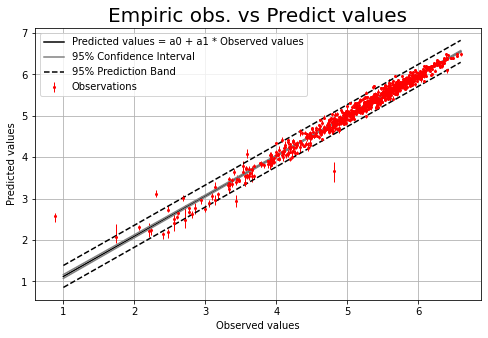

In [20]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y['LN_GS_cub_m']['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [21]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [22]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.347, median - 0.347, CI - [0.338-0.357]

SHAP-values for: DBH_cm: mean - 0.034, median - 0.03, CI - [0.024-0.042]

SHAP-values for: H_m: mean - 0.35, median - 0.351, CI - [0.33-0.367]

SHAP-values for: Origin_ID: mean - 0.009, median - 0.009, CI - [0.007-0.011]

SHAP-values for: Species_ID: mean - 0.019, median - 0.019, CI - [0.017-0.022]



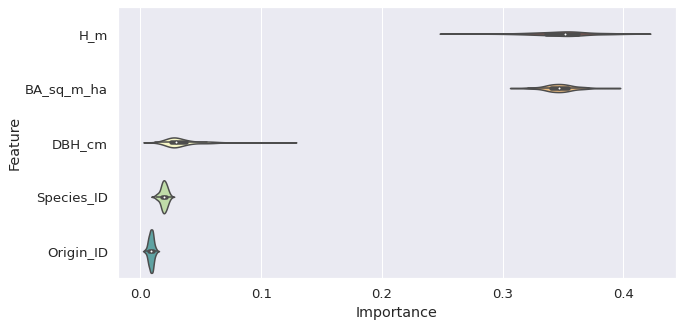

In [58]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['H_m', 'BA_sq_m_ha', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [24]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 111.75, median: 107.0,
 pred. interval (P(0.025)-P(0.975)): 46.975-177.0, 
 conf. interval (p-value=0.95): 70.264-155.67 
***
Aggregate bias statistic: 
 mean: -0.001, median: -0.002,
 pred. interval (P(0.025)-P(0.975)): -0.021-0.02, 
 conf. interval (p-value=0.95): -0.011-0.01 
***
Aggregate RMSE statistic: 
 mean: 0.135, median: 0.124, pred. interval (P(0.025)-P(0.975)): 0.1-0.188, 
 conf. interval (p-value=0.95): 0.11-0.168 
***
Aggregate MSE statistic: 
 mean: 0.019, median: 0.015, pred. interval (P(0.025)-P(0.975)): 0.01-0.035, 
 conf. interval (p-value=0.95): 0.012-0.028 
***
Aggregate R^2 statistic: 
 mean: 0.973, median: 0.977, pred. interval (P(0.025)-P(0.975)): 0.952-0.985, 
 conf. interval (p-value=0.95): 0.962-0.982 
***
Aggregate bias(%) statistic: 
 mean: -0.013, median: -0.034, pred. interval (P(0.025)-P(0.975)): -0.404-0.391, 
 conf. interval (p-value=0.95): -0.202-0

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

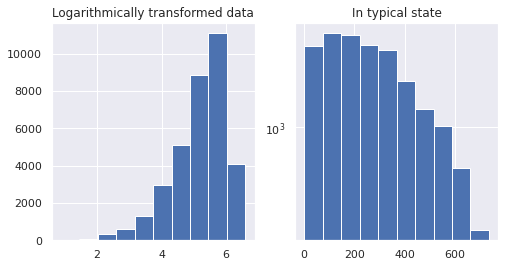

In [27]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y['LN_GS_cub_m'])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y['LN_GS_cub_m'] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y['LN_GS_cub_m'] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y['LN_GS_cub_m'])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [32]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y['LN_GS_cub_m'], [2, 4, 5, 6, 7])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 150, 300, 450, 600, 750])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

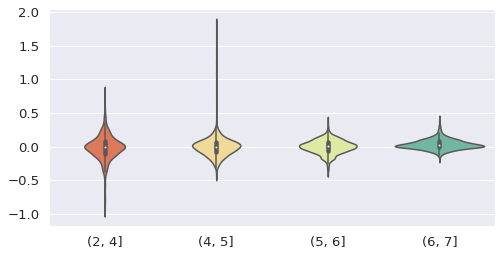

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

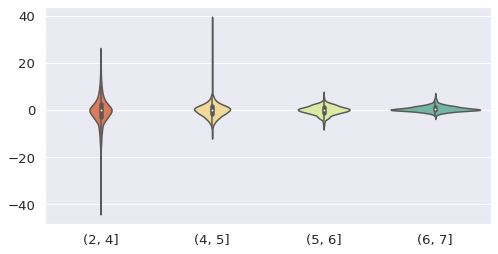

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

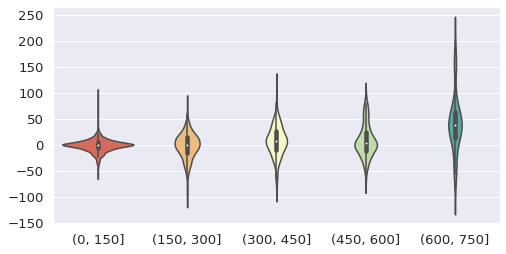

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

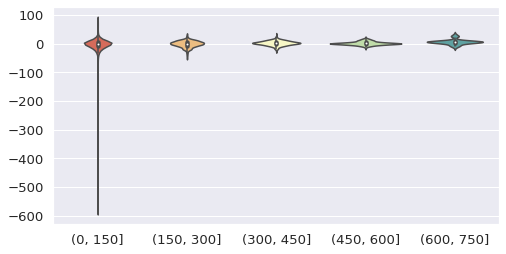

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [38]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [39]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.17393
[1]	validation_0-rmse:3.67691
[2]	validation_0-rmse:3.23614
[3]	validation_0-rmse:2.85061
[4]	validation_0-rmse:2.51049
[5]	validation_0-rmse:2.21099
[6]	validation_0-rmse:1.95006
[7]	validation_0-rmse:1.72010
[8]	validation_0-rmse:1.51612


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.33900
[10]	validation_0-rmse:1.18151
[11]	validation_0-rmse:1.04287
[12]	validation_0-rmse:0.92149
[13]	validation_0-rmse:0.81433
[14]	validation_0-rmse:0.72112
[15]	validation_0-rmse:0.63856
[16]	validation_0-rmse:0.56581
[17]	validation_0-rmse:0.50315
[18]	validation_0-rmse:0.44747
[19]	validation_0-rmse:0.39785
[20]	validation_0-rmse:0.35576
[21]	validation_0-rmse:0.31870
[22]	validation_0-rmse:0.28684
[23]	validation_0-rmse:0.25930
[24]	validation_0-rmse:0.23492
[25]	validation_0-rmse:0.21412
[26]	validation_0-rmse:0.19633
[27]	validation_0-rmse:0.18053
[28]	validation_0-rmse:0.16721
[29]	validation_0-rmse:0.15633
[30]	validation_0-rmse:0.14713
[31]	validation_0-rmse:0.14000
[32]	validation_0-rmse:0.13305
[33]	validation_0-rmse:0.12768
[34]	validation_0-rmse:0.12280
[35]	validation_0-rmse:0.11894
[36]	validation_0-rmse:0.11599
[37]	validation_0-rmse:0.11309
[38]	validation_0-rmse:0.11062
[39]	validation_0-rmse:0.10862
[40]	validation_0-rmse:0.10731
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [40]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 177


In [41]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

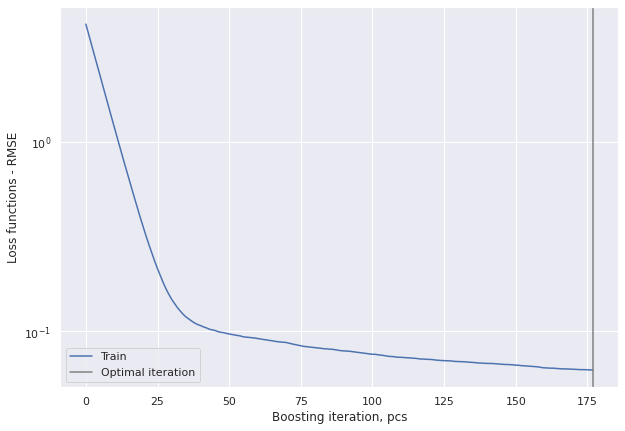

In [42]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [43]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.01
RMSE: 0.1
Relative RMSE(%):  1.210
MSE: 0.0
R square: 99.4%


In [44]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.994
Uncertainty
a0: 0.037+/-0.013
a1: 0.9929+/-0.0025


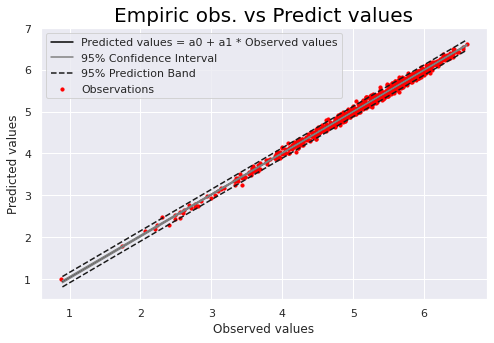

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

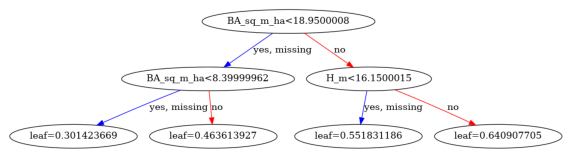

In [48]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

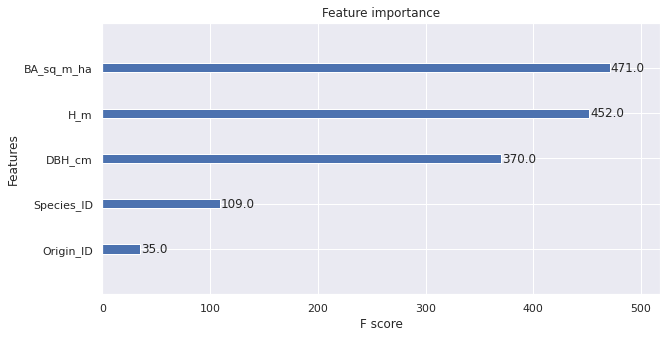

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

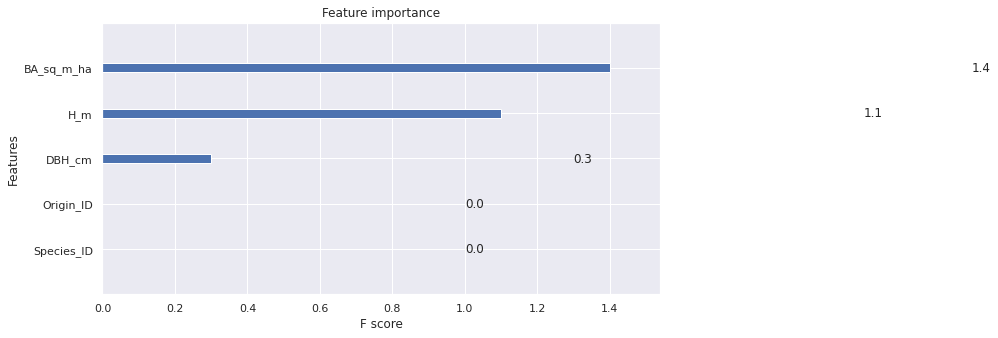

In [51]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

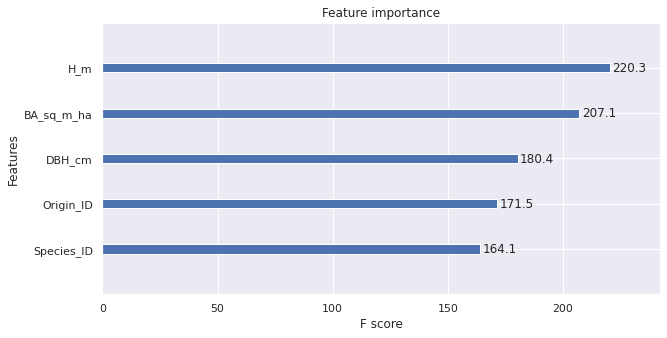

In [52]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [53]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


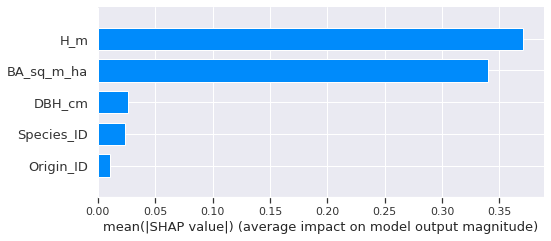

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

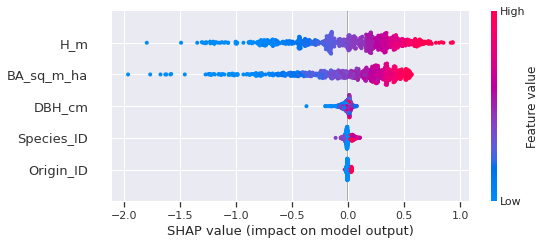

In [55]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

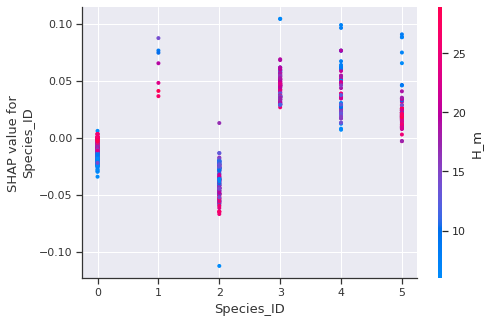

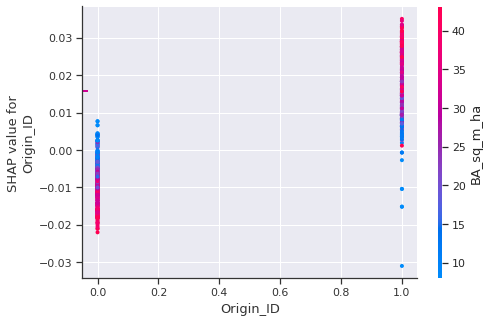

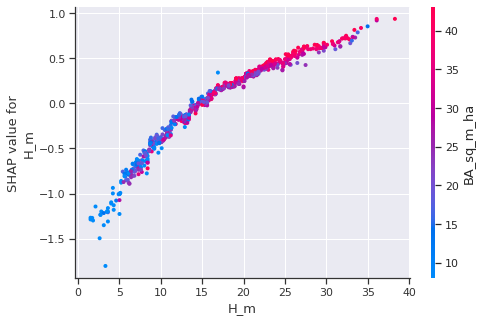

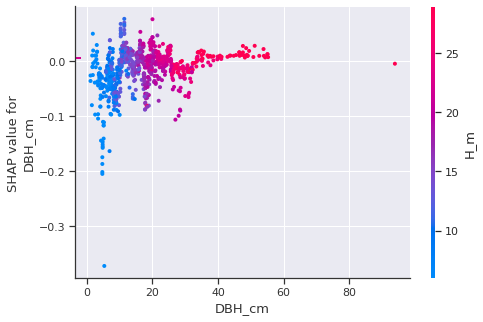

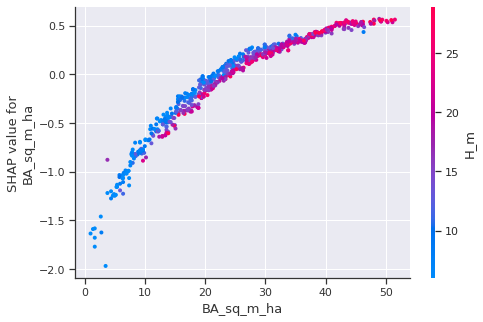

In [56]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_LN_CS_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_LN_CS_other_authors_XGB_model.txt")